# Лабораторная работа №1 "Проведение исследований с алгоритмом KNN"

Загружаем необходимые для лабораторной работы библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from scipy import stats
from collections import Counter

В качестве набора данных был выбран датасет "Smart Watch prices", содержащий информацию о функциях и ценах популярных моделей смарт-часов разных брендов. Каждый объект в датасете описывается по следующим признакам:
1. Brand - производитель смарт-часов;
2. Model - наименование конкретной модели смарт-часов;
3. Operating System - операционная система, используемая смарт-часами;
4. Connectivity - типы связи, поддерживаемые смарт-часами (например, Bluetooth, Wi-Fi, сотовая связь);
5. Display Type - тип технологии отображения, используемой в смарт-часах (например, AMOLED, Retina, E-Ink, LCD);
6. Display Size (inches) - размер дисплея смарт-часов в дюймах;
7. Resolution - разрешение дисплея смарт-часов в пикселях;
8. Water Resistance (meters) - глубина, на которую смарт-часы могут быть погружены в воду без повреждений;
9. Battery Life (days) - предполагаемый срок службы батареи смарт-часов в днях;
10. Heart Rate Monitor - наличие или отсутствие в смарт-часах встроенного монитора сердечного ритма;
11. GPS - наличие или отсутствие в смарт-часах встроенного GPS для отслеживания местоположения;
12. NFC - наличие или отсутствие в смарт-часах функции NFC (Near Field Communication) для бесконтактных платежей или другой беспроводной передачи данных;
13. Price (USD) - цена смарт-часов в долларах США.

С ростом популярности умных часов и их интеграции в повседневную жизнь, потребители сталкиваются с широким выбором моделей, характеристик и ценовых категорий. Смарт-часы становятся не только инструментом для фитнеса и мониторинга здоровья, но и элементом моды и статуса. В таких условиях **разработка модели для предсказания цены умных часов становится актульной по нескольким причинам**:
*   Информированность потребителей: понимание рыночной стоимости смарт-часов помогает потребителям принимать более обоснованные решения при покупке, избегая переплаты за ненужные функции или бренд.
*   Оптимизация бизнеса: производители и ритейлеры могут использовать такие модели для определения конкурентноспособной ценовой стратегии, а также для прогнозирования спроса на различные модели в зависимости от их характерситик и рыночной ситуации.
*   Анализ тенденций: модель может помочь в выявлении тенденций на рынке смарт-часов, таких как влияние новых технологий, функций и дизайна на ценовые категории.
*   Экономическая эффективность: прогнозирование цен может значительно снизить риски для инвесторов и помочь в принятии решений о вложениях в новые продукты и технологии.

Датасет хранится на Google Диске, поэтому подключаем его и загружаем датасет и проверяем загруженные данные, выводя на экран первые строки датасета.

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/smartwatch.csv')
df.head()

Mounted at /content/drive


Brand           Model Operating System                Connectivity  \
0    Apple  Watch Series 7          watchOS  Bluetooth, Wi-Fi, Cellular   
1  Samsung  Galaxy Watch 4          Wear OS  Bluetooth, Wi-Fi, Cellular   
2   Garmin          Venu 2        Garmin OS            Bluetooth, Wi-Fi   
3   Fitbit         Versa 3        Fitbit OS            Bluetooth, Wi-Fi   
4   Fossil           Gen 6          Wear OS            Bluetooth, Wi-Fi   

  Display Type  Display Size (inches) Resolution Water Resistance (meters)  \
0       Retina                   1.90  396 x 484                        50   
1       AMOLED                   1.40  450 x 450                        50   
2       AMOLED                   1.30  416 x 416                        50   
3       AMOLED                   1.58  336 x 336                        50   
4       AMOLED                   1.28  416 x 416                        30   

  Battery Life (days) Heart Rate Monitor  GPS  NFC Price (USD)  
0                  18                Yes  Yes  Yes       $399   
1                  40                Yes  Yes  Yes       $249   
2                  11                Yes  Yes   No       $399   
3                   6                Yes  Yes  Yes       $229   
4                  24                Yes  Yes  Yes       $299

Посмотрим на размер датасета.

In [ ]:
print(len(df))

379


Проверим датасет на отсутствие информации - выведем все строки, в которых есть значение NaN.

In [ ]:
nan_rows = df[df.isnull().any(axis=1)]
nan_rows.head()

Brand           Model Operating System      Connectivity Display Type  \
9    Skagen  Jorn Hybrid HR              NaN         Bluetooth          NaN   
11    Timex  Metropolitan R              NaN         Bluetooth       AMOLED   
21   Fossil        Collider        Hybrid OS  Bluetooth, Wi-Fi       Analog   
122     NaN             NaN              NaN               NaN          NaN   
285   Timex   Metropolitan+         Timex OS         Bluetooth        E-Ink   

     Display Size (inches) Resolution Water Resistance (meters)  \
9                      NaN        NaN                        30   
11                     1.2  390 x 390                        30   
21                     NaN        NaN                        30   
122                    NaN        NaN                       NaN   
285                    1.5        NaN                        50   

    Battery Life (days) Heart Rate Monitor  GPS  NFC Price (USD)  
9                    14                Yes   No   No       $195   
11                    3                Yes   No   No       $179   
21                   14                Yes   No  Yes       $195   
122                 NaN                NaN  NaN  NaN         NaN  
285                   1                Yes   No   No        $79

В пяти строках присутсвуют объекты NaN. Из них: одна строка полностью пустая, можно удалять её не задумываясь; одна строка имеет целых четыре значения NaN; еще одна строка с двумя значениями NaN; две строки с одним значением NaN. Четыре строки - малая величина, поэтому решено удалить эти строки.

In [ ]:
df = df.dropna()

Посмотрим на величину датасета после удаления строк со значениями NaN. Размер изменился незначительно.

In [ ]:
print(len(df))

374


Посмотрим какие типы данных хранятся в каждом из столбцов, чтобы понимать разделение на категориальные и количественные данные.

In [ ]:
print(df.dtypes)

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object


Логично, что цена часов должна быть количественной переменной, но сейчас это не так. Посмотрев на данный столбец в датасете, видим, что в датасете к цене приписывается знак валюты, а также тысячи разделяются знаком запятой. Удалим лишние знаки в значениях для столбца цены и приведем полученные значения к числовому типу.

In [ ]:
df['Price (USD)'] = df['Price (USD)'].str.replace(',', '').str.replace('$', '')
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'])
df.head()

Brand           Model Operating System                Connectivity  \
0    Apple  Watch Series 7          watchOS  Bluetooth, Wi-Fi, Cellular   
1  Samsung  Galaxy Watch 4          Wear OS  Bluetooth, Wi-Fi, Cellular   
2   Garmin          Venu 2        Garmin OS            Bluetooth, Wi-Fi   
3   Fitbit         Versa 3        Fitbit OS            Bluetooth, Wi-Fi   
4   Fossil           Gen 6          Wear OS            Bluetooth, Wi-Fi   

  Display Type  Display Size (inches) Resolution Water Resistance (meters)  \
0       Retina                   1.90  396 x 484                        50   
1       AMOLED                   1.40  450 x 450                        50   
2       AMOLED                   1.30  416 x 416                        50   
3       AMOLED                   1.58  336 x 336                        50   
4       AMOLED                   1.28  416 x 416                        30   

  Battery Life (days) Heart Rate Monitor  GPS  NFC  Price (USD)  
0                  18                Yes  Yes  Yes          399  
1                  40                Yes  Yes  Yes          249  
2                  11                Yes  Yes   No          399  
3                   6                Yes  Yes  Yes          229  
4                  24                Yes  Yes  Yes          299

Для реализации задачи классификации разделим цены часов на три класса: низкая, средняя и высокая цена. Для деления на три категории используем первый и третий квантили.

In [ ]:
q1 = df['Price (USD)'].quantile(0.33)
q3 = df['Price (USD)'].quantile(0.67)

def categorize_price(price):
    if price < q1:
        return 'низкая цена'
    elif price < q3:
        return 'средняя цена'
    else:
        return 'высокая цена'

df['Price Category'] = df['Price (USD)'].apply(categorize_price)
df.head()

Brand           Model Operating System                Connectivity  \
0    Apple  Watch Series 7          watchOS  Bluetooth, Wi-Fi, Cellular   
1  Samsung  Galaxy Watch 4          Wear OS  Bluetooth, Wi-Fi, Cellular   
2   Garmin          Venu 2        Garmin OS            Bluetooth, Wi-Fi   
3   Fitbit         Versa 3        Fitbit OS            Bluetooth, Wi-Fi   
4   Fossil           Gen 6          Wear OS            Bluetooth, Wi-Fi   

  Display Type  Display Size (inches) Resolution Water Resistance (meters)  \
0       Retina                   1.90  396 x 484                        50   
1       AMOLED                   1.40  450 x 450                        50   
2       AMOLED                   1.30  416 x 416                        50   
3       AMOLED                   1.58  336 x 336                        50   
4       AMOLED                   1.28  416 x 416                        30   

  Battery Life (days) Heart Rate Monitor  GPS  NFC  Price (USD) Price Category  
0                  18                Yes  Yes  Yes          399   высокая цена  
1                  40                Yes  Yes  Yes          249   средняя цена  
2                  11                Yes  Yes   No          399   высокая цена  
3                   6                Yes  Yes  Yes          229   средняя цена  
4                  24                Yes  Yes  Yes          299   высокая цена

Для применения алгоритмов машинного обучения необходима кодировка категориальных переменных в числовой формат. Используем LabelEncoder — один из способов преобразования категориальных данных в числовые метки, что облегчает работу с такими данными.

In [ ]:
label_encoders = {}

categorical_columns = ['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type', 'Resolution', 'Water Resistance (meters)', 'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC', 'Price Category']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

Brand  Model  Operating System  Connectivity  Display Type  \
0      1    125                33             2            16   
1     30     35                30             2             0   
2      8    103                 9             1             0   
3      6    107                 7             1             0   
4      7     42                30             1             0   

   Display Size (inches)  Resolution  Water Resistance (meters)  \
0                   1.90          27                          5   
1                   1.40          31                          5   
2                   1.30          30                          5   
3                   1.58          19                          5   
4                   1.28          30                          4   

   Battery Life (days)  Heart Rate Monitor  GPS  NFC  Price (USD)  \
0                    8                   0    1    1          399   
1                   16                   0    1    1          249   
2                    3                   0    1    0          399   
3                   22                   0    1    1          229   
4                   11                   0    1    1          299   

   Price Category  
0               0  
1               2  
2               0  
3               2  
4               0

Проверим, что теперь во всех столбцах хранятся числовые значения.

In [ ]:
print(df.dtypes)

Brand                          int64
Model                          int64
Operating System               int64
Connectivity                   int64
Display Type                   int64
Display Size (inches)        float64
Resolution                     int64
Water Resistance (meters)      int64
Battery Life (days)            int64
Heart Rate Monitor             int64
GPS                            int64
NFC                            int64
Price (USD)                    int64
Price Category                 int64
dtype: object


Создадим два набора обучающий и тестовых выборок для каждой из задач (регрессии и классификации). Целевой переменной для задачи регрессии будет цена часов, а для задачи классификации - категория цены часов. Для тестовой выборки будет отведено 20% данных, для обучающей выборки - 80%.

In [ ]:
X_r = df.drop(['Price (USD)', 'Price Category'], axis=1)
y_r = df['Price (USD)']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=13)

X_c = df.drop(['Price (USD)', 'Price Category'], axis=1)
y_c = df['Price Category']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=13)

Создаем два объекта из библиотеки scikit-learn - объект классификатора на основе алгоритма k-ближайших соседей и объект регрессора на основе того же алгоритма. Параметр n_neighbors, который определяет количество соседей, учитываемых при принятии решения, выставлен в величину 3, поскольку оно часто используется на практике и может давать хорошие результаты в большинстве задач.

In [ ]:
model_c = KNeighborsClassifier(n_neighbors=3)
model_r = KNeighborsRegressor(n_neighbors=3)

Запускаем обучение модели для задачи классификации.

In [ ]:
model_c.fit(X_train_c, y_train_c)

KNeighborsClassifier(n_neighbors=3)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
def print_c(ac_1, ac_2, f1_1, f1_2):
  print(f'Accuracy for test data: {ac_1:.5f}')
  print(f'F1 for test data: {f1_1:.5f}\n')

  print(f'Accuracy for train data: {ac_2:.5f}')
  print(f'F1 for train data: {f1_2:.5f}')

y_test_pred_c = model_c.predict(X_test_c)
y_train_pred_c = model_c.predict(X_train_c)

accuracy_test = accuracy_score(y_test_c, y_test_pred_c)
accuracy_train = accuracy_score(y_train_c, y_train_pred_c)

f1_test = f1_score(y_test_c, y_test_pred_c, average="weighted")
f1_train = f1_score(y_train_c, y_train_pred_c, average="weighted")

print_c(accuracy_test, accuracy_train, f1_test, f1_train)

Accuracy for test data: 0.77333
F1 for test data: 0.76577

Accuracy for train data: 0.86622
F1 for train data: 0.86603


Запускаем обучение модели для задачи регрессии.

In [ ]:
model_r.fit(X_train_r, y_train_r)

KNeighborsRegressor(n_neighbors=3)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
def print_r(mse_1, mse_2, mae_1, mae_2):
  print(f'Mean Squared Error for test data: {mse_1:.5f}')
  print(f'Mean Absolute Error for test data: {mae_1:.5f}\n')

  print(f'Mean Squared Error for train data: {mse_2:.5f}')
  print(f'Mean Absolute Error for train data: {mae_2:.5f}')

y_pred_test_r = model_r.predict(X_test_r)
y_pred_train_r = model_r.predict(X_train_r)

mse_test = mean_squared_error(y_test_r, y_pred_test_r)
mae_test = mean_absolute_error(y_test_r, y_pred_test_r)

mse_train = mean_squared_error(y_train_r, y_pred_train_r)
mae_train = mean_absolute_error(y_train_r, y_pred_train_r)

print_r(mse_test, mse_train, mae_test, mae_train)

Mean Squared Error for test data: 10865.11259
Mean Absolute Error for test data: 52.93778

Mean Squared Error for train data: 13036.23003
Mean Absolute Error for train data: 45.01784


Попробуем **улучшить бейзлайн**. Сначала повторим изначальные действия: загрузка датасета, удаление строк с объектами NaN и конвертация цены в числовое значение.

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/smartwatch.csv')
df_2 = df_2.dropna()

df_2['Price (USD)'] = df_2['Price (USD)'].str.replace(',', '').str.replace('$', '')
df_2['Price (USD)'] = pd.to_numeric(df_2['Price (USD)'])

Рассмотрим подробнее значения, представленные в таблице. Начнем с анализа столбца операционных систем, выведем все его уникальные значения.

In [ ]:
df_2['Operating System'].unique()

array(['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'HarmonyOS',
       'ColorOS', 'Amazfit OS', 'Withings OS', 'Polar OS', 'Tizen OS',
       'Lite OS', 'Tizen', 'Suunto OS', 'Proprietary OS', 'Proprietary',
       'LiteOS', 'Android Wear', 'MIUI for Watch', 'Custom OS',
       'Fossil OS', 'MIUI', 'RTOS', 'MyKronoz OS', 'Nubia OS',
       'Mi Wear OS', 'Zepp OS', 'Realme OS', 'Matrix OS', 'Android OS',
       'Casio OS', 'Skagen OS', 'Timex OS', 'MIUI For Watch', 'Android'],
      dtype=object)

Можно заметить, что логически Wear OS и Android Wear обозначают одно и тоже, значит требуется объединить их одним именем.

In [ ]:
def segment_os(os):
    if 'Wear OS' in os or 'Android Wear' in os:
        return 'Wear OS'
    else:
      return os

df_2['Operating System'] = df_2['Operating System'].apply(segment_os)

Выведем график, отражающий сколько для каждого вида операционных систем существует объектов в датасете.

<Axes: xlabel='Operating System'>

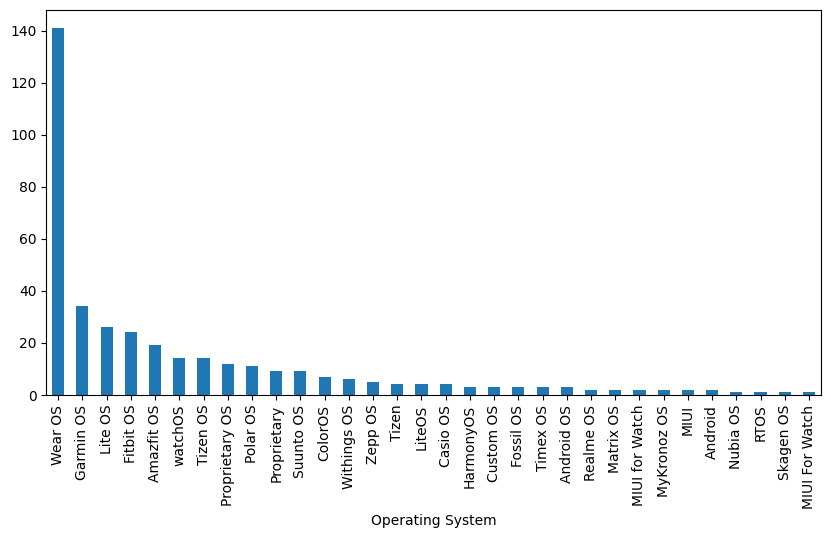

In [ ]:
plt.figure(figsize=(10,5))
df_2['Operating System'].value_counts().plot(kind='bar')

Посмотрим какие значения принимают объекты по типу дисплея.

In [ ]:
df_2['Display Type'].unique()

array(['Retina', 'AMOLED', 'IPS LCD', 'TFT LCD', 'Memory-in-pixel (MIP)',
       'Super AMOLED', 'LCD', 'Transflective', 'OLED', 'Gorilla Glass',
       'MIP', 'P-OLED', 'transflective', 'PMOLED', 'TFT',
       'Sunlight-visible, transflective memory-in-pixel (MIP)', 'E-Ink',
       'E-ink', 'Sunlight-visible', 'Color Touch', 'IPS', 'Dual Layer',
       'TFT-LCD', 'STN LCD', 'Monochrome', 'Memory LCD'], dtype=object)

Можно отметить, что IPS LCD и IPS обозначают одно и тоже, как и E-Ink и E-ink, значит необходимо дать каждой паре единое имя.

In [ ]:
def segment_display_type(display_type):
    if 'IPS LCD' in display_type or 'IPS' in display_type:
        return 'IPS LCD'
    elif 'E-Ink' in display_type or 'E-ink' in display_type:
        return 'E-Ink'
    else:
        return display_type

df_2['Display Type'] = df_2['Display Type'].apply(segment_display_type)

Выведем график, отражающий сколько для каждого типа дисплея существует объектов в датасете.

<Axes: xlabel='Display Type'>

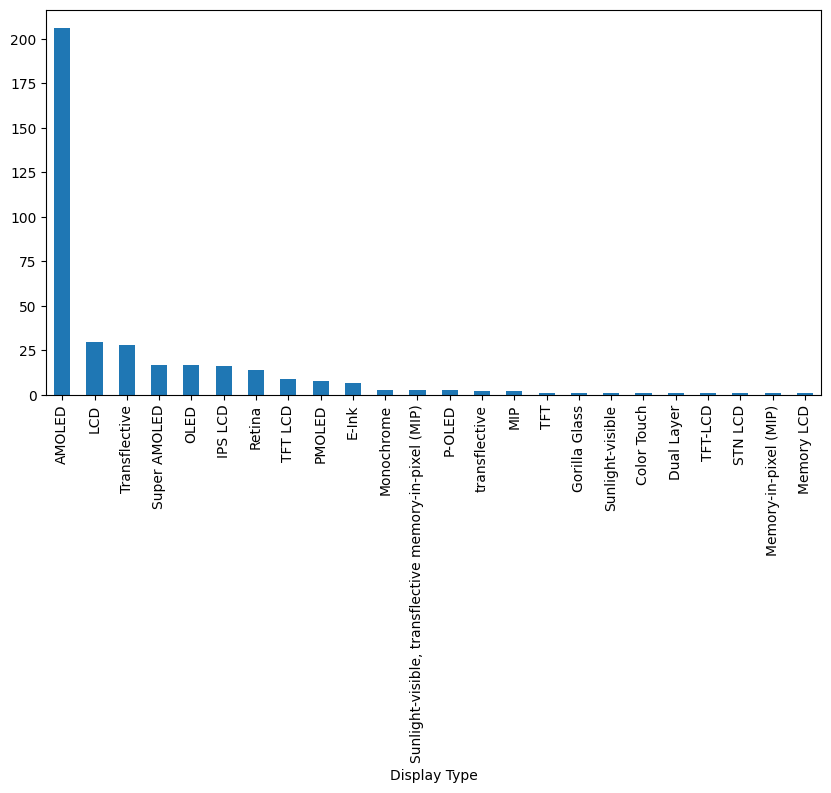

In [ ]:
plt.figure(figsize=(10,5))
df_2['Display Type'].value_counts().plot(kind='bar')

Посмотрим какие бренды умных часов представлены в датасете.

In [ ]:
df_2['Brand'].unique()

array(['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei',
       'TicWatch', 'Oppo', 'Amazfit', 'Withings', 'Suunto', 'Mobvoi',
       'Polar', 'Skagen', 'Ticwatch', 'Xiaomi', 'Honor', 'LG', 'Casio',
       'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia', 'Sony', 'Zepp',
       'Realme', 'Timex', 'Matrix', 'Kate Spade', 'Diesel',
       'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer',
       'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola',
       'Nokia'], dtype=object)

Moto и Motorola обозначают одно и тоже, объединяем и назначаем одно имя.

In [ ]:
def segment_brand(brand):
    if 'Moto' in brand or 'Motorola' in brand:
        return 'Motorola'
    else:
        return brand

df_2['Brand'] = df_2['Brand'].apply(segment_brand)

Выведем график, отражающий сколько для каждого бренда существует объектов в датасете.

<Axes: xlabel='Brand'>

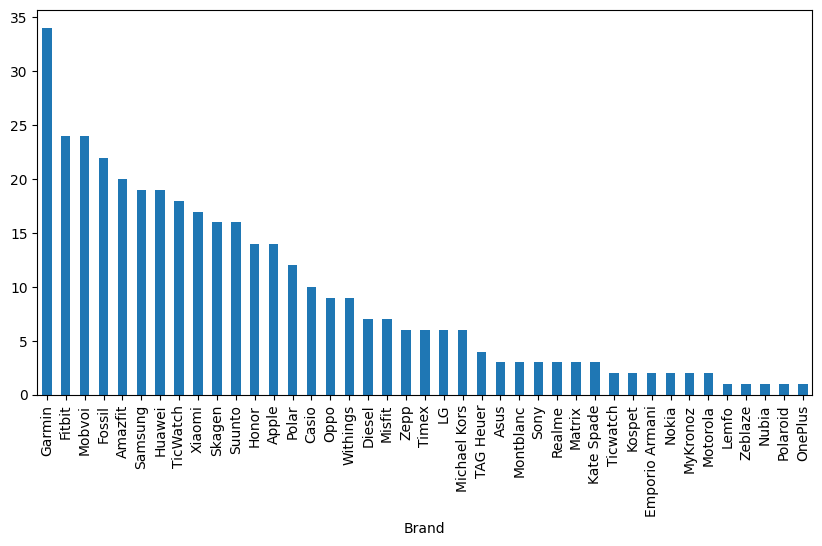

In [ ]:
plt.figure(figsize=(10,5))
df_2['Brand'].value_counts().plot(kind='bar')

Посмотрим на разрешения дисплеев, представленных в датасете.

In [ ]:
df_2.Resolution.unique()

array(['396 x 484', '450 x 450', '416 x 416', '336 x 336', '466 x 466',
       '360 x 360', '372 x 430', '454 x 454', '240 x 240', '394 x 324',
       '240 x 201', '368 x 448', '390 x 390', '400 x 400', '324 x 394',
       '320 x 320', '348 x 442', '402 x 476', '480 x 480', '176 x 176',
       '300 x 300', '200 x 200', '280 x 280', '128 x 128', '240 x 198',
       '280 x 456', '328 x 328', '960 x 192', '348 x 250', '320 x 300',
       '320 x 302', '228 x 172', '160 x 160', '260 x 260', '126 x 36',
       '326 x 326'], dtype=object)

Разобьем разрешения дисплеев на категории в зависимости от их величины. Это поможет снизить сложность данных, сделать модель более устойчивой к шуму, снизить влияние выбросов.

In [ ]:
def segment_resolution(resolution):
    res = resolution.split(' x ')
    width = int(res[0])
    height = int(res[1])
    if width < 200 or height < 200:
        return 'Low'
    elif width < 400 or height < 400:
        return 'Medium'
    elif width < 800 or height < 800:
        return 'High'
    else:
        return 'Very high'

df_2['Resolution'] = df_2['Resolution'].apply(segment_resolution)

Выведем график, отражающий сколько для каждого класса разрешений дисплея существует объектов в датасете.

<Axes: xlabel='Resolution'>

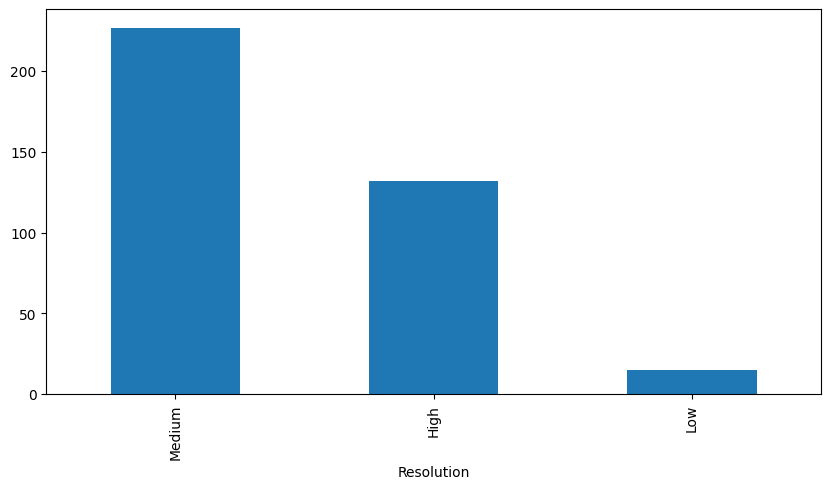

In [ ]:
plt.figure(figsize=(10,5))
df_2['Resolution'].value_counts().plot(kind='bar')

Посмотрим на мощность батареи смарт-часов, представленных в датасете.

In [ ]:
df_2['Battery Life (days)'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '45', '5',
       '10', '3', '48', '7', '16', '9', '25', '72', '60', '56', '70', '1',
       '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

Разобьем значения мощности батареи смарт-часов на категории в зависимости от ее величины.

In [ ]:
def segment_battery_life(battery_life):
    if battery_life == '48 hours':
        return '1-10'
    elif battery_life == '1.5':
        return '1-10'
    elif battery_life == 'Unlimited':
        return '>30'
    else:
        try:
            days = int(battery_life)
            if days >= 1 and days <= 10:
                return '1-10'
            elif days >= 11 and days <= 20:
                return '11-20'
            elif days >= 21 and days <= 30:
                return '21-30'
            else:
                return '>30'
        except ValueError:
            return 'Unknown'

df_2['Battery Life (days)'] = df_2['Battery Life (days)'].apply(segment_battery_life)

Выведем график, отражающий сколько для каждой категории мощности батареи существует объектов в датасете.

<Axes: xlabel='Battery Life (days)'>

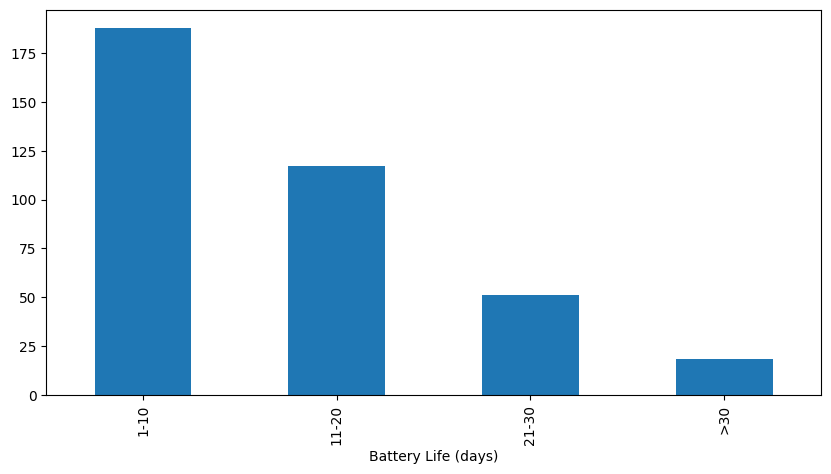

In [ ]:
plt.figure(figsize=(10,5))
df_2['Battery Life (days)'].value_counts().plot(kind='bar')

Посмотрим на допустимую глубину погружения смарт-часов, представленных в датасете.

In [ ]:
df_2['Water Resistance (meters)'].unique()

array(['50', '30', '100', '1.5', 'Not specified', '200', '10'],
      dtype=object)

Разобьем значения допустимой глубины погружения в воду смарт-часов на категории в зависимости от ее величины.

In [ ]:
def segment_water_resistance(water_resistance):
    if pd.isnull(water_resistance) or water_resistance == 'Not specified':
        return 'Unknown'
    elif water_resistance == '1.5':
        return 'Splash resistant'
    else:
        depth = int(water_resistance)
        if depth >= 0 and depth <= 50:
            return '50m or less'
        elif depth > 50 and depth <= 100:
            return '51m - 100m'
        else:
            return 'More than 100m'


df_2['Water Resistance (meters)'] = df_2['Water Resistance (meters)'].apply(segment_water_resistance)

Выведем график, отражающий сколько для каждой категории допустимой глубины погружения существует объектов в датасете.

<Axes: xlabel='Water Resistance (meters)'>

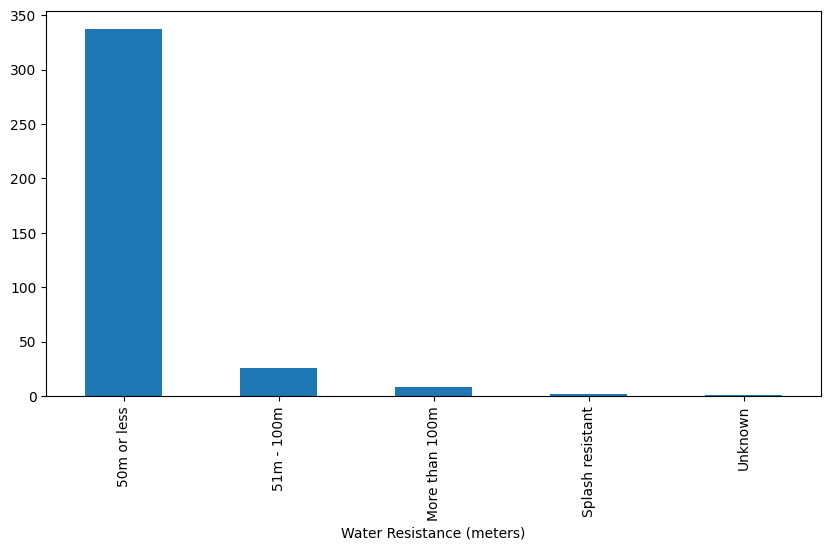

In [ ]:
plt.figure(figsize=(10,5))
df_2['Water Resistance (meters)'].value_counts().plot(kind='bar')

In [ ]:
df_2['Connectivity'].unique()

array(['Bluetooth, Wi-Fi, Cellular', 'Bluetooth, Wi-Fi', 'Bluetooth',
       'Bluetooth, Wi-Fi, GPS', 'Bluetooth, Wi-Fi, NFC'], dtype=object)

In [ ]:
new_columns = df_2['Connectivity'].str.get_dummies(sep=', ')
new_columns.head()

Bluetooth  Cellular  GPS  NFC  Wi-Fi
0          1         1    0    0      1
1          1         1    0    0      1
2          1         0    0    0      1
3          1         0    0    0      1
4          1         0    0    0      1

In [ ]:
new_columns.select_dtypes(include='int64').nunique()

Bluetooth    1
Cellular     2
GPS          2
NFC          2
Wi-Fi        2
dtype: int64

In [ ]:
new_columns = new_columns.drop(['Bluetooth', 'GPS', 'NFC'], axis=1)

In [ ]:
df_2 = df_2.drop('Connectivity', axis=1)
df_2 = pd.concat([df_2, new_columns], axis=1)
df_2.head()

Brand           Model Operating System Display Type  \
0    Apple  Watch Series 7          watchOS       Retina   
1  Samsung  Galaxy Watch 4          Wear OS       AMOLED   
2   Garmin          Venu 2        Garmin OS       AMOLED   
3   Fitbit         Versa 3        Fitbit OS       AMOLED   
4   Fossil           Gen 6          Wear OS       AMOLED   

   Display Size (inches) Resolution Water Resistance (meters)  \
0                   1.90     Medium               50m or less   
1                   1.40       High               50m or less   
2                   1.30       High               50m or less   
3                   1.58     Medium               50m or less   
4                   1.28       High               50m or less   

  Battery Life (days) Heart Rate Monitor  GPS  NFC  Price (USD)  Cellular  \
0               11-20                Yes  Yes  Yes          399         1   
1                 >30                Yes  Yes  Yes          249         1   
2               11-20                Yes  Yes   No          399         0   
3                1-10                Yes  Yes  Yes          229         0   
4               21-30                Yes  Yes  Yes          299         0   

   Wi-Fi  
0      1  
1      1  
2      1  
3      1  
4      1

Посмотрим на размеры дисплеев смарт-часов, представленных в датасете.

In [ ]:
df_2['Display Size (inches)'].unique()

array([1.9 , 1.4 , 1.3 , 1.58, 1.28, 1.43, 1.75, 1.39, 1.65, 1.2 , 1.57,
       1.  , 1.78, 1.91, 1.38, 1.06, 1.35, 1.34, 0.9 , 1.04, 1.64, 1.19,
       4.01, 1.6 , 1.42, 2.1 , 1.23, 1.1 , 1.22, 1.36, 1.32])

Выведем график, отражающий сколько для каждого размера дисплея существует объектов в датасете.

<Axes: xlabel='Display Size (inches)'>

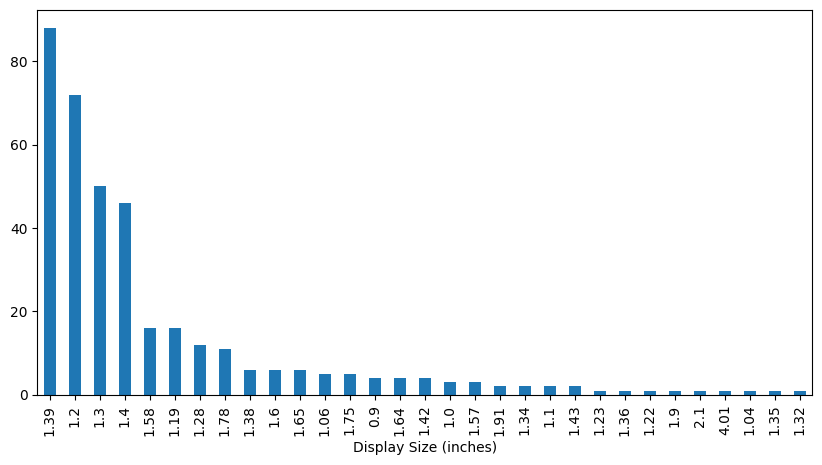

In [ ]:
plt.figure(figsize=(10,5))
df_2['Display Size (inches)'].value_counts().plot(kind='bar')

Посмотрим сколько уникальных значений существует для каждого столбца.

In [ ]:
df_2.select_dtypes(include=['object', 'int64', 'float64']).nunique()

Brand                         41
Model                        135
Operating System              32
Display Type                  24
Display Size (inches)         31
Resolution                     3
Water Resistance (meters)      5
Battery Life (days)            4
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   49
Cellular                       2
Wi-Fi                          2
dtype: int64

Можно заметить, что все объекты по параметру Heart Rate Monitor имеют одно значение, следовательно оно не имеет значения для обучения, поэтому удаляем данный столбец.

In [ ]:
df_2.drop(columns='Heart Rate Monitor', inplace=True)

Для задачи классификации необходимо добавить разбивку смарт-часов на категории в зависимости от их стоимости.

In [ ]:
q1 = df_2['Price (USD)'].quantile(0.33)
q3 = df_2['Price (USD)'].quantile(0.67)

def categorize_price(price):
    if price < q1:
        return 'низкая цена'
    elif price < q3:
        return 'средняя цена'
    else:
        return 'высокая цена'

df_2['Price Category'] = df_2['Price (USD)'].apply(categorize_price)

Для обучения проводим кодировку категориальный признаков в числовой формат данных.

In [ ]:
for col in df_2.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df_2[col].unique())
    df_2[col] = label_encoder.transform(df_2[col])

Построим боксплоты для данных датасета. Боксплот (или ящик с усами) — это графический метод визуализации распределения данных, который часто используется в статистике и машинном обучении. Он позволяет быстро оценить основные характеристики набора данных, такие как центральная тенденция, разброс и наличие выбросов.

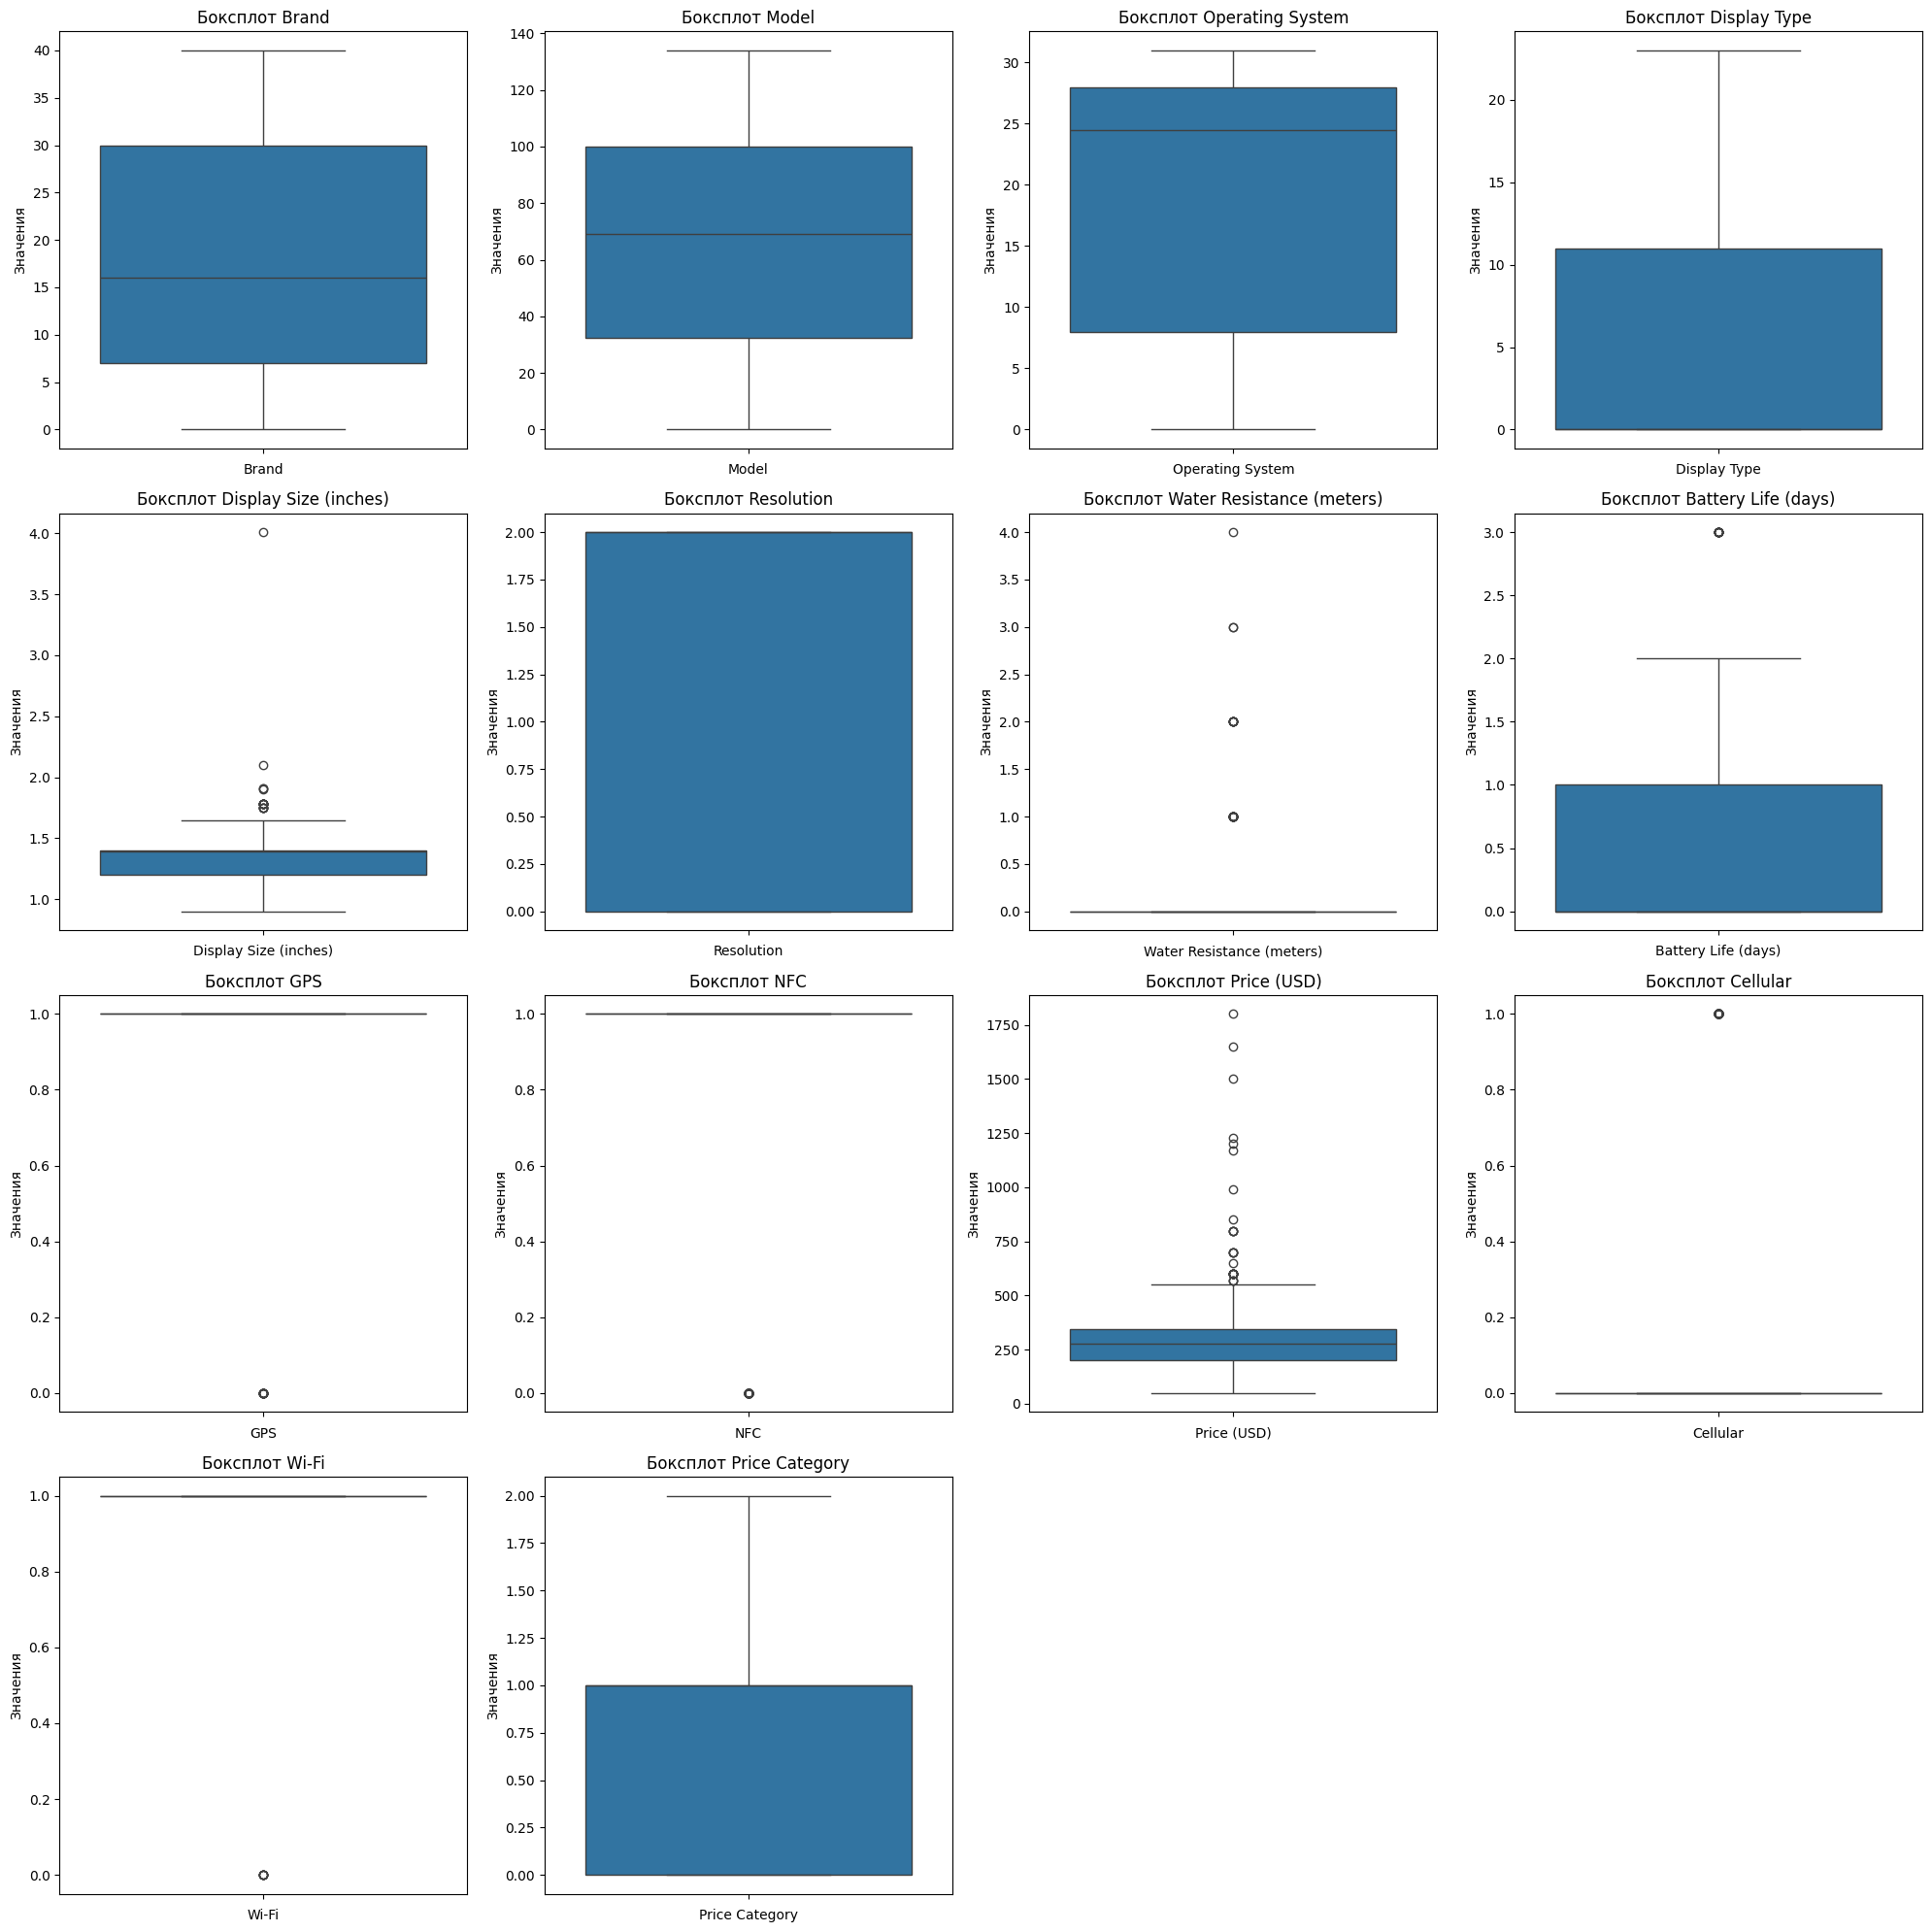

In [ ]:
n_cols = 4
n_rows = (len(df_2.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for idx, col in enumerate(df_2.columns):
    sns.boxplot(y=df_2[col], ax=axes[idx])
    axes[idx].set_title(f'Боксплот {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Значения')

for i in range(len(df_2.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Видны выбросы в Battery Life (days), Display Size (inches) и Price (USD). Water Resistance (meters) - дискретные данные, большая часть которых находится в нуле.Wi-Fi, NFC, Cellular и GPS - бинарные данные с большей частотой в значении, обозначенном линией, и меньшей в значении, обозначенном точкой.

Для дальнейшего анализа данных копируем полученный на данный момент датасет в две переменные (для задач регрессии и классификации) и убираем лишний столбец (Price Category - для задачи регрессии, Price (USD) - для задачи классификации).

In [ ]:
df_clean_r = df_2.copy()
df_clean_r.drop(columns='Price Category', inplace=True)
df_clean_c = df_2.copy()
df_clean_c.drop(columns='Price (USD)', inplace=True)

Проведем анализ взаимосвязей признаков для задачи регрессии, используя визуализацию взаимосвязей pairplot и матрицу корреляции.



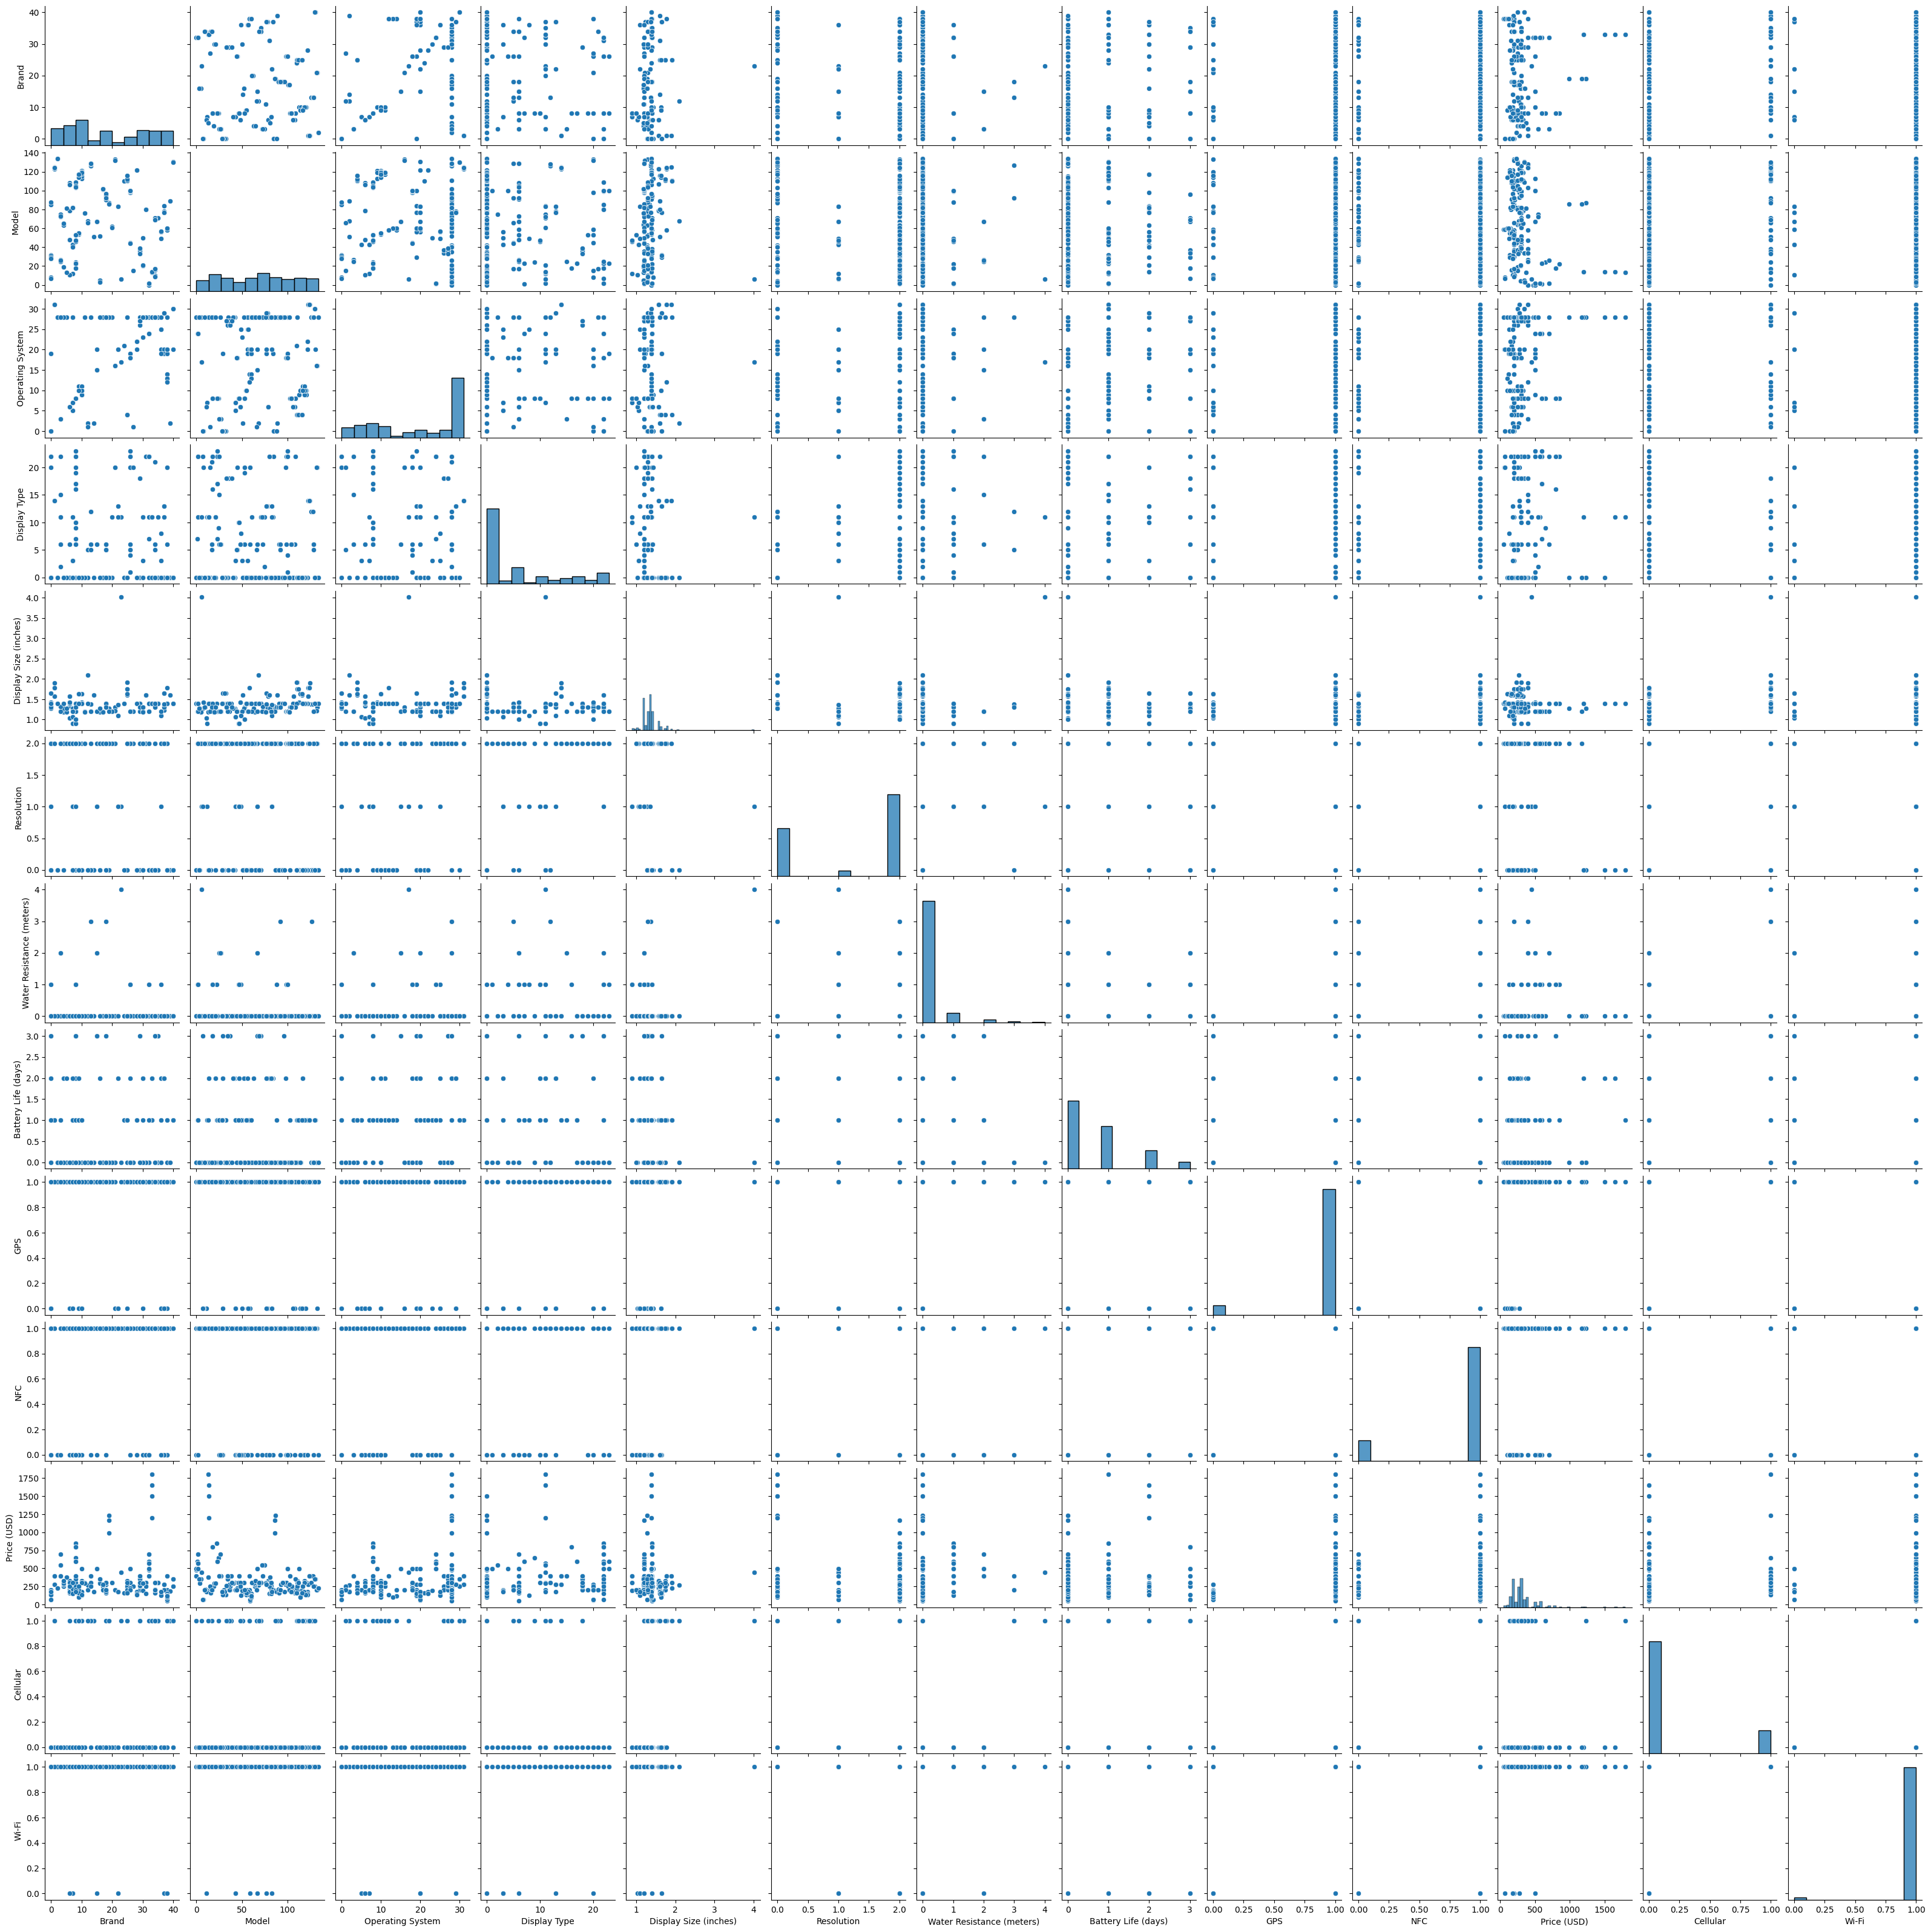

In [ ]:
sns.pairplot(df_clean_r)
plt.show()

<Axes: >

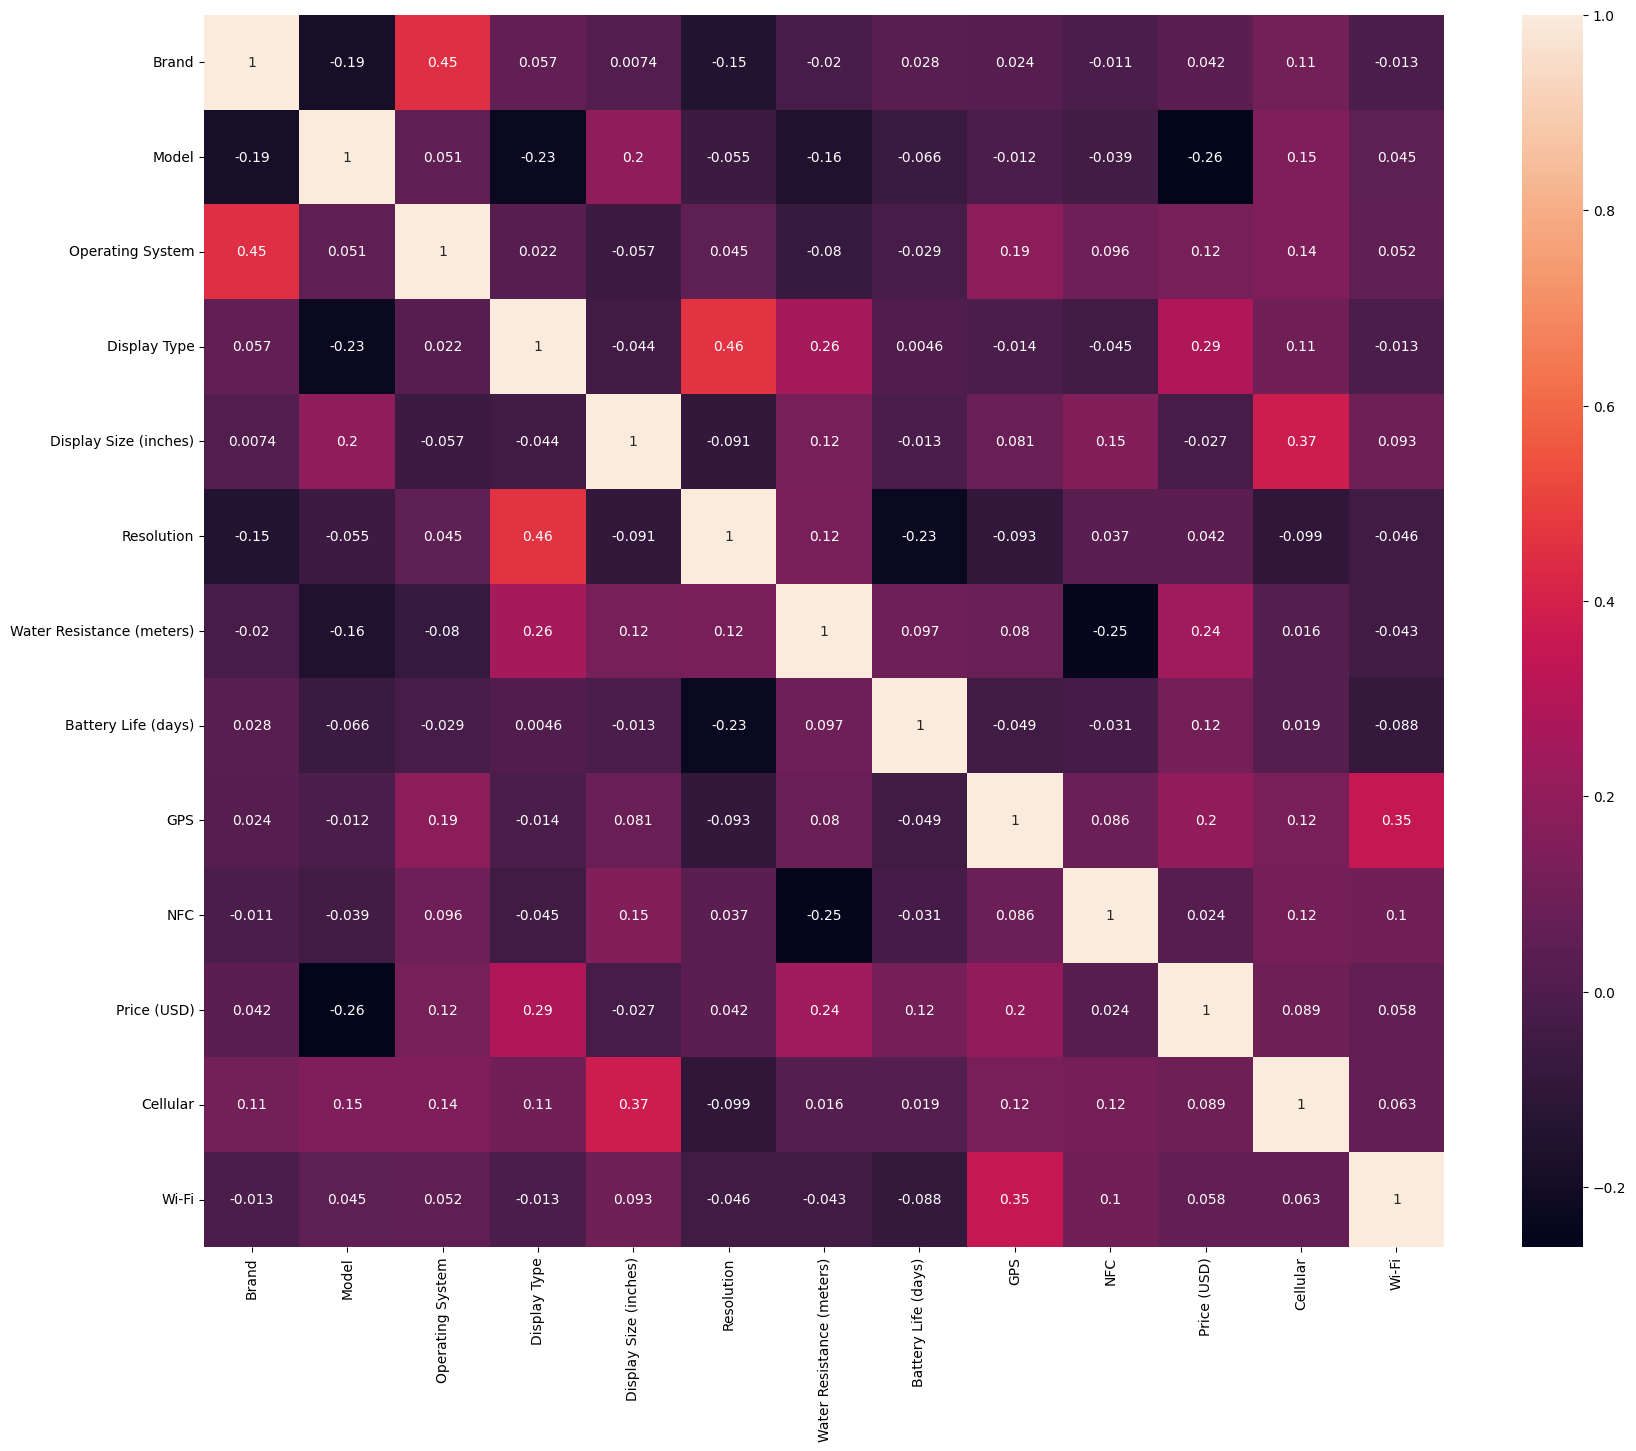

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean_r.corr(), fmt='.2g', annot=True)

Убираем признаки с низкой корреляцией с признаком Price (USD) (у которых значение корреляции меньше 0.1).

In [ ]:
df_clean_r.drop(columns=['Brand',  'Display Size (inches)', 'Resolution', 'NFC', 'Cellular', 'Wi-Fi'], inplace=True)

Проведем анализ взаимосвязей признаков для задачи классификации, используя визуализацию взаимосвязей pairplot и матрицу корреляции.

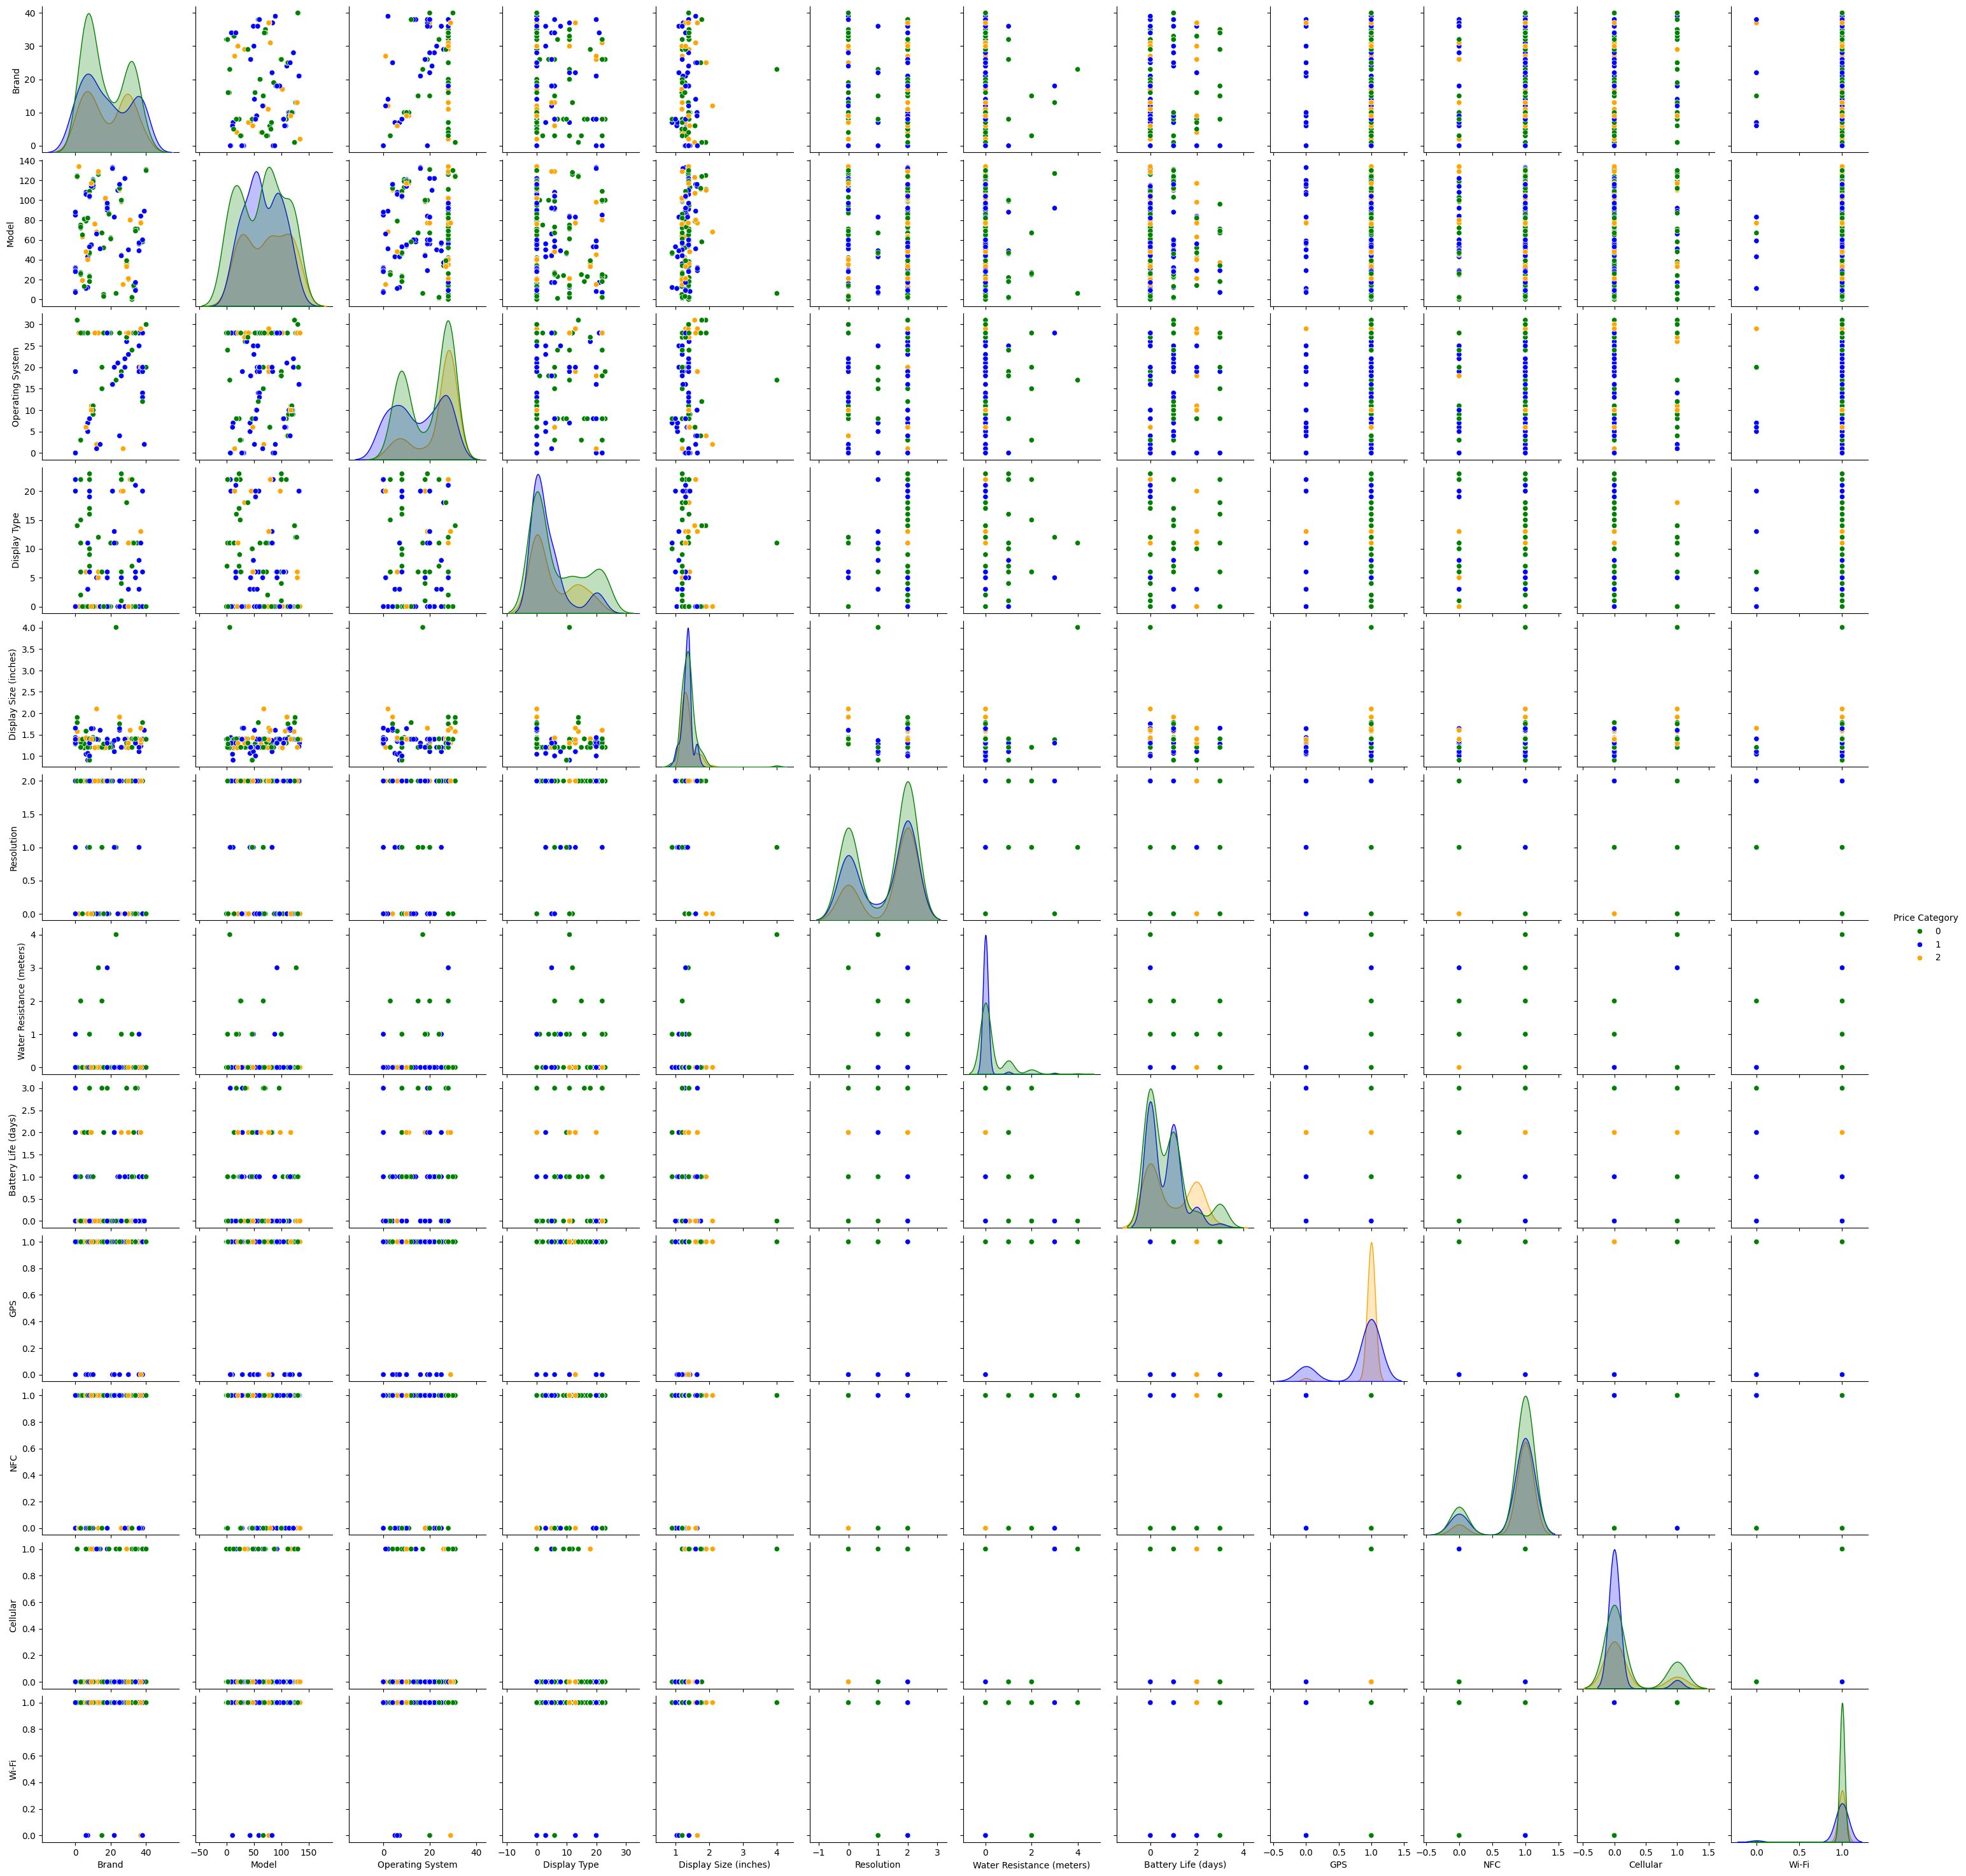

In [ ]:
sns.pairplot(df_clean_c, hue='Price Category', palette=['green', 'blue', 'orange'])
plt.show()

<Axes: >

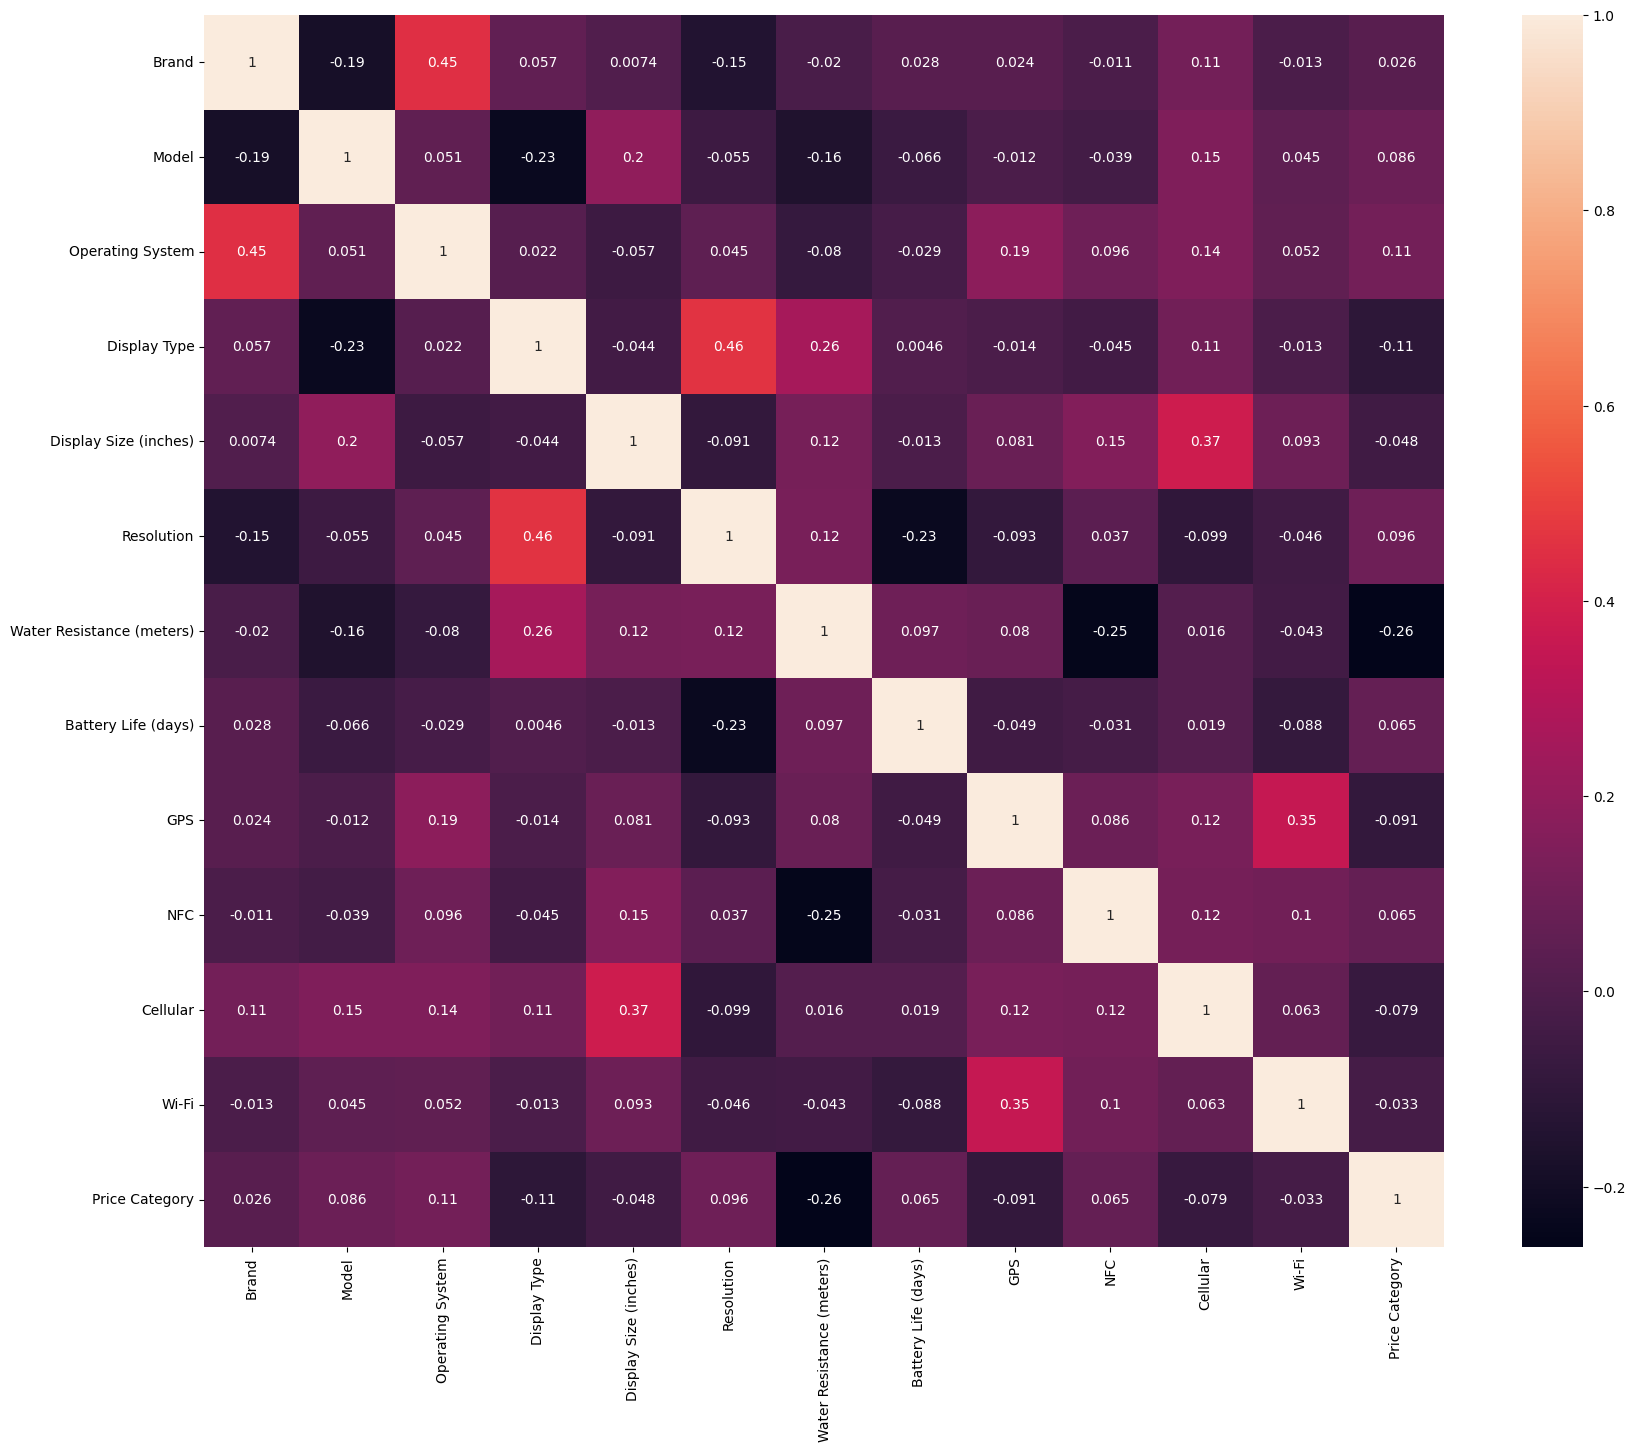

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean_c.corr(), fmt='.2g', annot=True)

Убираем признаки с низкой корреляцией с признаком Price Category (у которых значение корреляции меньше 0.08).

In [ ]:
df_clean_c.drop(columns=['Brand', 'Display Size (inches)', 'Resolution', 'Battery Life (days)', 'NFC', 'Cellular', 'Wi-Fi'], inplace=True)

Создадим два набора обучающий и тестовых выборок для каждой из задач (регрессии и классификации). Целевой переменной для задачи регрессии будет цена часов, а для задачи классификации - категория цены часов. Для тестовой выборки будет отведено 20% данных, для обучающей выборки - 80%.

In [ ]:
X_r_2 = df_clean_r.drop(['Price (USD)'], axis=1)
y_r_2 = df_clean_r['Price (USD)']
X_train_r_2, X_test_r_2, y_train_r_2, y_test_r_2 = train_test_split(X_r_2, y_r_2, test_size=0.2, random_state=13)

X_c_2 = df_clean_c.drop(['Price Category'], axis=1)
y_c_2 = df_clean_c['Price Category']
X_train_c_2, X_test_c_2, y_train_c_2, y_test_c_2 = train_test_split(X_c_2, y_c_2, test_size=0.2, random_state=13)

Выполним стандартизацию (нормализацию) данных, используя класс StandardScaler из библиотеки sklearn.preprocessing. Стандартизация – это процесс, который обеспечивает, чтобы характеристики данных имели нулевое среднее и единичное стандартное отклонение. Это нужно для улучшения производительности алгоритмов машинного обучения, так как многие из них чувствительны к масштабу входных данных.

In [ ]:
scaler = StandardScaler()
X_train_c_2_scaled = scaler.fit_transform(X_train_c_2)
X_test_c_2_scaled = scaler.transform(X_test_c_2)
X_train_r_2_scaled = scaler.fit_transform(X_train_r_2)
X_test_r_2_scaled = scaler.transform(X_test_r_2)

Создаем два объекта из библиотеки scikit-learn - объект классификатора на основе алгоритма k-ближайших соседей и объект регрессора на основе того же алгоритма. Параметр n_neighbors, который определяет количество соседей, учитываемых при принятии решения, выставлен также в величину 3, так как после проведения анализа обучения с изменением данного параметра было замечено ухудшение точности предсказаний обученной модели.

In [ ]:
model_c_2 = KNeighborsClassifier(n_neighbors=3)
model_r_2 = KNeighborsRegressor(n_neighbors=3)

Запускаем обучение модели для задачи классификации.

In [ ]:
model_c_2.fit(X_train_c_2_scaled, y_train_c_2)

KNeighborsClassifier(n_neighbors=3)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_c_2 = model_c_2.predict(X_test_c_2_scaled)
y_train_pred_c_2 = model_c_2.predict(X_train_c_2_scaled)

accuracy_test_2 = accuracy_score(y_test_c_2, y_test_pred_c_2)
accuracy_train_2 = accuracy_score(y_train_c_2, y_train_pred_c_2)

f1_test_2 = f1_score(y_test_c_2, y_test_pred_c_2, average="weighted")
f1_train_2 = f1_score(y_train_c_2, y_train_pred_c_2, average="weighted")

print_c(accuracy_test_2, accuracy_train_2, f1_test_2, f1_train_2)

Accuracy for test data: 0.81333
F1 for test data: 0.81349

Accuracy for train data: 0.84615
F1 for train data: 0.84640


Запускаем обучение модели для задачи регрессии.

In [ ]:
model_r_2.fit(X_train_r_2_scaled, y_train_r_2)

KNeighborsRegressor(n_neighbors=3)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_r_2 = model_r_2.predict(X_test_r_2_scaled)
y_pred_train_r_2 = model_r_2.predict(X_train_r_2_scaled)

mse_test_2 = mean_squared_error(y_test_r_2, y_pred_test_r_2)
mae_test_2 = mean_absolute_error(y_test_r_2, y_pred_test_r_2)

mse_train_2 = mean_squared_error(y_train_r_2, y_pred_train_r_2)
mae_train_2 = mean_absolute_error(y_train_r_2, y_pred_train_r_2)

print_r(mse_test_2, mse_train_2, mae_test_2, mae_train_2)

Mean Squared Error for test data: 4911.97333
Mean Absolute Error for test data: 43.21778

Mean Squared Error for train data: 9992.04051
Mean Absolute Error for train data: 45.58194


Сравним результаты обучения модели до и после проведенных работ по улучшению бейзлайна.

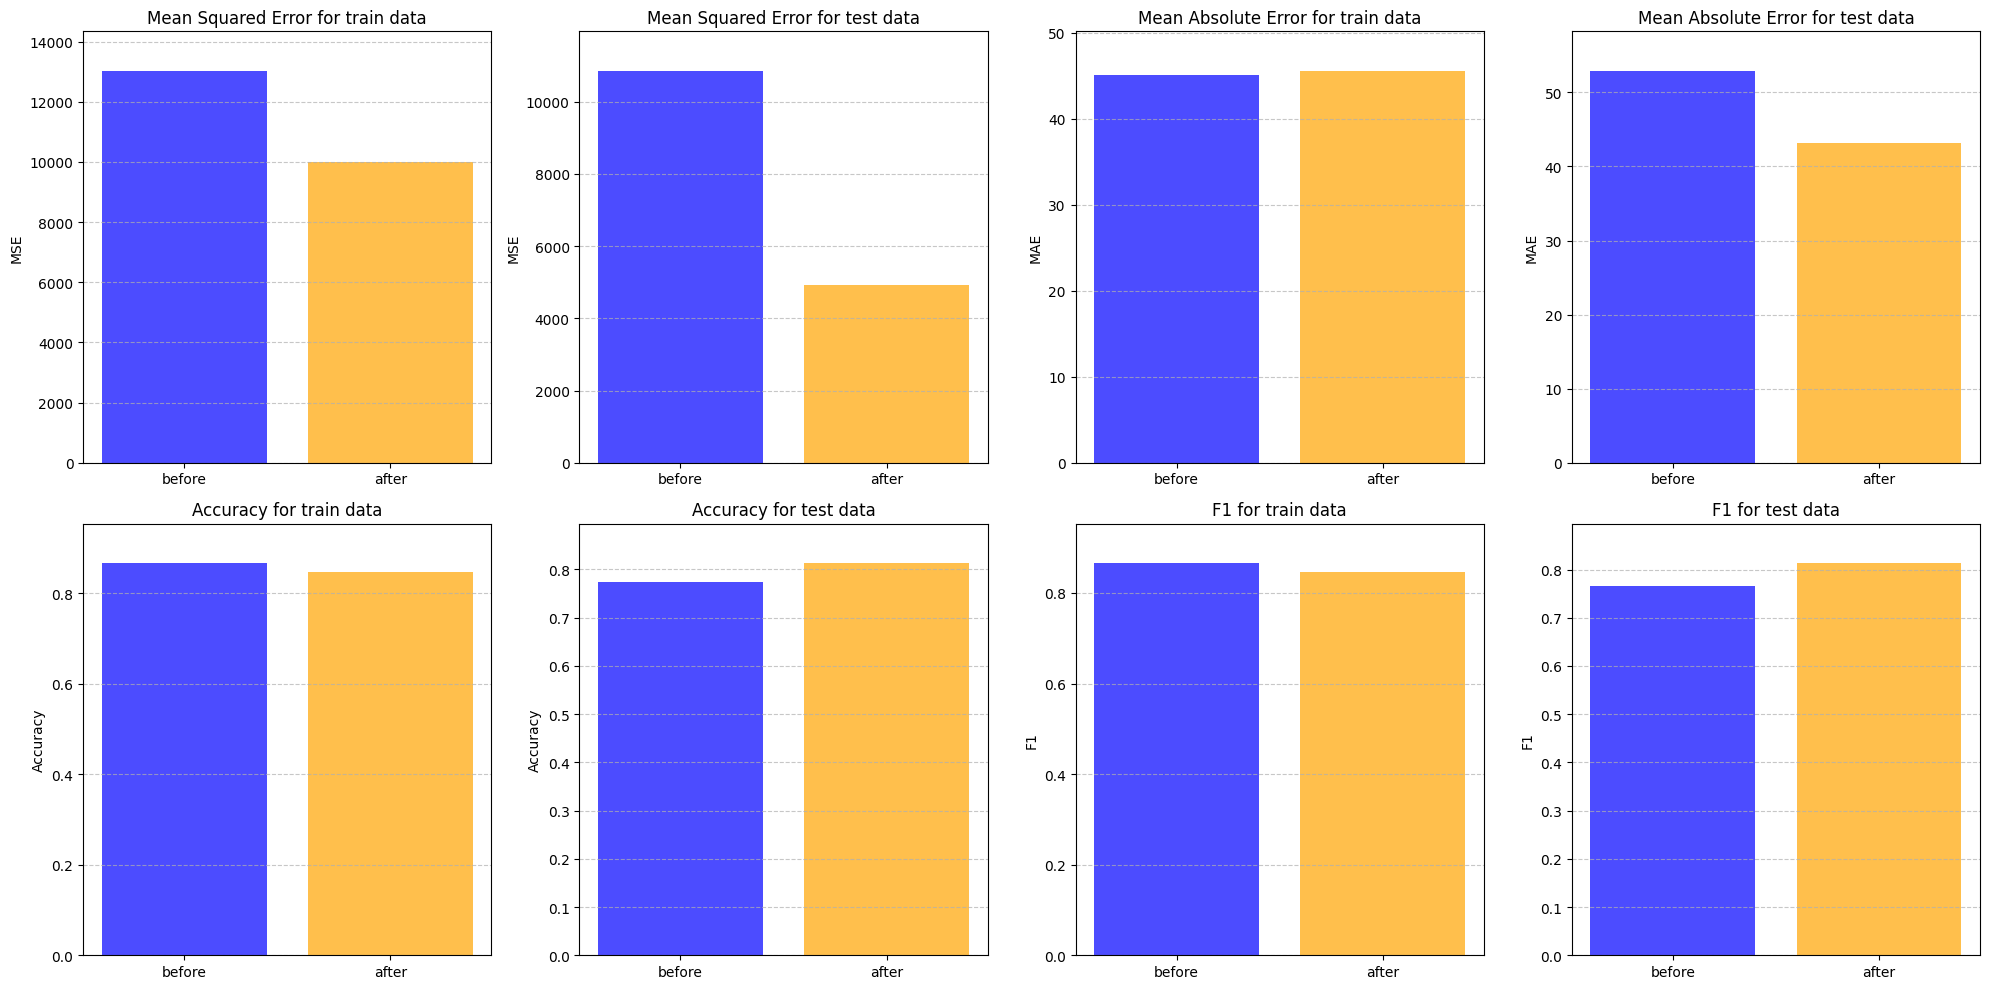

In [ ]:
labels = ['before', 'after']
colors = ['blue', 'orange']

def visualization(ax, values, name, label):
    ax.bar(labels, values, color=colors, alpha=0.7)
    ax.set_title(name)
    ax.set_ylabel(label)
    ax.set_ylim(0, max(values) * 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train, mse_train_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test, mse_test_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train, mae_train_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test, mae_test_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train, accuracy_train_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test, accuracy_test_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train, f1_train_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test, f1_test_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что точность моделей улучшилась после проведенных работ над данными и параметрами обучения. Проведенное улучшение бейзлайна считаю успешным.

Реализуем **собственный алгоритм машинного обучения для задач регрессии и классификации - алгоритм KNN**.

In [ ]:
class KNN:
    def __init__(self, num_neighbors=3, mode='classification'):
        """ Инициализация модели """
        if mode not in ['classification', 'regression']:
            raise ValueError("Режим должен быть 'classification' или 'regression'.")

        self.num_neighbors = num_neighbors
        self.mode = mode

    def fit(self, train_features, train_labels):
        """ Сохранение обучающих данных """
        self.train_features = np.asarray(train_features)
        self.train_labels = np.asarray(train_labels)
        return self

    def predict(self, test_features):
        """ Предсказание для входных данных """
        test_features = np.asarray(test_features)
        all_distances = np.empty((len(self.train_features), len(test_features)))

        for i, train_point in enumerate(self.train_features):
            all_distances[i, :] = self._calculate_row_distances(train_point, test_features)

        nearest_indices = np.argsort(all_distances, axis=0)[:self.num_neighbors]
        neighbor_labels = self.train_labels[nearest_indices]

        if self.mode == 'classification':
            predictions = [self._most_common_label(neighbors) for neighbors in neighbor_labels.T]
        elif self.mode == 'regression':
            predictions = [self._mean_value(neighbors) for neighbors in neighbor_labels.T]

        return np.array(predictions)

    def _calculate_row_distances(self, train_point, test_points):
        """ Расчет расстояний от одной обучающей точки до всех тестовых точек """
        return np.linalg.norm(test_points - train_point, axis=1)

    @staticmethod
    def _most_common_label(labels):
        """ Нахождение наиболее частой метки среди соседей """
        unique, counts = np.unique(labels, return_counts=True)
        return unique[np.argmax(counts)]

    @staticmethod
    def _mean_value(values):
        """ Вычисление среднего значения для соседей """
        return np.mean(values)

Создаем два объекта написанного класса KNN - объект классификатора на основе алгоритма k-ближайших соседей и объект регрессора на основе того же алгоритма. Параметр n_neighbors, который определяет количество соседей, учитываемых при принятии решения, также выставляем в величину 3. Датасет и параметры будем использовать те, что были получены **до улучшения бейзлайна**.

In [ ]:
knn_c = KNN(num_neighbors=3, mode='classification')
knn_r = KNN(num_neighbors=3, mode='regression')

Запускаем обучение модели для задачи классификации на датасете.

In [ ]:
knn_c.fit(X_train_c, y_train_c)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_knn_c = knn_c.predict(X_test_c)
y_train_pred_knn_c = knn_c.predict(X_train_c)

accuracy_test_knn = accuracy_score(y_test_c, y_test_pred_knn_c)
accuracy_train_knn = accuracy_score(y_train_c, y_train_pred_knn_c)

f1_test_knn = f1_score(y_test_c, y_test_pred_knn_c, average="weighted")
f1_train_knn = f1_score(y_train_c, y_train_pred_knn_c, average="weighted")

print_c(accuracy_test_knn, accuracy_train_knn, f1_test_knn, f1_train_knn)

Accuracy for test data: 0.76000
F1 for test data: 0.75319

Accuracy for train data: 0.85953
F1 for train data: 0.85925


Запускаем обучение модели для задачи регрессии.

In [ ]:
knn_r.fit(X_train_r, y_train_r)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_knn_r = knn_r.predict(X_test_r)
y_pred_train_knn_r = knn_r.predict(X_train_r)

mse_test_knn = mean_squared_error(y_test_r, y_pred_test_knn_r)
mae_test_knn = mean_absolute_error(y_test_r, y_pred_test_knn_r)

mse_train_knn = mean_squared_error(y_train_r, y_pred_train_knn_r)
mae_train_knn = mean_absolute_error(y_train_r, y_pred_train_knn_r)

print_r(mse_test_knn, mse_train_knn, mae_test_knn, mae_train_knn)

Mean Squared Error for test data: 10674.59407
Mean Absolute Error for test data: 51.87111

Mean Squared Error for train data: 13049.47417
Mean Absolute Error for train data: 45.66444


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, имеющихся **до улучшения бейзлайна**.

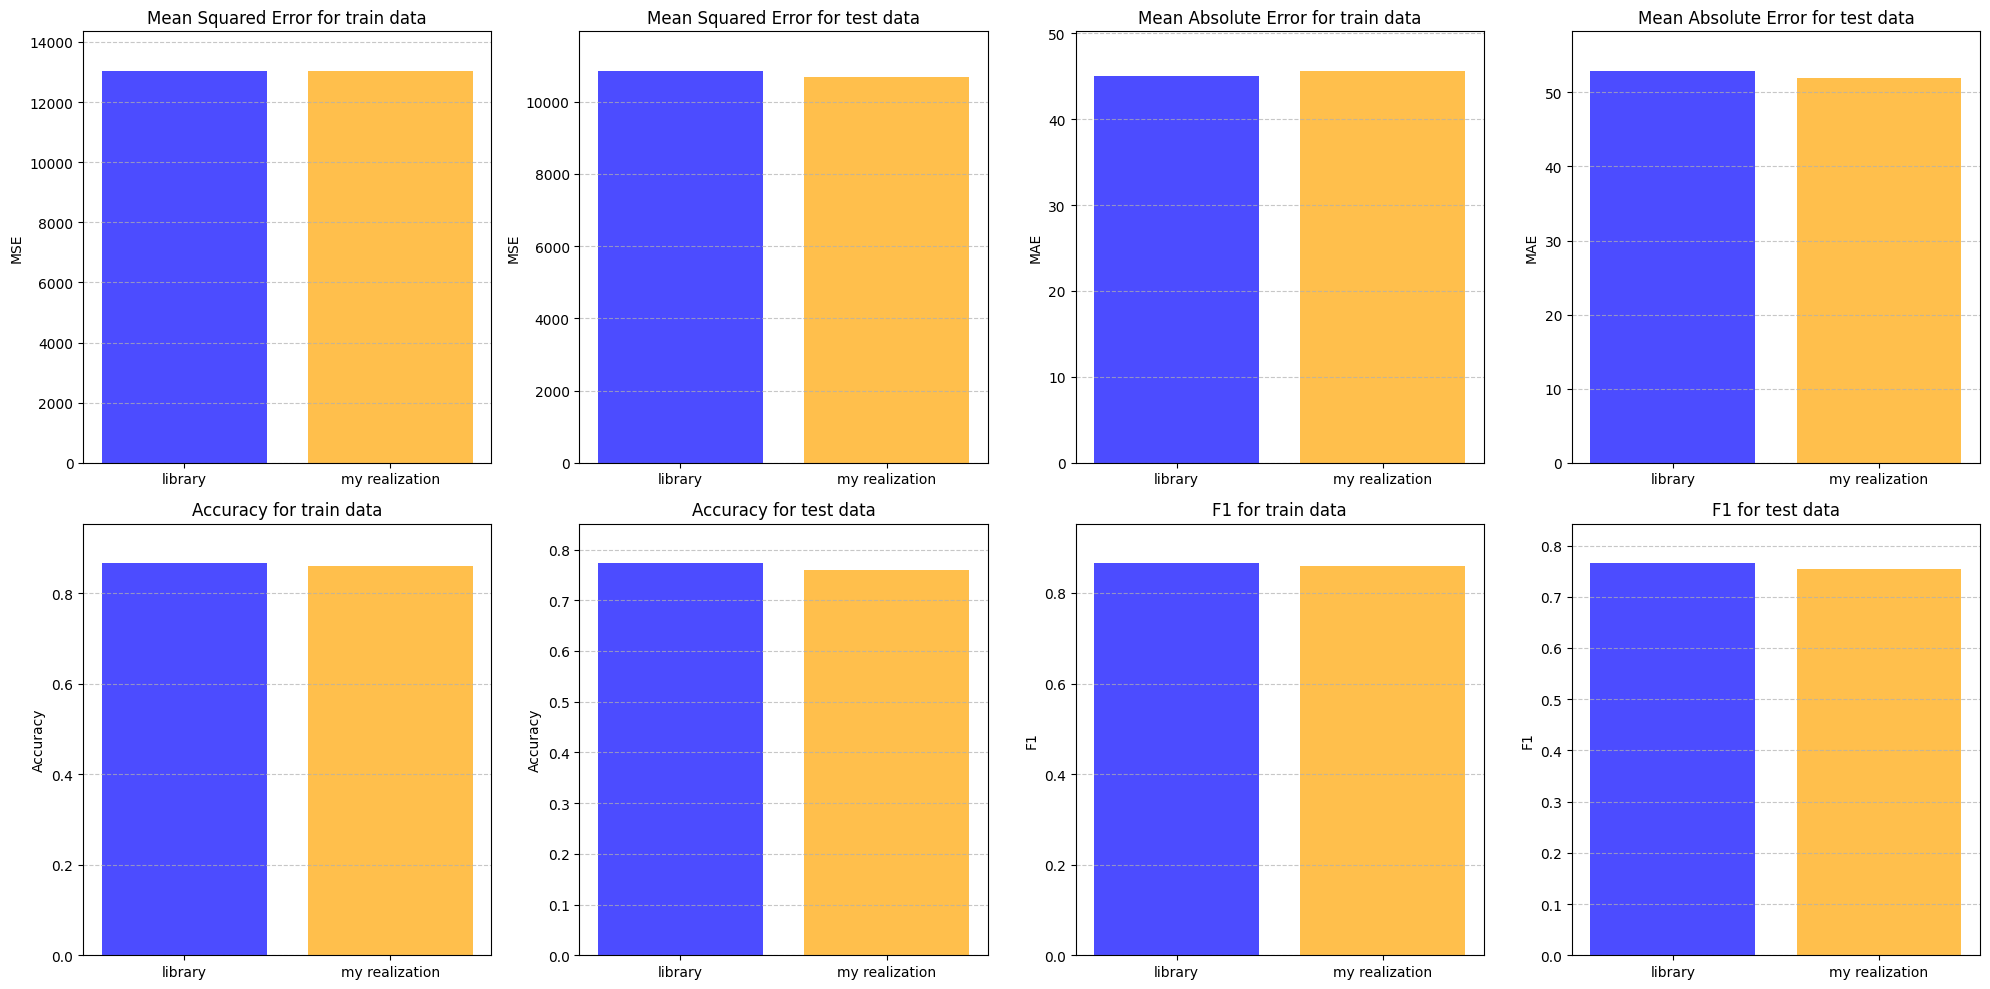

In [ ]:
labels = ['library', 'my realization']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train, mse_train_knn], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test, mse_test_knn], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train, mae_train_knn], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test, mae_test_knn], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train, accuracy_train_knn], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test, accuracy_test_knn], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train, f1_train_knn], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test, f1_test_knn], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения имеют аналогичные показатели погрешности, из-за чего можно сделать вывод об успехе собственной реализации алгоритма машинного обучения KNN.

Создаем два объекта написанного класса KNN - объект классификатора на основе алгоритма k-ближайших соседей и объект регрессора на основе того же алгоритма. Параметр n_neighbors, который определяет количество соседей, учитываемых при принятии решения, также выставляем в величину 3. Датасет и параметры будем использовать те, что были получены **после улучшения бейзлайна**.

In [ ]:
knn_c_2 = KNN(num_neighbors=3, mode='classification')
knn_r_2 = KNN(num_neighbors=3, mode='regression')

Запускаем обучение модели для задачи классификации.

In [ ]:
knn_c_2.fit(X_train_c_2_scaled, y_train_c_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_knn_c_2 = knn_c_2.predict(X_test_c_2_scaled)
y_train_pred_knn_c_2 = knn_c_2.predict(X_train_c_2_scaled)

accuracy_test_knn_2 = accuracy_score(y_test_c_2, y_test_pred_knn_c_2)
accuracy_train_knn_2 = accuracy_score(y_train_c_2, y_train_pred_knn_c_2)

f1_test_knn_2 = f1_score(y_test_c_2, y_test_pred_knn_c_2, average="weighted")
f1_train_knn_2 = f1_score(y_train_c_2, y_train_pred_knn_c_2, average="weighted")

print_c(accuracy_test_knn_2, accuracy_train_knn_2, f1_test_knn_2, f1_train_knn_2)

Accuracy for test data: 0.80000
F1 for test data: 0.79498

Accuracy for train data: 0.84615
F1 for train data: 0.84552


Запускаем обучение модели для задачи регрессии.

In [ ]:
knn_r_2.fit(X_train_r_2_scaled, y_train_r_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_knn_r_2 = knn_r_2.predict(X_test_r_2_scaled)
y_pred_train_knn_r_2 = knn_r_2.predict(X_train_r_2_scaled)

mse_test_knn_2 = mean_squared_error(y_test_r_2, y_pred_test_knn_r_2)
mae_test_knn_2 = mean_absolute_error(y_test_r_2, y_pred_test_knn_r_2)

mse_train_knn_2 = mean_squared_error(y_train_r_2, y_pred_train_knn_r_2)
mae_train_knn_2 = mean_absolute_error(y_train_r_2, y_pred_train_knn_r_2)

print_r(mse_test_knn_2, mse_train_knn_2, mae_test_knn_2, mae_train_knn_2)

Mean Squared Error for test data: 4934.78815
Mean Absolute Error for test data: 43.11111

Mean Squared Error for train data: 9965.36641
Mean Absolute Error for train data: 45.48384


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **после улучшения бейзлайна**.

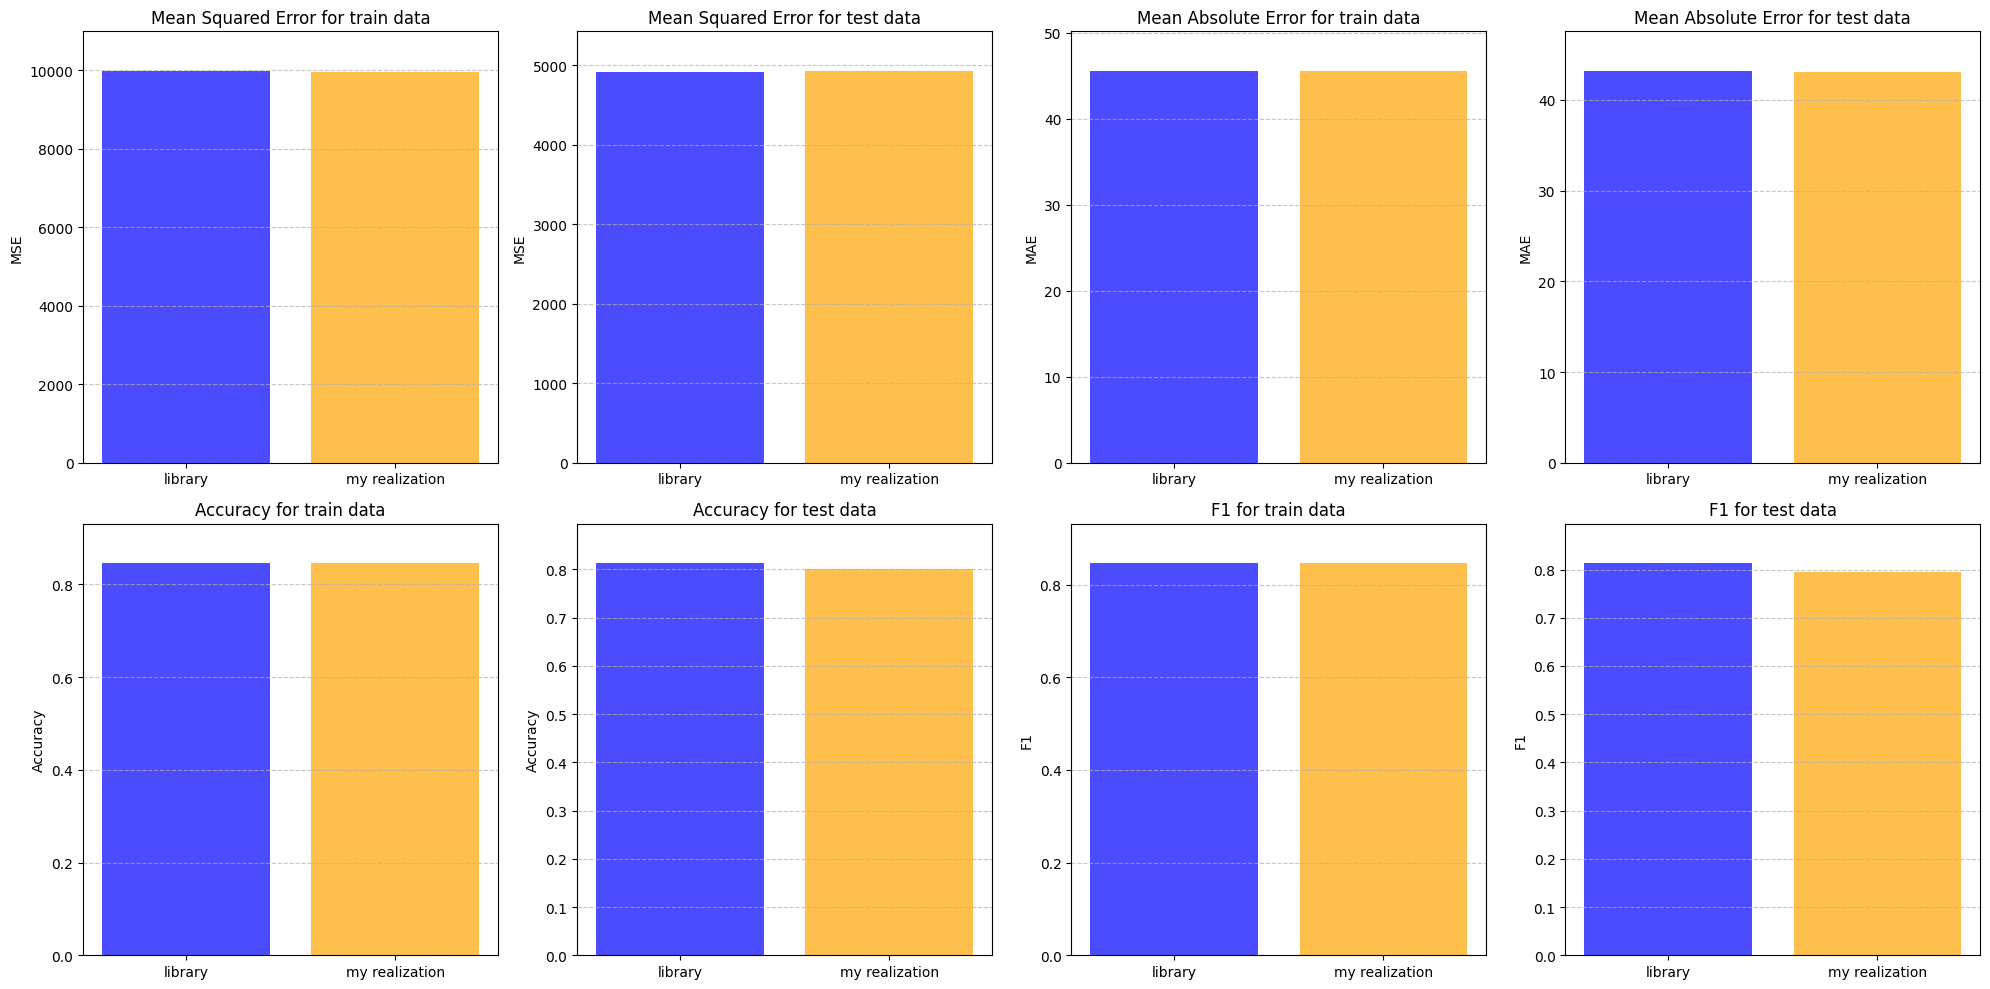

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_2, mse_train_knn_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_2, mse_test_knn_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_2, mae_train_knn_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_2, mae_test_knn_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_2, accuracy_train_knn_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_2, accuracy_test_knn_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_2, f1_train_knn_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_2, f1_test_knn_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения имеют аналогичные показатели погрешности, из-за чего можно сделать вывод об успехе собственной реализации алгоритма машинного обучения KNN.

# Лабораторная работа №2 "Проведение исследований с логистической и линейной регрессией"

Создаем два объекта - объект классификатора на основе логистической регрессии и объект регрессора на основе линейной регрессии из библиотеки sklearn. При обучении будем использовать тот датасет, что получился **до улучшения бейзлайна**.

In [ ]:
l_c = LogisticRegression(max_iter=2000, solver='liblinear')
l_r = LinearRegression()

Запускаем обучение модели для задачи классификации.

In [ ]:
l_c.fit(X_train_c, y_train_c)

LogisticRegression(max_iter=2000, solver='liblinear')

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_l_c = l_c.predict(X_test_c)
y_train_pred_l_c = l_c.predict(X_train_c)

accuracy_test_l = accuracy_score(y_test_c, y_test_pred_l_c)
accuracy_train_l = accuracy_score(y_train_c, y_train_pred_l_c)

f1_test_l = f1_score(y_test_c, y_test_pred_l_c, average="weighted")
f1_train_l = f1_score(y_train_c, y_train_pred_l_c, average="weighted")

print_c(accuracy_test_l, accuracy_train_l, f1_test_l, f1_train_l)

Accuracy for test data: 0.60000
F1 for test data: 0.58673

Accuracy for train data: 0.55518
F1 for train data: 0.53680


Запускаем обучение модели для задачи регрессии.

In [ ]:
l_r.fit(X_train_r, y_train_r)

LinearRegression(n_jobs=-1)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_l_r = l_r.predict(X_test_r)
y_pred_train_l_r = l_r.predict(X_train_r)

mse_test_l = mean_squared_error(y_test_r, y_pred_test_l_r)
mae_test_l = mean_absolute_error(y_test_r, y_pred_test_l_r)

mse_train_l = mean_squared_error(y_train_r, y_pred_train_l_r)
mae_train_l = mean_absolute_error(y_train_r, y_pred_train_l_r)

print_r(mse_test_l, mse_train_l, mae_test_l, mae_train_l)

Mean Squared Error for test data: 17246.98208
Mean Absolute Error for test data: 105.28715

Mean Squared Error for train data: 36887.23864
Mean Absolute Error for train data: 111.82474


Создаем два объекта - объект классификатора на основе логистической регрессии и объект регрессора на основе линейной регрессии из библиотеки sklearn. При обучении будем использовать тот датасет, что получился **после улучшения бейзлайна**.

In [ ]:
l_c_2 = LogisticRegression(max_iter=2000, class_weight='balanced')
l_r_2 = LinearRegression()

Запускаем обучение модели для задачи классификации.

In [ ]:
l_c_2.fit(X_train_c_2_scaled, y_train_c_2)

LogisticRegression(class_weight='balanced', max_iter=2000)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_l_c_2 = l_c_2.predict(X_test_c_2_scaled)
y_train_pred_l_c_2 = l_c_2.predict(X_train_c_2_scaled)

accuracy_test_l_2 = accuracy_score(y_test_c_2, y_test_pred_l_c_2)
accuracy_train_l_2 = accuracy_score(y_train_c_2, y_train_pred_l_c_2)

f1_test_l_2 = f1_score(y_test_c_2, y_test_pred_l_c_2, average="weighted")
f1_train_l_2 = f1_score(y_train_c_2, y_train_pred_l_c_2, average="weighted")

print_c(accuracy_test_l_2, accuracy_train_l_2, f1_test_l_2, f1_train_l_2)

Accuracy for test data: 0.61333
F1 for test data: 0.61137

Accuracy for train data: 0.50836
F1 for train data: 0.50933


Запускаем обучение модели для задачи регрессии.

In [ ]:
l_r_2.fit(X_train_r_2_scaled, y_train_r_2)

LinearRegression()

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_l_r_2 = l_r_2.predict(X_test_r_2_scaled)
y_pred_train_l_r_2 = l_r_2.predict(X_train_r_2_scaled)

mse_test_l_2 = mean_squared_error(y_test_r_2, y_pred_test_l_r_2)
mae_test_l_2 = mean_absolute_error(y_test_r_2, y_pred_test_l_r_2)

mse_train_l_2 = mean_squared_error(y_train_r_2, y_pred_train_l_r_2)
mae_train_l_2 = mean_absolute_error(y_train_r_2, y_pred_train_l_r_2)

print_r(mse_test_l_2, mse_train_l_2, mae_test_l_2, mae_train_l_2)

Mean Squared Error for test data: 15994.83041
Mean Absolute Error for test data: 101.80954

Mean Squared Error for train data: 37005.43705
Mean Absolute Error for train data: 112.73592


Сравним результаты обучения модели до и после проведенных работ по улучшению бейзлайна.

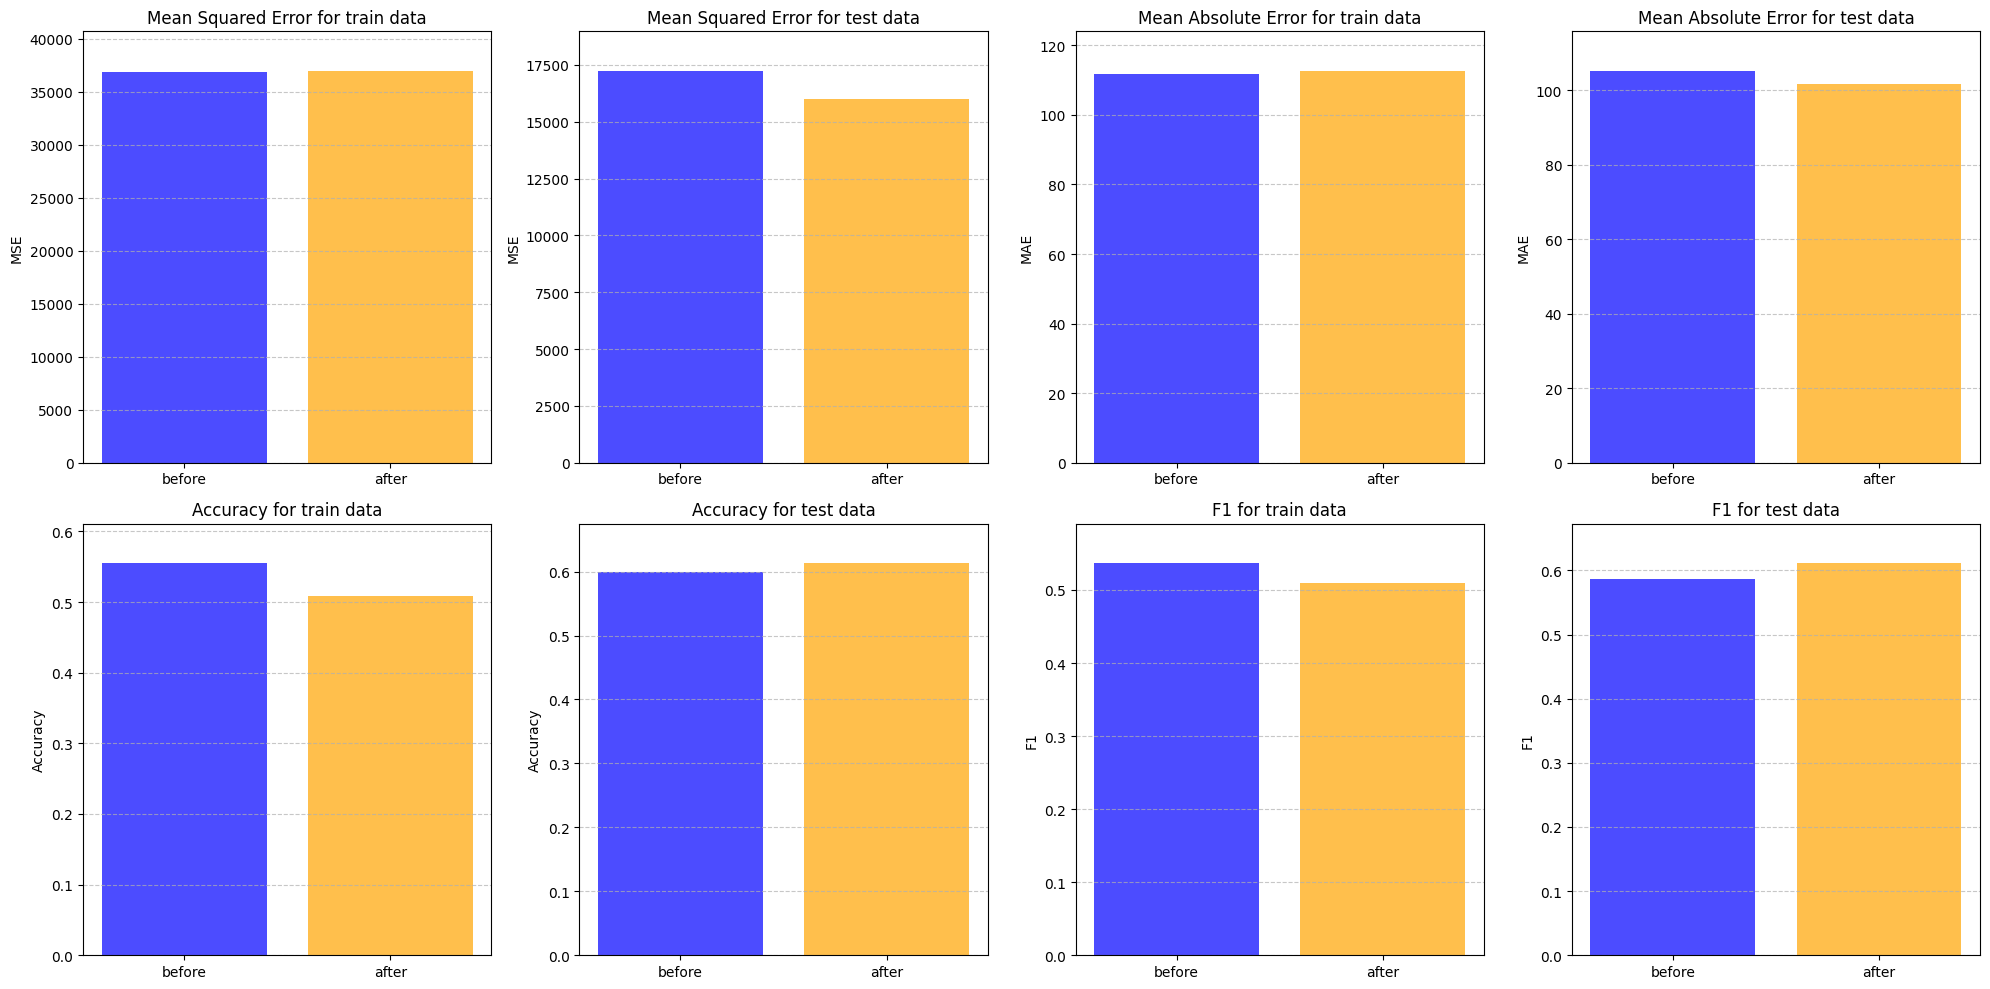

In [ ]:
labels = ['before', 'after']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_l, mse_train_l_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_l, mse_test_l_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_l, mae_train_l_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_l, mae_test_l_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_l, accuracy_train_l_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_l, accuracy_test_l_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_l, f1_train_l_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_l, f1_test_l_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что точность предсказаний моделей улучшилась после проведенных работ над данными и параметрами обучения. Для задачи классификации есть небольшое ухудшение показателей метрик на обучающей выборке, зато на тестовой выборке наблюдаются значительные улучшения. Проведенное улучшение бейзлайна считаю успешным.

Реализуем **собственные алгоритмы машинного обучения - логистическую регрессию для задачи классификации и линейную регрессию для задачи регрессии**.

In [ ]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, penalty=None, C=1.0, tolerance=1e-12):
        """ Инициализация параметров логистической регрессии """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.penalty = penalty
        self.C = C
        self.tolerance = tolerance
        self.weights = None
        self.biases = None
        self.n_classes = None

    def sigmoid(self, z):
        """ Вычисление сигмоидной функции активации """
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        """ Вычисление функции softmax для многоуровневой классификации """
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss(self, y_true, y_pred):
        """ Вычисление функции потерь с учетом регуляризации """
        m = len(y_true)
        loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / m

        if self.penalty == 'l2':
            loss += (1 / (2 * self.C)) * np.sum(self.weights ** 2)
        elif self.penalty == 'l1':
            loss += (1 / self.C) * np.sum(np.abs(self.weights))

        return loss

    def fit(self, X, y):
        """ Обучение модели логистической регрессии методом градиентного спуска """
        n_samples, n_features = X.shape
        self.n_classes = len(np.unique(y))

        y_one_hot = np.zeros((n_samples, self.n_classes))
        y_one_hot[np.arange(n_samples), y] = 1

        self.weights = np.random.randn(self.n_classes, n_features) * 0.01
        self.biases = np.zeros(self.n_classes)

        for iteration in range(self.max_iter):
            linear_model = np.dot(X, self.weights.T) + self.biases
            y_pred = self.softmax(linear_model)
            current_loss = self.loss(y_one_hot, y_pred)
            dw = (1 / n_samples) * np.dot((y_pred - y_one_hot).T, X)
            db = (1 / n_samples) * np.sum(y_pred - y_one_hot, axis=0)

            if self.penalty == 'l2':
                dw += (1 / self.C) * self.weights
            elif self.penalty == 'l1':
                dw += (1 / self.C) * np.sign(self.weights)

            self.weights -= self.learning_rate * dw
            self.biases -= self.learning_rate * db

            if iteration > 0 and abs(prev_loss - current_loss) < self.tolerance:
                print(f"Сошлось на итерации {iteration}")
                break

            prev_loss = current_loss

    def predict_proba(self, X):
        """ Предсказание вероятностей классов для входных данных """
        linear_model = np.dot(X, self.weights.T) + self.biases
        return self.softmax(linear_model)

    def predict(self, X):
        """ Предсказание меток классов для входных данных """
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

In [ ]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, penalty=None, C=1.0, epsilon=1e-8):
        """ Инициализация параметров для модели линейной регрессии """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.penalty = penalty
        self.C = C
        self.epsilon = epsilon
        self.weights = None
        self.bias = None

    def loss(self, y_true, y_pred):
        """ Вычисление функции потерь с добавлением регуляризации """
        m = len(y_true)
        loss = (1 / (2 * m)) * np.sum((y_true - y_pred) ** 2)

        if self.penalty == 'l2':
            loss += (1 / (2 * self.C)) * np.sum(self.weights ** 2)
        elif self.penalty == 'l1':
            loss += (1 / self.C) * np.sum(np.abs(self.weights))

        return loss

    def fit(self, X, y):
        """ Обучение модели с помощью градиентного спуска """
        X = self._normalize(X)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.max_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = -(1 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(1 / n_samples) * np.sum(y - y_pred)

            if self.penalty == 'l2':
                dw += (1 / self.C) * self.weights
            elif self.penalty == 'l1':
                dw += (1 / self.C) * np.sign(self.weights)

            dw = np.clip(dw, -1.0, 1.0)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            self.learning_rate *= 0.99
            current_loss = self.loss(y, y_pred)

            if current_loss == np.inf or np.isnan(current_loss):
                print("Достигнута числовая нестабильность. Обучение остановлено.")
                break

    def predict(self, X):
        """ Предсказание для новых данных """
        X = self._normalize(X)
        return np.dot(X, self.weights) + self.bias

    def _normalize(self, X):
        """ Нормализация данных для устранения числовой нестабильности """
        return (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + self.epsilon)

Создаем объекты написанного классов для задач классификации и регрессии. Датасет будем использовать тот, что был **до улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_l_c = MyLogisticRegression(learning_rate=0.1, max_iter=4000, C=0.8)
my_l_r = MyLinearRegression(max_iter=3000, penalty='l2', learning_rate=0.2)

Запускаем обучение модели для задачи классификации.

In [ ]:
my_l_c.fit(X_train_c, y_train_c)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
accuracy_test_my_l = 0.57333
accuracy_train_my_l = 0.52843

f1_test_my_l = 0.49438
f1_train_my_l = 0.44997

In [ ]:
y_test_pred_my_l_c = my_l_c.predict(X_test_c)
y_train_pred_my_l_c = my_l_c.predict(X_train_c)

accuracy_test_my_l = accuracy_score(y_test_c, y_test_pred_my_l_c)
accuracy_train_my_l = accuracy_score(y_train_c, y_train_pred_my_l_c)

f1_test_my_l = f1_score(y_test_c, y_test_pred_my_l_c, average="weighted")
f1_train_my_l = f1_score(y_train_c, y_train_pred_my_l_c, average="weighted")

print_c(accuracy_test_my_l, accuracy_train_my_l, f1_test_my_l, f1_train_my_l)

Accuracy for test data: 0.57333
F1 for test data: 0.49438

Accuracy for train data: 0.52843
F1 for train data: 0.44997


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_l_r.fit(X_train_r, y_train_r)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_l_r = my_l_r.predict(X_test_r)
y_pred_train_my_l_r = my_l_r.predict(X_train_r)

mse_test_my_l = mean_squared_error(y_test_r, y_pred_test_my_l_r)
mae_test_my_l = mean_absolute_error(y_test_r, y_pred_test_my_l_r)

mse_train_my_l = mean_squared_error(y_train_r, y_pred_train_my_l_r)
mae_train_my_l = mean_absolute_error(y_train_r, y_pred_train_my_l_r)

print_r(mse_test_my_l, mse_train_my_l, mae_test_my_l, mae_train_my_l)

Mean Squared Error for test data: 19043.76785
Mean Absolute Error for test data: 103.41741

Mean Squared Error for train data: 38659.65959
Mean Absolute Error for train data: 111.14137


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **до улучшения бейзлайна**.

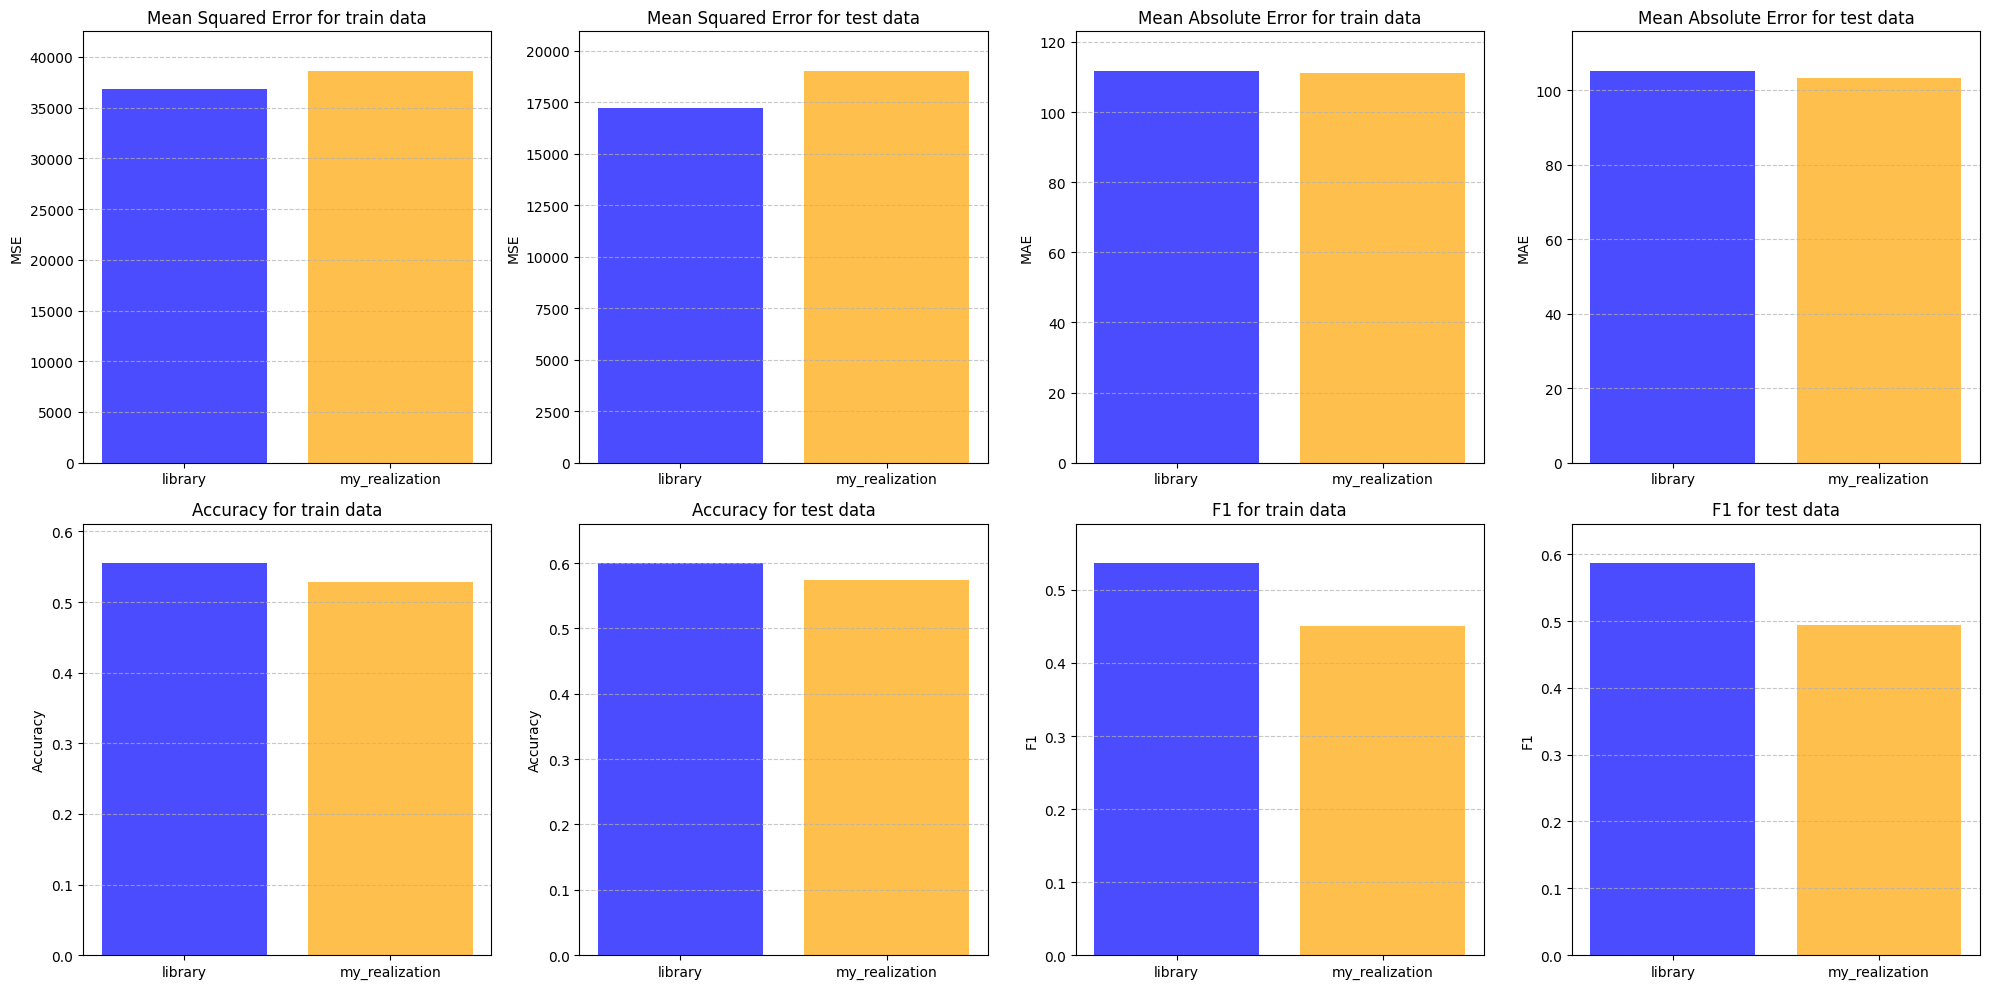

In [ ]:
labels = ['library', 'my_realization']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_l, mse_train_my_l], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_l, mse_test_my_l], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_l, mae_train_my_l], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_l, mae_test_my_l], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_l, accuracy_train_my_l], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_l, accuracy_test_my_l], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_l, f1_train_my_l], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_l, f1_test_my_l], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения для задачи классификации имеют практически аналогичные показатели погрешности, модель самостоятельной реализации показывает немного худшие точности. Однако можно сделать вывод об успехе собственной реализации алгоритмов логистической регрессии и линейной регрессии.

Создаем объекты написанного классов для задач классификации и регрессии. Датасет будем использовать тот, что был **после улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_l_c_2 = MyLogisticRegression(learning_rate=0.1, max_iter=4000, C=0.8)
my_l_r_2 = MyLinearRegression(max_iter=3000, penalty='l1', learning_rate=0.)

Запускаем обучение модели для задачи классификации.

In [ ]:
my_l_c_2.fit(X_train_c_2, y_train_c_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_my_l_c_2 = my_l_c_2.predict(X_test_c_2)
y_train_pred_my_l_c_2 = my_l_c_2.predict(X_train_c_2)

accuracy_test_my_l_2 = accuracy_score(y_test_c_2, y_test_pred_my_l_c_2)
accuracy_train_my_l_2 = accuracy_score(y_train_c_2, y_train_pred_my_l_c_2)

f1_test_my_l_2 = f1_score(y_test_c_2, y_test_pred_my_l_c_2, average="weighted")
f1_train_my_l_2 = f1_score(y_train_c_2, y_train_pred_my_l_c_2, average="weighted")

print_c(accuracy_test_my_l_2, accuracy_train_my_l_2, f1_test_my_l_2, f1_train_my_l_2)

Accuracy for test data: 0.60873
F1 for test data: 0.59976

Accuracy for train data: 0.50672
F1 for train data: 0.50997


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_l_r_2.fit(X_train_r_2, y_train_r_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_l_r_2 = my_l_r_2.predict(X_test_r_2)
y_pred_train_my_l_r_2 = my_l_r_2.predict(X_train_r_2)

mse_test_my_l_2 = mean_squared_error(y_test_r_2, y_pred_test_my_l_r_2)
mae_test_my_l_2 = mean_absolute_error(y_test_r_2, y_pred_test_my_l_r_2)

mse_train_my_l_2 = mean_squared_error(y_train_r_2, y_pred_train_my_l_r_2)
mae_train_my_l_2 = mean_absolute_error(y_train_r_2, y_pred_train_my_l_r_2)

print_r(mse_test_my_l_2, mse_train_my_l_2, mae_test_my_l_2, mae_train_my_l_2)

Mean Squared Error for test data: 16699.59914
Mean Absolute Error for test data: 100.57300

Mean Squared Error for train data: 37383.43765
Mean Absolute Error for train data: 109.28381


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **после улучшения бейзлайна**.

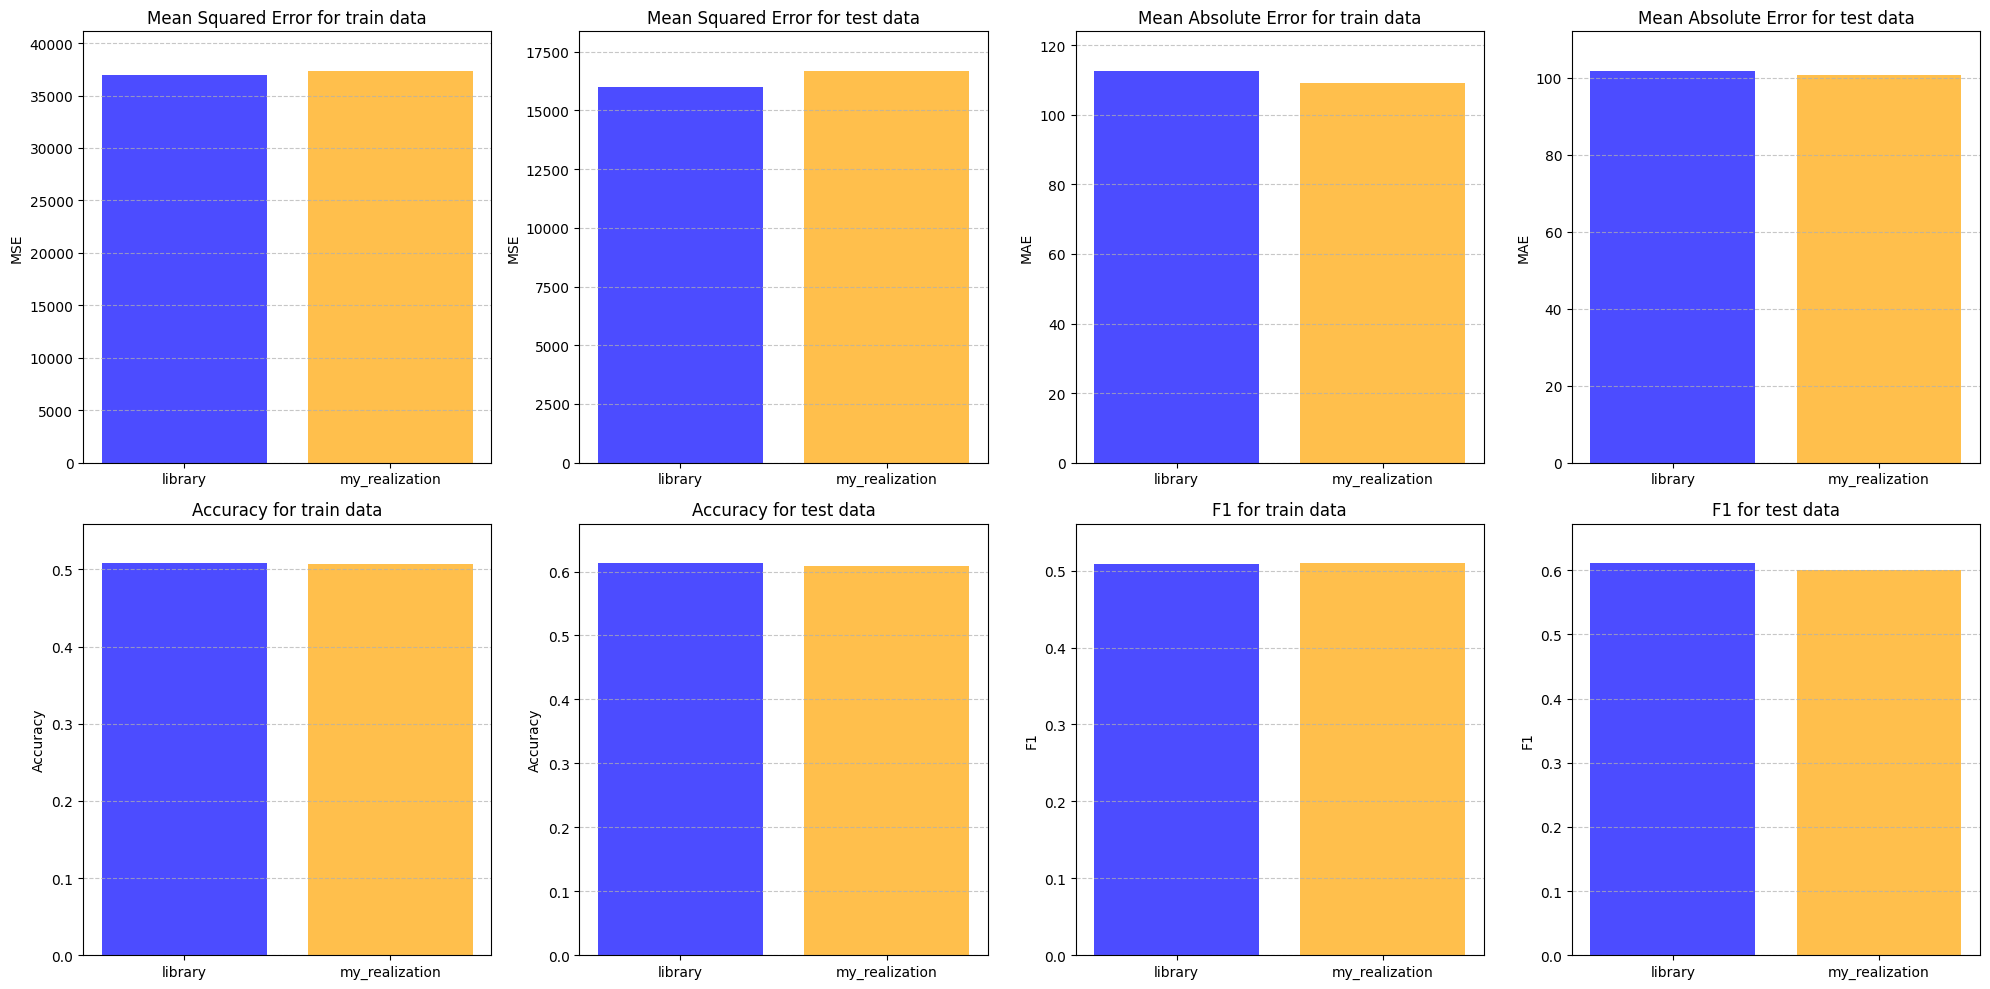

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_l_2, mse_train_my_l_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_l_2, mse_test_my_l_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_l_2, mae_train_my_l_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_l_2, mae_test_my_l_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_l_2, accuracy_train_my_l_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_l_2, accuracy_test_my_l_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_l_2, f1_train_my_l_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_l_2, f1_test_my_l_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения для задачи классификации имеют аналогичные показатели погрешности. Из этого можно сделать вывод об успехе собственной реализации алгоритмов логистической регрессии и линейной регрессии.

# Лабораторная работа №3 "Проведение исследований с решающим деревом"

Создаем два объекта - объект классификатора на основе алгоритма решающего дерева и объект регрессора на основе того же алгоритма из библиотеки sklearn. При обучении будем использовать тот датасет, что был **до улучшения бейзлайна**.

In [ ]:
tree_c = DecisionTreeClassifier(random_state=2)
tree_r = DecisionTreeRegressor(random_state=2)

Запускаем обучение модели для задачи классификации.

In [ ]:
tree_c.fit(X_train_c, y_train_c)

DecisionTreeClassifier(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_tree_c = tree_c.predict(X_test_c)
y_train_pred_tree_c = tree_c.predict(X_train_c)

accuracy_test_tree = accuracy_score(y_test_c, y_test_pred_tree_c)
accuracy_train_tree = accuracy_score(y_train_c, y_train_pred_tree_c)

f1_test_tree = f1_score(y_test_c, y_test_pred_tree_c, average="weighted")
f1_train_tree = f1_score(y_train_c, y_train_pred_tree_c, average="weighted")

print_c(accuracy_test_tree, accuracy_train_tree, f1_test_tree, f1_train_tree)

Accuracy for test data: 0.77333
F1 for test data: 0.77191

Accuracy for train data: 0.97659
F1 for train data: 0.97653


Запускаем обучение модели для задачи регрессии.

In [ ]:
tree_r.fit(X_train_r, y_train_r)

DecisionTreeRegressor(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_tree_r = tree_r.predict(X_test_r)
y_pred_train_tree_r = tree_r.predict(X_train_r)

mse_test_tree = mean_squared_error(y_test_r, y_pred_test_tree_r)
mae_test_tree = mean_absolute_error(y_test_r, y_pred_test_tree_r)

mse_train_tree = mean_squared_error(y_train_r, y_pred_train_tree_r)
mae_train_tree = mean_absolute_error(y_train_r, y_pred_train_tree_r)

print_r(mse_test_tree, mse_train_tree, mae_test_tree, mae_train_tree)

Mean Squared Error for test data: 3347.95704
Mean Absolute Error for test data: 30.97333

Mean Squared Error for train data: 207.46878
Mean Absolute Error for train data: 4.23746


Создаем два объекта - объект классификатора на основе алгоритма решающего дерева и объект регрессора на основе того же алгоритма из библиотеки sklearn. При обучении будем использовать тот датасет, что получился **после улучшения бейзлайна**.

In [ ]:
tree_c_2 = DecisionTreeClassifier(random_state=2)
tree_r_2 = DecisionTreeRegressor(random_state=2)

Запускаем обучение модели для задачи классификации.

In [ ]:
tree_c_2.fit(X_train_c_2, y_train_c_2)

DecisionTreeClassifier(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_tree_c_2 = tree_c_2.predict(X_test_c_2)
y_train_pred_tree_c_2 = tree_c_2.predict(X_train_c_2)

accuracy_test_tree_2 = accuracy_score(y_test_c, y_test_pred_tree_c_2)
accuracy_train_tree_2 = accuracy_score(y_train_c, y_train_pred_tree_c_2)

f1_test_tree_2 = f1_score(y_test_c, y_test_pred_tree_c_2, average="weighted")
f1_train_tree_2 = f1_score(y_train_c, y_train_pred_tree_c_2, average="weighted")

print_c(accuracy_test_tree_2, accuracy_train_tree_2, f1_test_tree_2, f1_train_tree_2)

Accuracy for test data: 0.78667
F1 for test data: 0.78704

Accuracy for train data: 0.95318
F1 for train data: 0.95359


Запускаем обучение модели для задачи регрессии.

In [ ]:
tree_r_2.fit(X_train_r_2, y_train_r_2)

DecisionTreeRegressor(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_tree_r_2 = tree_r_2.predict(X_test_r_2)
y_pred_train_tree_r_2 = tree_r_2.predict(X_train_r_2)

mse_test_tree_2 = mean_squared_error(y_test_r, y_pred_test_tree_r_2)
mae_test_tree_2 = mean_absolute_error(y_test_r, y_pred_test_tree_r_2)

mse_train_tree_2 = mean_squared_error(y_train_r, y_pred_train_tree_r_2)
mae_train_tree_2 = mean_absolute_error(y_train_r, y_pred_train_tree_r_2)

print_r(mse_test_tree_2, mse_train_tree_2, mae_test_tree_2, mae_train_tree_2)

Mean Squared Error for test data: 2845.57496
Mean Absolute Error for test data: 26.15925

Mean Squared Error for train data: 893.16931
Mean Absolute Error for train data: 10.24244


Сравним результаты обучения модели до и после проведенных работ по улучшению бейзлайна.

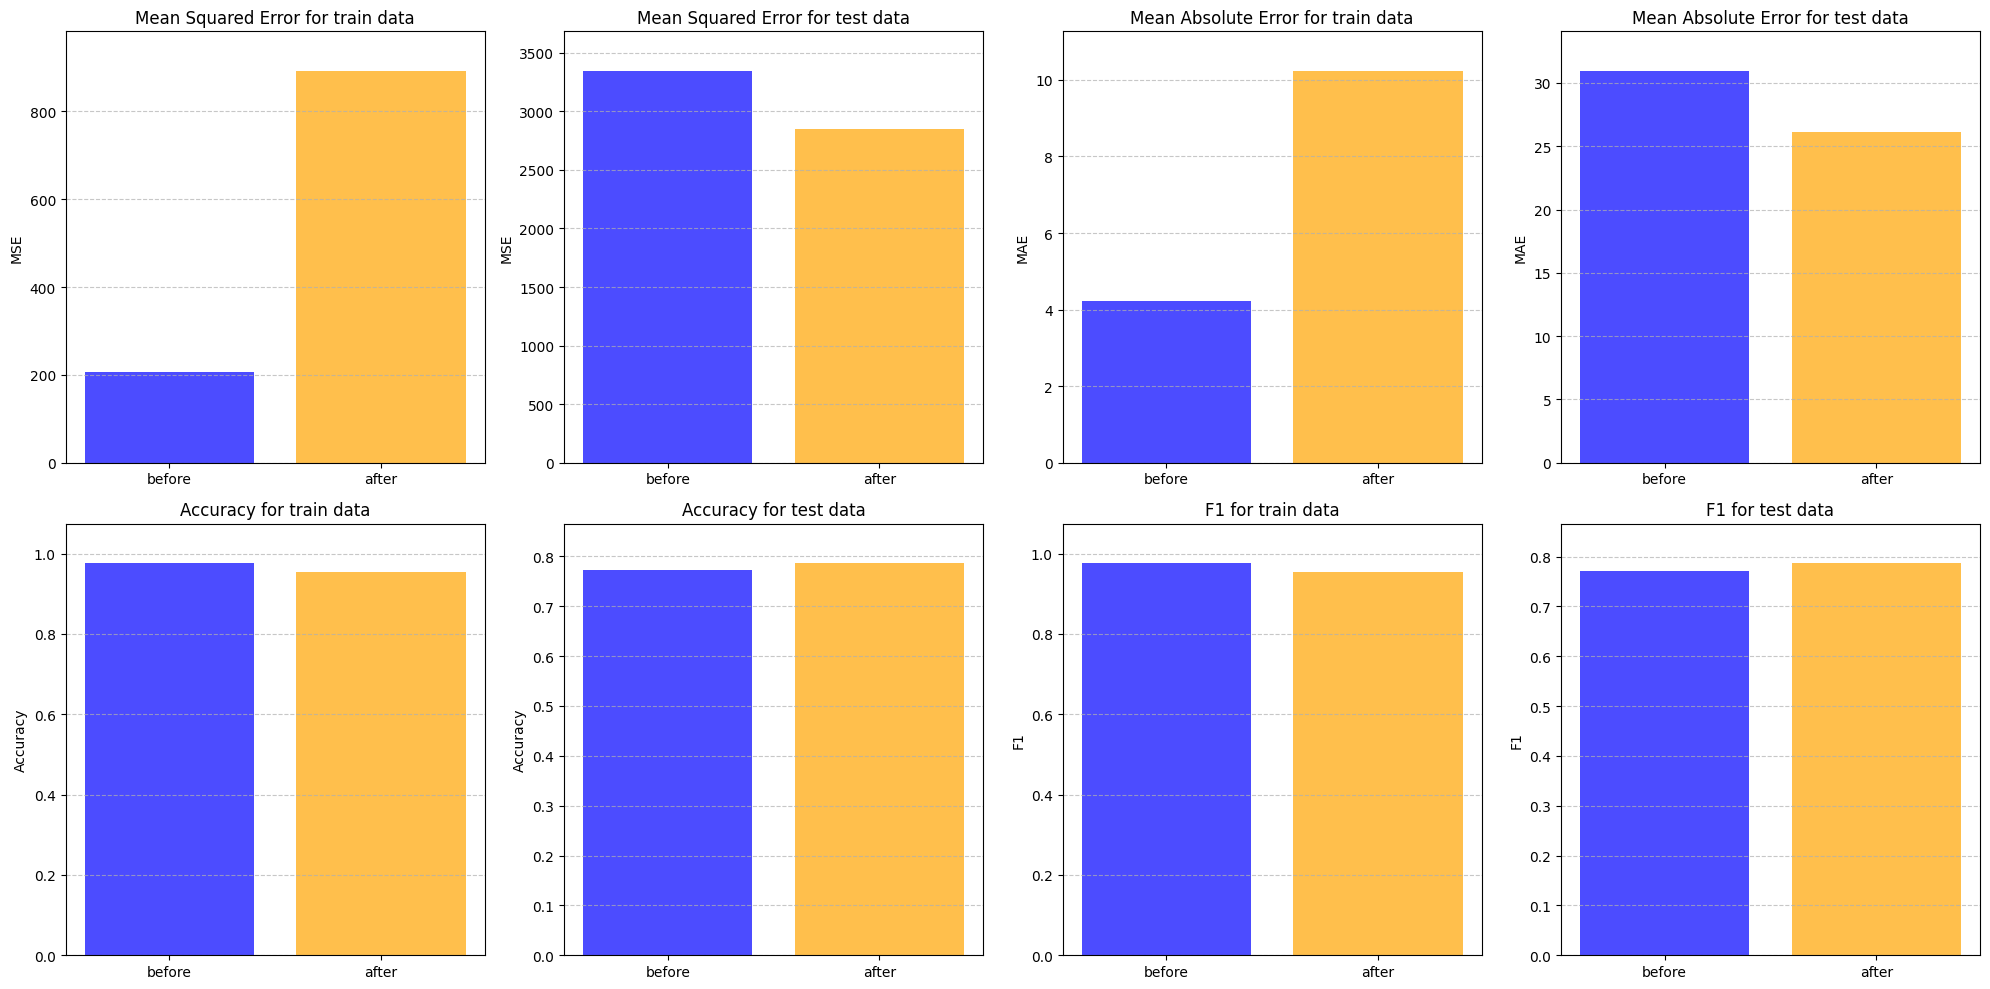

In [ ]:
labels = ['before', 'after']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_tree, mse_train_tree_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_tree, mse_test_tree_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_tree, mae_train_tree_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_tree, mae_test_tree_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_tree, accuracy_train_tree_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_tree, accuracy_test_tree_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_tree, f1_train_tree_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_tree, f1_test_tree_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что точность моделей улучшилась после проведенных работ над данными и параметрами обучения. Для задачи регрессии возникло ухудшение показателей метрик на обучающей выборке, зато на тестовой выборке наблюдаются улучшения. Проведенное улучшение бейзлайна считаю успешным.

Реализуем **собственный алгоритм машинного обучения для задач регрессии и классификации - алгоритм решающего дерева**.

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion="gini"):
        """ Инициализация параметров дерева """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y):
        """ Построение дерева решений """
        X = np.array(X)
        y = np.array(y)
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        """ Предсказание для набора данных """
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth):
        """ Рекурсивное построение дерева """
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or \
           (num_samples < self.min_samples_split) or \
           (num_classes == 1):
            return self._create_leaf(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return self._create_leaf(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        if np.sum(left_indices) < self.min_samples_leaf or np.sum(right_indices) < self.min_samples_leaf:
            return self._create_leaf(y)

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {
            "feature": best_feature,
            "threshold": best_threshold,
            "left": left_subtree,
            "right": right_subtree,
        }

    def _find_best_split(self, X, y):
        """ Поиск лучшего разбиения на основе заданного критерия """
        best_gain = -np.inf
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                gain = self._calculate_gain(y, X[:, feature], threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_gain(self, y, feature_column, threshold):
        """ Вычисление прироста информации (или уменьшения ошибки) """
        left_indices = feature_column <= threshold
        right_indices = feature_column > threshold

        if self.criterion == "gini":
            return self._classification_gain(y, y[left_indices], y[right_indices], self._gini)
        elif self.criterion == "entropy":
            return self._classification_gain(y, y[left_indices], y[right_indices], self._entropy)
        elif self.criterion == "mse":
            return self._regression_gain(y, y[left_indices], y[right_indices])
        else:
            raise ValueError("Неизвестный критерий разбиения.")

    def _classification_gain(self, y, left_y, right_y, metric):
        """ Вычисление прироста информации для классификации """
        p = len(left_y) / len(y)
        return metric(y) - (p * metric(left_y) + (1 - p) * metric(right_y))

    def _regression_gain(self, y, left_y, right_y):
        """Уменьшение среднеквадратической ошибки для регрессии """
        mse_full = self._mse(y)
        mse_left = self._mse(left_y)
        mse_right = self._mse(right_y)
        return mse_full - (len(left_y) / len(y)) * mse_left - (len(right_y) / len(y)) * mse_right

    def _gini(self, y):
        """ Вычисление индекса Джини """
        if len(y) == 0:
            return 0

        proportions = np.bincount(y) / len(y)
        return 1 - np.sum(proportions**2)

    def _entropy(self, y):
        """ Вычисление энтропии """
        if len(y) == 0:
            return 0

        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

    def _mse(self, y):
        """ Вычисление среднеквадратической ошибки """
        if len(y) == 0:
            return 0

        mean = np.mean(y)
        return np.mean((y - mean) ** 2)

    def _create_leaf(self, y):
        """ Создание листа с предсказанием """
        if len(y) == 0:
            return None

        if self.criterion in ["gini", "entropy"]:
            return np.bincount(y).argmax()
        elif self.criterion == "mse":
            return np.mean(y)

    def _predict_sample(self, x, tree):
        """ Предсказание для одного объекта """
        if isinstance(tree, dict):
            feature = tree["feature"]
            threshold = tree["threshold"]
            if x[feature] <= threshold:
                return self._predict_sample(x, tree["left"])
            else:
                return self._predict_sample(x, tree["right"])
        else:
            return tree

Создаем объекты написанного класса решающего дерева для задач классификации и регрессии. Датасет будем использовать тот, что был **до улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_tree_c = DecisionTree(max_depth=30, criterion="gini", min_samples_split=5)
my_tree_r = DecisionTree(max_depth=30, criterion="mse", min_samples_split=8)

Запускаем обучение модели для задачи классификации.

In [ ]:
my_tree_c.fit(X_train_c, y_train_c)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_my_tree_c = my_tree_c.predict(X_test_c)
y_train_pred_my_tree_c = my_tree_c.predict(X_train_c)

accuracy_test_my_tree = accuracy_score(y_test_c, y_test_pred_my_tree_c)
accuracy_train_my_tree = accuracy_score(y_train_c, y_train_pred_my_tree_c)

f1_test_my_tree = f1_score(y_test_c, y_test_pred_my_tree_c, average="weighted")
f1_train_my_tree = f1_score(y_train_c, y_train_pred_my_tree_c, average="weighted")

print_c(accuracy_test_my_tree, accuracy_train_my_tree, f1_test_my_tree, f1_train_my_tree)

Accuracy for test data: 0.76000
F1 for test data: 0.74333

Accuracy for train data: 0.93311
F1 for train data: 0.93266


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_tree_r.fit(X_train_r, y_train_r)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_tree_r = my_tree_r.predict(X_test_r)
y_pred_train_my_tree_r = my_tree_r.predict(X_train_r)

mse_test_my_tree = mean_squared_error(y_test_r, y_pred_test_my_tree_r)
mae_test_my_tree = mean_absolute_error(y_test_r, y_pred_test_my_tree_r)

mse_train_my_tree = mean_squared_error(y_train_r, y_pred_train_my_tree_r)
mae_train_my_tree = mean_absolute_error(y_train_r, y_pred_train_my_tree_r)

print_r(mse_test_my_tree, mse_train_my_tree, mae_test_my_tree, mae_train_my_tree)

Mean Squared Error for test data: 2784.37077
Mean Absolute Error for test data: 31.87479

Mean Squared Error for train data: 8469.76642
Mean Absolute Error for train data: 27.90363


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **до улучшения бейзлайна**.

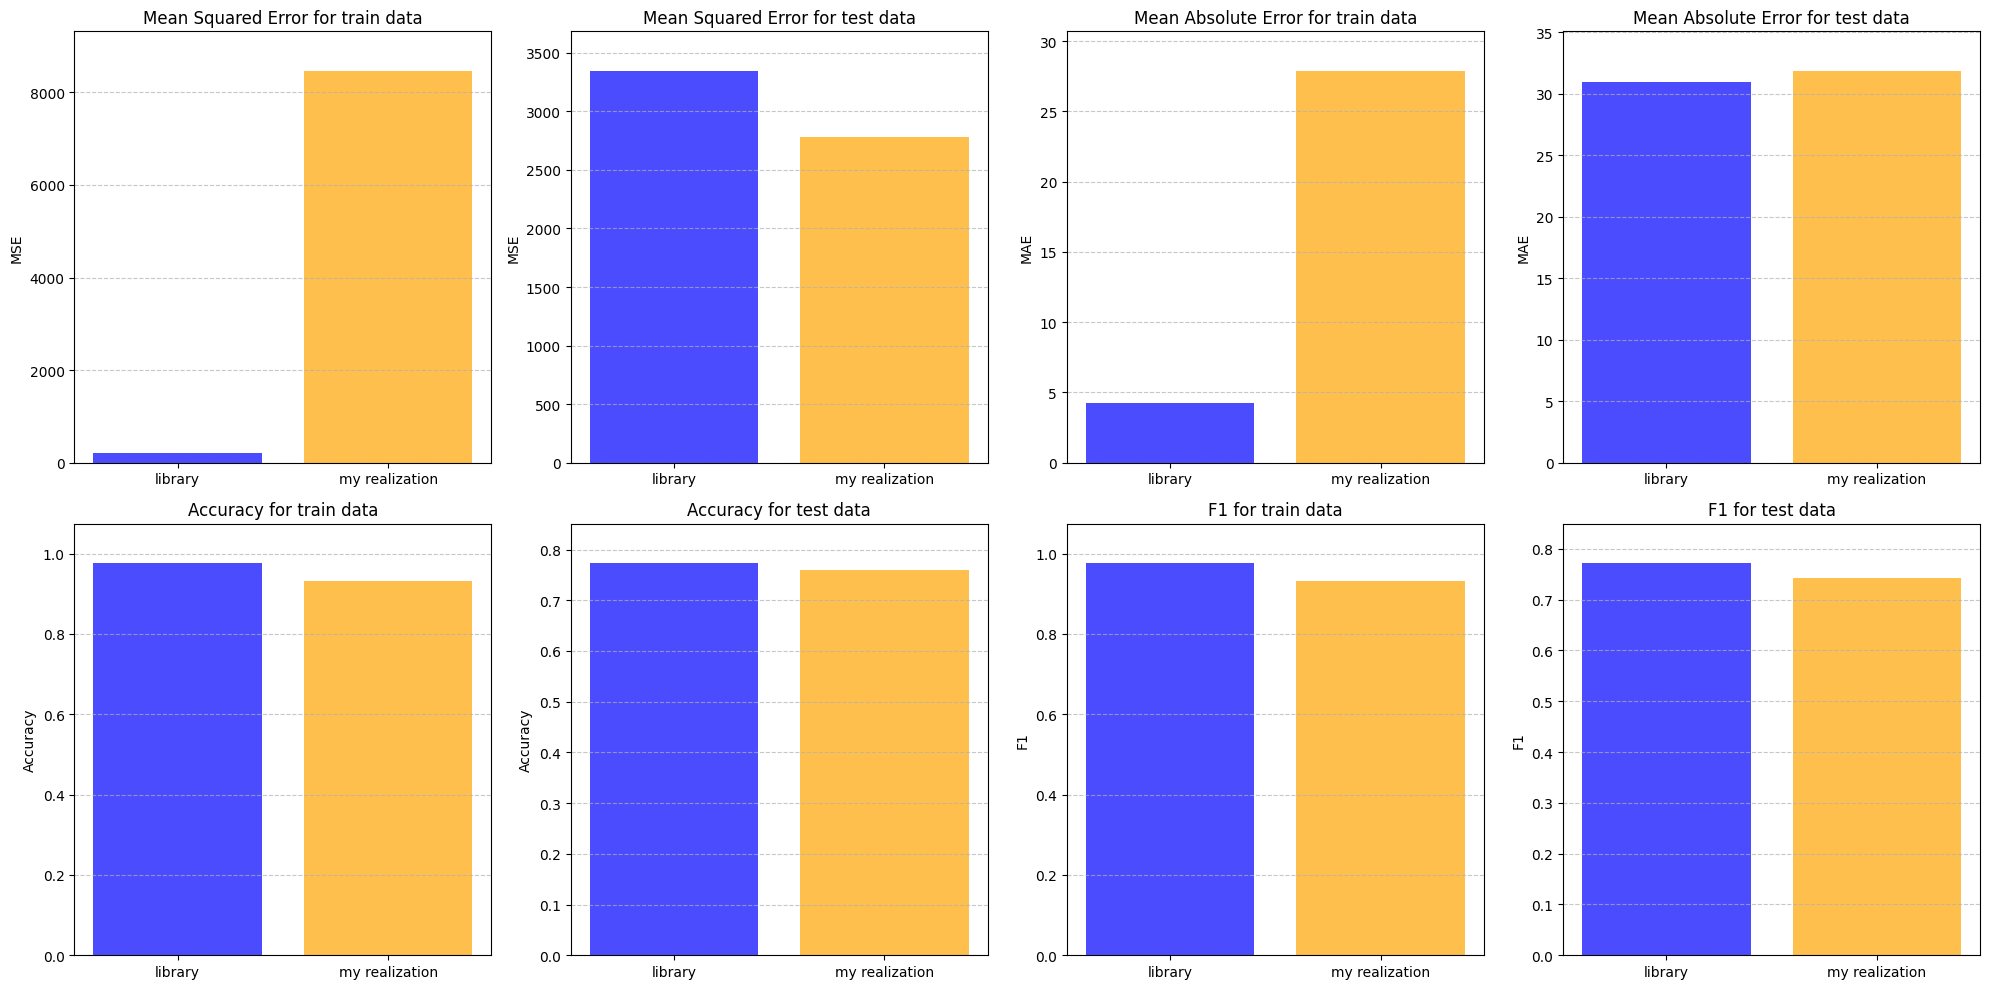

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_tree, mse_train_my_tree], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_tree, mse_test_my_tree], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_tree, mae_train_my_tree], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_tree, mae_test_my_tree], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_tree, accuracy_train_my_tree], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_tree, accuracy_test_my_tree], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_tree, f1_train_my_tree], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_tree, f1_test_my_tree], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения для задачи классификации имеют аналогичные показатели погрешности. Самостоятельная реализация чуть уступает на обучающей выборке перед библиотечной, зато показывает себя лучше на тестовой выборке. Для задачи регрессии происходит разрыв между моделями на обучающей выборке, но на тестовой различия между показателем MSE не столь велики, а MAE даже чуть лучше. Можно сделать вывод об успехе собственной реализации алгоритма машинного обучения решающего дерева.

Создаем объекты написанного класса решающего дерева для задач классификации и регрессии. Датасет будем использовать тот, что был **после улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_tree_c_2 = DecisionTree(max_depth=30, criterion="entropy", min_samples_split=2)
my_tree_r_2 = DecisionTree(max_depth=30, criterion="mse", min_samples_split=2)

Запускаем обучение модели для задачи классификации.

In [ ]:
my_tree_c_2.fit(X_train_c_2, y_train_c_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_my_tree_c_2 = my_tree_c_2.predict(X_test_c_2)
y_train_pred_my_tree_c_2 = my_tree_c_2.predict(X_train_c_2)

accuracy_test_my_tree_2 = accuracy_score(y_test_c_2, y_test_pred_my_tree_c_2)
accuracy_train_my_tree_2 = accuracy_score(y_train_c_2, y_train_pred_my_tree_c_2)

f1_test_my_tree_2 = f1_score(y_test_c_2, y_test_pred_my_tree_c_2, average="weighted")
f1_train_my_tree_2 = f1_score(y_train_c_2, y_train_pred_my_tree_c_2, average="weighted")

print_c(accuracy_test_my_tree_2, accuracy_train_my_tree_2, f1_test_my_tree_2, f1_train_my_tree_2)

Accuracy for test data: 0.81333
F1 for test data: 0.81546

Accuracy for train data: 0.95318
F1 for train data: 0.95359


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_tree_r_2.fit(X_train_r_2, y_train_r_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_tree_r_2 = my_tree_r_2.predict(X_test_r_2)
y_pred_train_my_tree_r_2 = my_tree_r_2.predict(X_train_r_2)

mse_test_my_tree_2 = mean_squared_error(y_test_r_2, y_pred_test_my_tree_r_2)
mae_test_my_tree_2 = mean_absolute_error(y_test_r_2, y_pred_test_my_tree_r_2)

mse_train_my_tree_2 = mean_squared_error(y_train_r_2, y_pred_train_my_tree_r_2)
mae_train_my_tree_2 = mean_absolute_error(y_train_r_2, y_pred_train_my_tree_r_2)

print_r(mse_test_my_tree_2, mse_train_my_tree_2, mae_test_my_tree_2, mae_train_my_tree_2)

Mean Squared Error for test data: 4342.89496
Mean Absolute Error for test data: 30.97258

Mean Squared Error for train data: 893.16931
Mean Absolute Error for train data: 10.24244


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **после улучшения бейзлайна**.

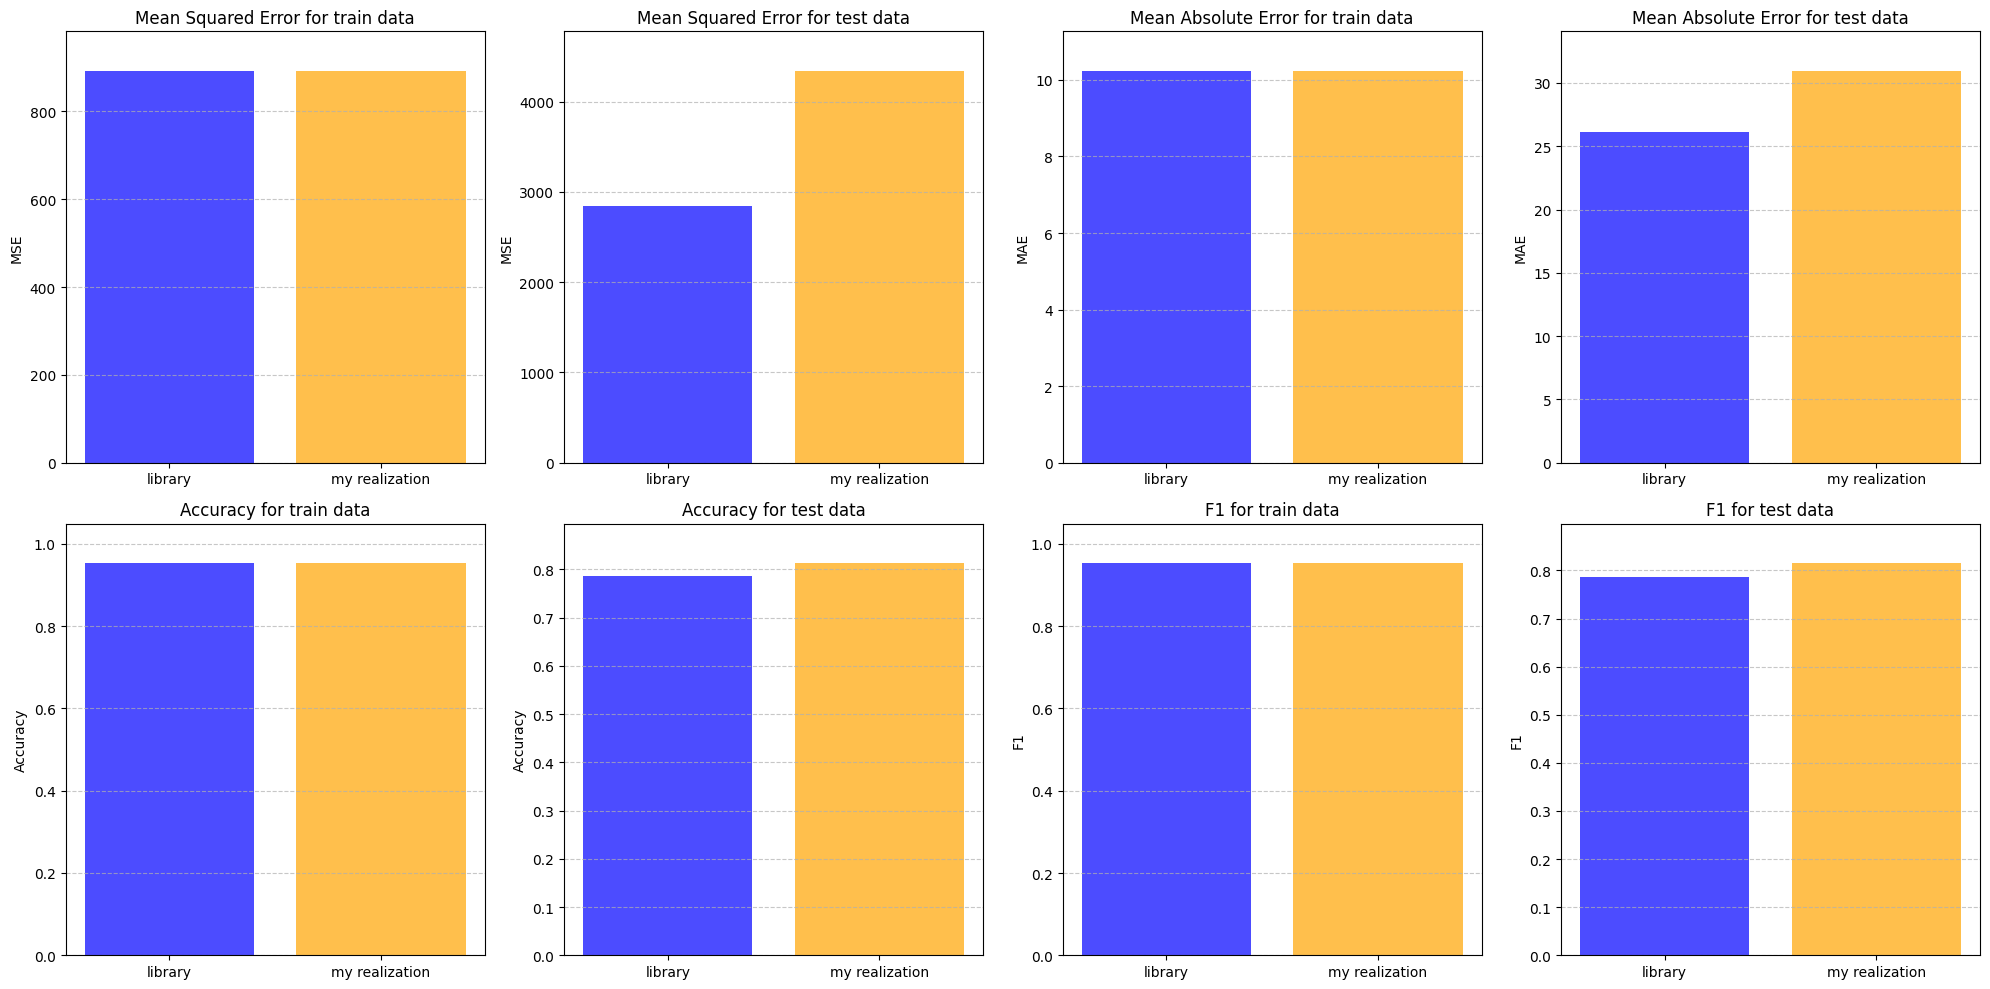

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_tree_2, mse_train_my_tree_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_tree_2, mse_test_my_tree_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_tree_2, mae_train_my_tree_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_tree_2, mae_test_my_tree_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_tree_2, accuracy_train_my_tree_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_tree_2, accuracy_test_my_tree_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_tree_2, f1_train_my_tree_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_tree_2, f1_test_my_tree_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения для задачи классификации имеют аналогичные показатели погрешности. Для задачи регрессии возникает приемлимая разница в худшую сторону на тестовой выборке. Для задачи классификации возникает преимущество самостоятельной реализации над библиотечной. Из этого можно сделать вывод об успехе собственной реализации алгоритма машинного обучения решающего дерева.

# Лабораторная работа №4 "Проведение исследований со случайным лесом"

Создаем два объекта - объект классификатора на основе алгоритма случайного леса и объект регрессора на основе того же алгоритма из библиотеки sklearn. При обучении будем использовать тот датасет, что получился **до улучшения бейзлайна**.

In [ ]:
forest_c = RandomForestClassifier(random_state=2)
forest_r = RandomForestRegressor(random_state=2)

Запускаем обучение модели для задачи классификации.

In [ ]:
forest_c.fit(X_train_c, y_train_c)

RandomForestClassifier(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_forest_c = forest_c.predict(X_test_c)
y_train_pred_forest_c = forest_c.predict(X_train_c)

accuracy_test_forest = accuracy_score(y_test_c, y_test_pred_forest_c)
accuracy_train_forest = accuracy_score(y_train_c, y_train_pred_forest_c)

f1_test_forest = f1_score(y_test_c, y_test_pred_forest_c, average="weighted")
f1_train_forest = f1_score(y_train_c, y_train_pred_forest_c, average="weighted")

print_c(accuracy_test_forest, accuracy_train_forest, f1_test_forest, f1_train_forest)

Accuracy for test data: 0.77333
F1 for test data: 0.76618

Accuracy for train data: 0.97659
F1 for train data: 0.97655


Запускаем обучение модели для задачи регрессии.

In [ ]:
forest_r.fit(X_train_r, y_train_r)

RandomForestRegressor(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_forest_r = forest_r.predict(X_test_r)
y_pred_train_forest_r = forest_r.predict(X_train_r)

mse_test_forest = mean_squared_error(y_test_r, y_pred_test_forest_r)
mae_test_forest = mean_absolute_error(y_test_r, y_pred_test_forest_r)

mse_train_forest = mean_squared_error(y_train_r, y_pred_train_forest_r)
mae_train_forest = mean_absolute_error(y_train_r, y_pred_train_forest_r)

print_r(mse_test_forest, mse_train_forest, mae_test_forest, mae_train_forest)

Mean Squared Error for test data: 5787.37826
Mean Absolute Error for test data: 42.96619

Mean Squared Error for train data: 2540.13742
Mean Absolute Error for train data: 25.87859


Создаем два объекта - объект классификатора на основе алгоритма случайного леса и объект регрессора на основе того же алгоритма из библиотеки sklearn. При обучении будем использовать тот датасет, что получился **после улучшения бейзлайна**.

In [ ]:
forest_c_2 = RandomForestClassifier(random_state=2)
forest_r_2 = RandomForestRegressor(random_state=2)

Запускаем обучение модели для задачи классификации.

In [ ]:
forest_c_2.fit(X_train_c_2, y_train_c_2)

RandomForestClassifier(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_forest_c_2 = forest_c_2.predict(X_test_c_2)
y_train_pred_forest_c_2 = forest_c_2.predict(X_train_c_2)

accuracy_test_forest_2 = accuracy_score(y_test_c_2, y_test_pred_forest_c_2)
accuracy_train_forest_2 = accuracy_score(y_train_c_2, y_train_pred_forest_c_2)

f1_test_forest_2 = f1_score(y_test_c_2, y_test_pred_forest_c_2, average="weighted")
f1_train_forest_2 = f1_score(y_train_c_2, y_train_pred_forest_c_2, average="weighted")

print_c(accuracy_test_forest_2, accuracy_train_forest_2, f1_test_forest_2, f1_train_forest_2)

Accuracy for test data: 0.81333
F1 for test data: 0.81180

Accuracy for train data: 0.95318
F1 for train data: 0.95366


Запускаем обучение модели для задачи регрессии.

In [ ]:
forest_r_2.fit(X_train_r_2, y_train_r_2)

RandomForestRegressor(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_forest_r_2 = forest_r_2.predict(X_test_r_2)
y_pred_train_forest_r_2 = forest_r_2.predict(X_train_r_2)

mse_test_forest_2 = mean_squared_error(y_test_r_2, y_pred_test_forest_r_2)
mae_test_forest_2 = mean_absolute_error(y_test_r_2, y_pred_test_forest_r_2)

mse_train_forest_2 = mean_squared_error(y_train_r_2, y_pred_train_forest_r_2)
mae_train_forest_2 = mean_absolute_error(y_train_r_2, y_pred_train_forest_r_2)

print_r(mse_test_forest_2, mse_train_forest_2, mae_test_forest_2, mae_train_forest_2)

Mean Squared Error for test data: 3424.63366
Mean Absolute Error for test data: 34.53653

Mean Squared Error for train data: 2759.07032
Mean Absolute Error for train data: 25.87584


Сравним результаты обучения модели до и после проведенных работ по улучшению бейзлайна.

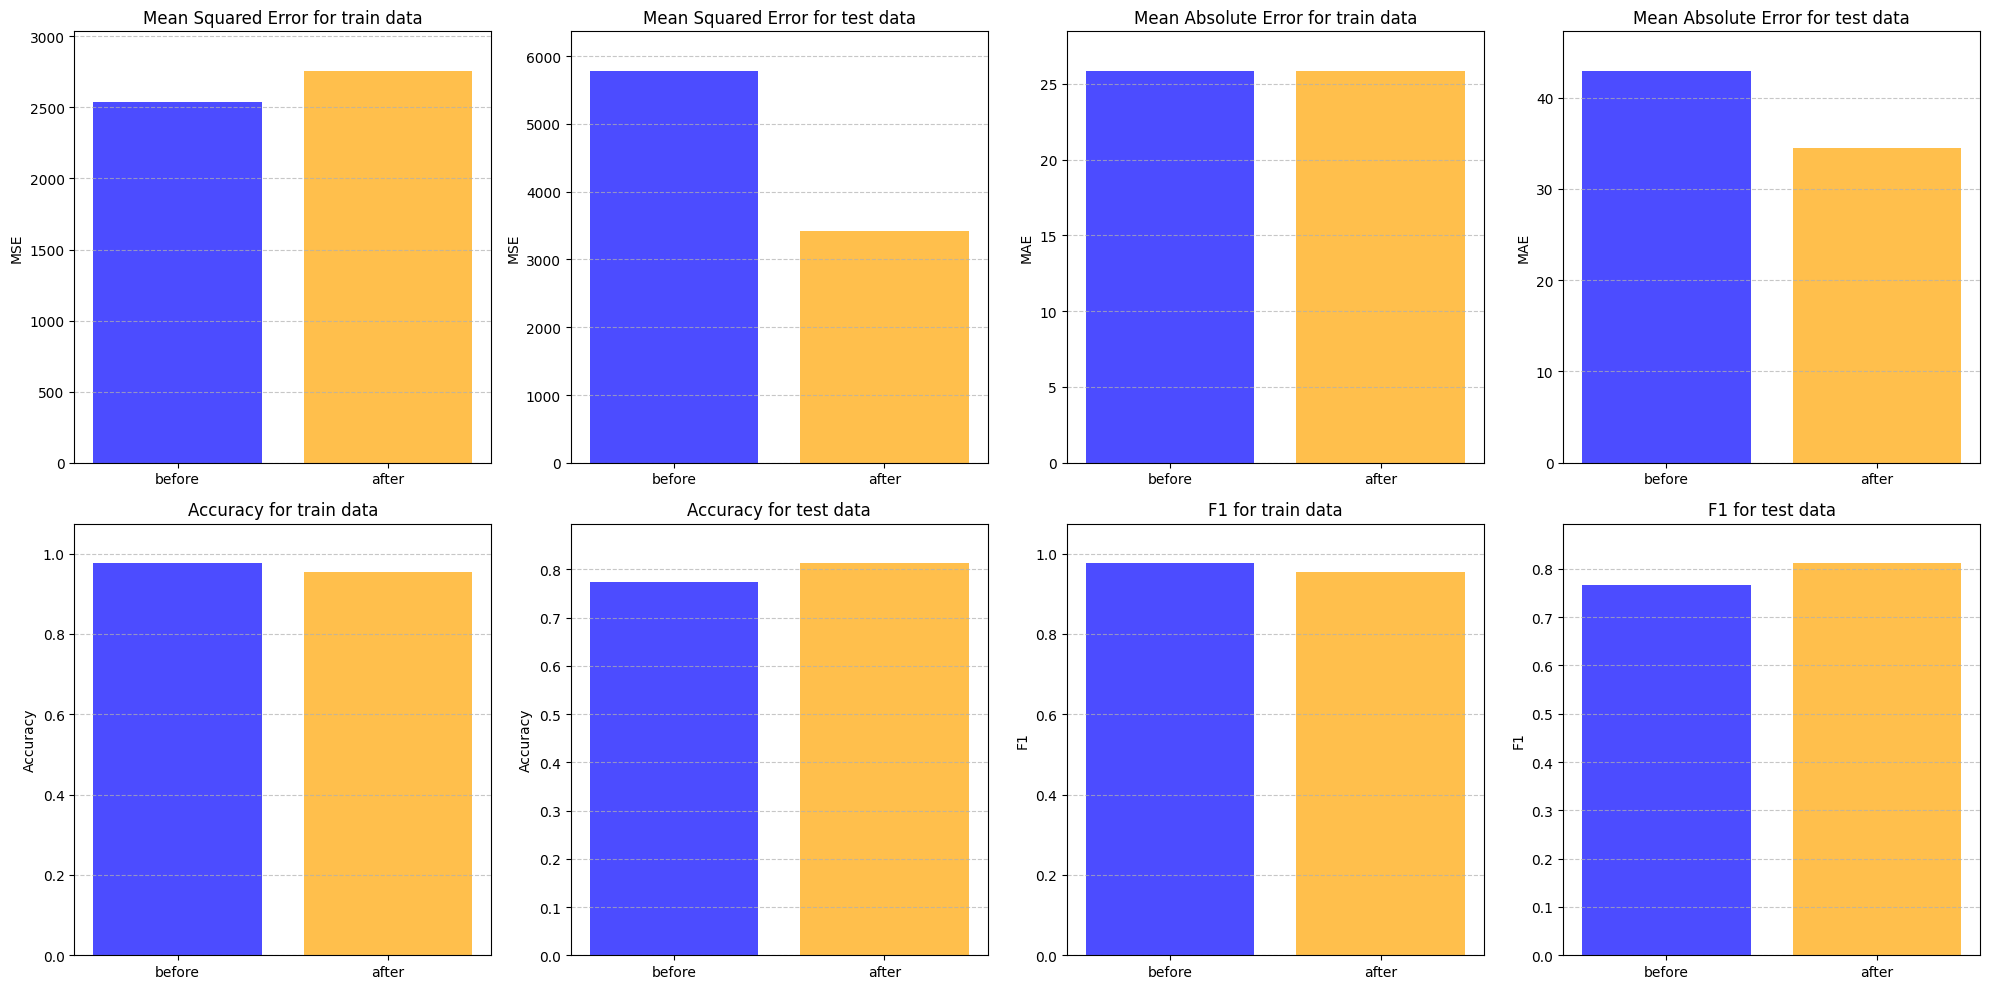

In [ ]:
labels = ['before', 'after']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_forest, mse_train_forest_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_forest, mse_test_forest_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_forest, mae_train_forest_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_forest, mae_test_forest_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_forest, accuracy_train_forest_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_forest, accuracy_test_forest_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_forest, f1_train_forest_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_forest, f1_test_forest_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что точность моделей улучшилась после проведенных работ над данными и параметрами обучения. Для задач возникло небольшое ухудшение показателей метрик на обучающей выборке, зато на тестовой выборке наблюдаются явные улучшения. Проведенное улучшение бейзлайна считаю успешным.

Реализуем **собственные алгоритмы машинного обучения для задач классификации и регрессии - случайный лес**.

In [ ]:
class RandomForest:
    def __init__(self, n_estimators=100, max_features="sqrt", max_depth=None, min_samples_split=2, criterion="gini"):
        """ Инициализация параметров случайного леса """
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.trees = []

    def fit(self, X, y):
        """ Обучение случайного леса """
        self.trees = []
        n_samples, n_features = X.shape
        max_features = self._determine_max_features(n_features)

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X.iloc[indices], y.iloc[indices]

            feature_indices = np.random.choice(n_features, max_features, replace=False)
            X_sample_reduced = X_sample.iloc[:, feature_indices]

            tree = DecisionTree(criterion=self.criterion, max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample_reduced, y_sample)
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        """ Предсказание на основе случаного леса """
        predictions = np.array([tree.predict(X.iloc[:, features]) for tree, features in self.trees])

        if self.criterion in ["gini", "entropy"]:
            return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=predictions)
        elif self.criterion == "mse":
            return np.mean(predictions, axis=0)

    def _determine_max_features(self, n_features):
        """ Выбор максимального числа признаков """
        if self.max_features == "sqrt":
            return int(np.sqrt(n_features))
        elif self.max_features == "log2":
            return int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_features

Создаем объекты написанного класса случайного леса для задач классификации и регрессии. Датасет будем использовать тот, что был **до улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_forest_c = RandomForest(n_estimators=100, criterion="gini", max_depth=30, min_samples_split=5)

In [ ]:
my_forest_r = RandomForest(n_estimators=50, criterion="mse", max_depth=20, min_samples_split=5, max_features='log2')

Запускаем обучение модели для задачи классификации.

In [ ]:
my_forest_c.fit(X_train_c, y_train_c)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_my_forest_c = my_forest_c.predict(X_test_c)
y_train_pred_my_forest_c = my_forest_c.predict(X_train_c)

accuracy_test_my_forest = accuracy_score(y_test_c, y_test_pred_my_forest_c)
accuracy_train_my_forest = accuracy_score(y_train_c, y_train_pred_my_forest_c)

f1_test_my_forest = f1_score(y_test_c, y_test_pred_my_forest_c, average="weighted")
f1_train_my_forest = f1_score(y_train_c, y_train_pred_my_forest_c, average="weighted")

print_c(accuracy_test_my_forest, accuracy_train_my_forest, f1_test_my_forest, f1_train_my_forest)

Accuracy for test data: 0.76000
F1 for test data: 0.76014

Accuracy for train data: 0.88294
F1 for train data: 0.88120


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_forest_r.fit(X_train_r, y_train_r)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_forest_r = my_forest_r.predict(X_test_r)
y_pred_train_my_forest_r = my_forest_r.predict(X_train_r)

mse_test_my_forest = mean_squared_error(y_test_r, y_pred_test_my_forest_r)
mae_test_my_forest = mean_absolute_error(y_test_r, y_pred_test_my_forest_r)

mse_train_my_forest = mean_squared_error(y_train_r, y_pred_train_my_forest_r)
mae_train_my_forest = mean_absolute_error(y_train_r, y_pred_train_my_forest_r)

print_r(mse_test_my_forest, mse_train_my_forest, mae_test_my_forest, mae_train_my_forest)

Mean Squared Error for test data: 5927.35427
Mean Absolute Error for test data: 45.25466

Mean Squared Error for train data: 3110.96042
Mean Absolute Error for train data: 30.12874


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **до улучшения бейзлайна**.

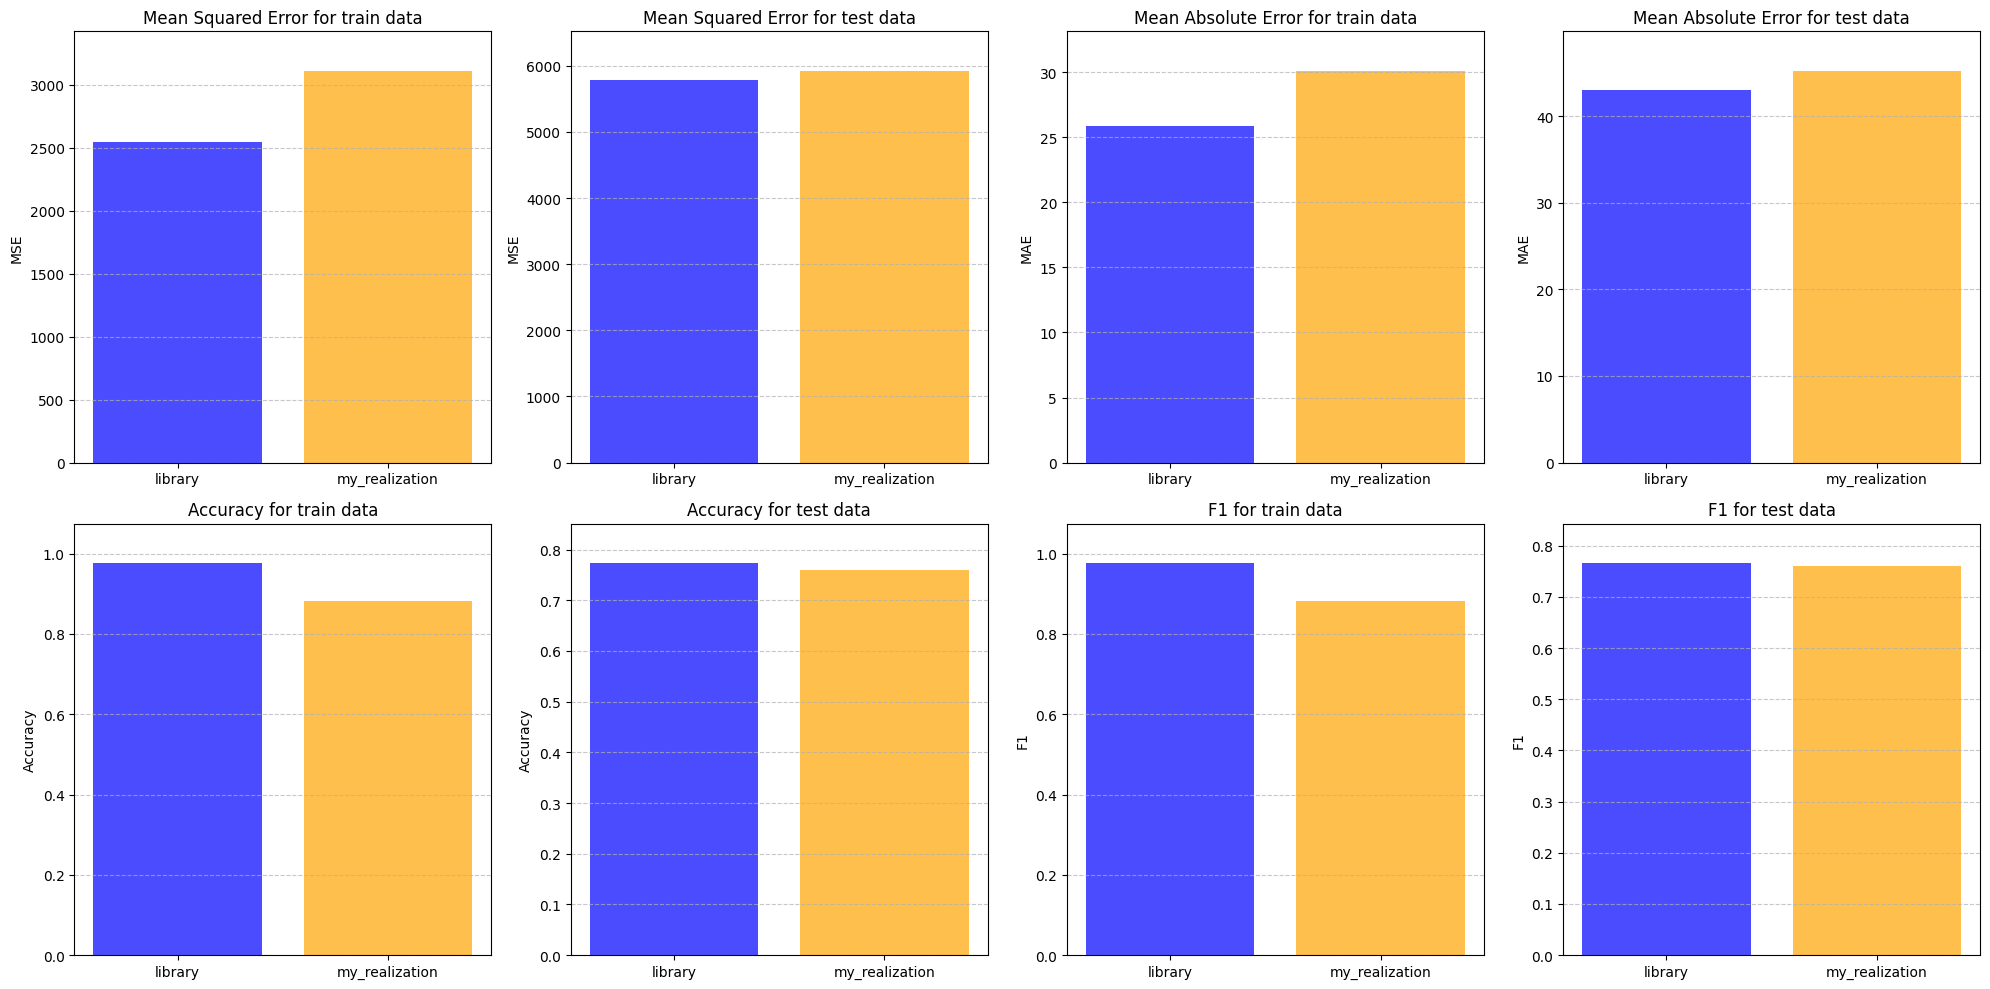

In [ ]:
labels = ['library', 'my_realization']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_forest, mse_train_my_forest], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_forest, mse_test_my_forest], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_forest, mae_train_my_forest], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_forest, mae_test_my_forest], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_forest, accuracy_train_my_forest], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_forest, accuracy_test_my_forest], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_forest, f1_train_my_forest], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_forest, f1_test_my_forest], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Для задач регрессии и классификации библиотечная модель справляется немного лучше на тестовой выборке чем модель самостоятельной реализации после обучения, однако эти отклонения небольшие, на обучающей выборке заметен больший разрыв. Считаю, можно сделать вывод об успехе собственной реализации алгоритма машинного обучения решающего дерева.

Создаем объекты написанного класса случайного леса для задач классификации и регрессии. Датасет будем использовать тот, что был **после улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_forest_c_2 = RandomForest(n_estimators=30, criterion="entropy", max_depth=30, min_samples_split=2)

In [ ]:
my_forest_r_2 = RandomForest(n_estimators=100, max_depth=30, min_samples_split=2, max_features=6, criterion="mse")

Запускаем обучение модели для задачи классификации.

In [ ]:
my_forest_c_2.fit(X_train_c_2, y_train_c_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_my_forest_c_2 = my_forest_c_2.predict(X_test_c_2)
y_train_pred_my_forest_c_2 = my_forest_c_2.predict(X_train_c_2)

accuracy_test_my_forest_2 = accuracy_score(y_test_c_2, y_test_pred_my_forest_c_2)
accuracy_train_my_forest_2 = accuracy_score(y_train_c_2, y_train_pred_my_forest_c_2)

f1_test_my_forest_2 = f1_score(y_test_c_2, y_test_pred_my_forest_c_2, average="weighted")
f1_train_my_forest_2 = f1_score(y_train_c_2, y_train_pred_my_forest_c_2, average="weighted")

print_c(accuracy_test_my_forest_2, accuracy_train_my_forest_2, f1_test_my_forest_2, f1_train_my_forest_2)

Accuracy for test data: 0.80000
F1 for test data: 0.79486

Accuracy for train data: 0.92308
F1 for train data: 0.92303


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_forest_r_2.fit(X_train_r_2, y_train_r_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_forest_r_2 = my_forest_r_2.predict(X_test_r_2)
y_pred_train_my_forest_r_2 = my_forest_r_2.predict(X_train_r_2)

mse_test_my_forest_2 = mean_squared_error(y_test_r_2, y_pred_test_my_forest_r_2)
mae_test_my_forest_2 = mean_absolute_error(y_test_r_2, y_pred_test_my_forest_r_2)

mse_train_my_forest_2 = mean_squared_error(y_train_r_2, y_pred_train_my_forest_r_2)
mae_train_my_forest_2 = mean_absolute_error(y_train_r_2, y_pred_train_my_forest_r_2)

print_r(mse_test_my_forest_2, mse_train_my_forest_2, mae_test_my_forest_2, mae_train_my_forest_2)

Mean Squared Error for test data: 2678.15212
Mean Absolute Error for test data: 32.95742

Mean Squared Error for train data: 3233.22558
Mean Absolute Error for train data: 26.74340


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **после улучшения бейзлайна**.

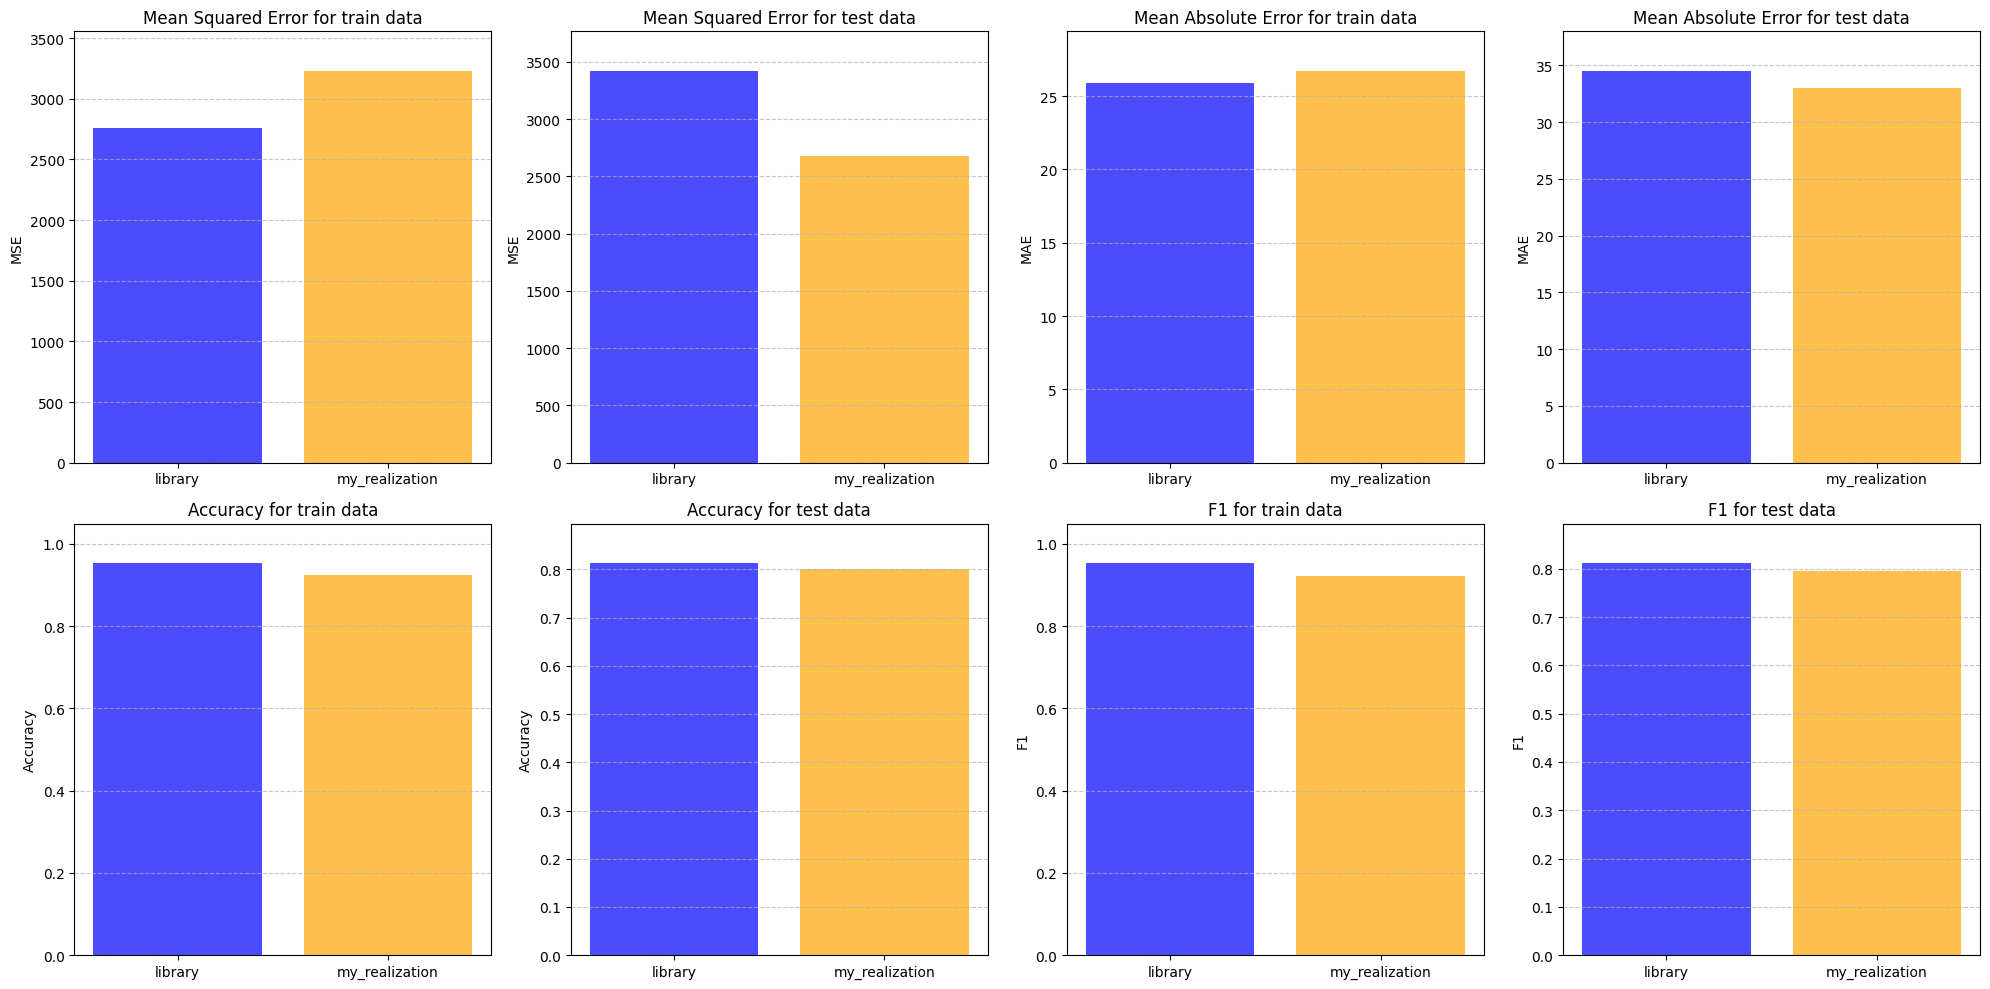

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_forest_2, mse_train_my_forest_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_forest_2, mse_test_my_forest_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_forest_2, mae_train_my_forest_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_forest_2, mae_test_my_forest_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_forest_2, accuracy_train_my_forest_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_forest_2, accuracy_test_my_forest_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_forest_2, f1_train_my_forest_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_forest_2, f1_test_my_forest_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения для задачи классификации имеют аналогичные показатели погрешности. Для задачи регрессии возникает приемлимая разница в худшую сторону у модели самостоятельной реализации на обучающей выборке, но на тестовой выборке заметно сильное преимущество модели самостоятельной реализации над библиотечной моделью. Из этого можно сделать вывод об успехе собственной реализации алгоритма машинного обучения решающего дерева.

# Лабораторная работа №5 "Проведение исследований с градиентным бустингом"

Создаем два объекта - объект классификатора на основе алгоритма градиентного бустинга и объект регрессора на основе того же алгоритма из библиотеки sklearn. При обучении будем использовать тот датасет, что получился **до улучшения бейзлайна**.

In [ ]:
gradient_c = GradientBoostingClassifier(random_state=2)
gradient_r = GradientBoostingRegressor(random_state=2)

Запускаем обучение модели для задачи классификации.

In [ ]:
gradient_c.fit(X_train_c, y_train_c)

GradientBoostingClassifier(max_depth=2, random_state=8)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_gradient_c = gradient_c.predict(X_test_c)
y_train_pred_gradient_c = gradient_c.predict(X_train_c)

accuracy_test_gradient = accuracy_score(y_test_c, y_test_pred_gradient_c)
accuracy_train_gradient = accuracy_score(y_train_c, y_train_pred_gradient_c)

f1_test_gradient = f1_score(y_test_c, y_test_pred_gradient_c, average="weighted")
f1_train_gradient = f1_score(y_train_c, y_train_pred_gradient_c, average="weighted")

print_c(accuracy_test_gradient, accuracy_train_gradient, f1_test_gradient, f1_train_gradient)

Accuracy for test data: 0.77333
F1 for test data: 0.77402

Accuracy for train data: 0.91304
F1 for train data: 0.91436


Запускаем обучение модели для задачи регрессии.

In [ ]:
gradient_r.fit(X_train_r, y_train_r)

GradientBoostingRegressor(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_gradient_r = gradient_r.predict(X_test_r)
y_pred_train_gradient_r = gradient_r.predict(X_train_r)

mse_test_gradient = mean_squared_error(y_test_r, y_pred_test_gradient_r)
mae_test_gradient = mean_absolute_error(y_test_r, y_pred_test_gradient_r)

mse_train_gradient = mean_squared_error(y_train_r, y_pred_train_gradient_r)
mae_train_gradient = mean_absolute_error(y_train_r, y_pred_train_gradient_r)

print_r(mse_test_gradient, mse_train_gradient, mae_test_gradient, mae_train_gradient)

Mean Squared Error for test data: 4707.44211
Mean Absolute Error for test data: 46.37123

Mean Squared Error for train data: 1949.75672
Mean Absolute Error for train data: 31.99625


Создаем два объекта - объект классификатора на основе алгоритма градиентного бустинга и объект регрессора на основе того же алгоритма из библиотеки sklearn. При обучении будем использовать тот датасет, что получился **после улучшения бейзлайна**.

In [ ]:
gradient_c_2 = GradientBoostingClassifier(random_state=2)
gradient_r_2 = GradientBoostingRegressor(random_state=2)

Запускаем обучение модели для задачи классификации.

In [ ]:
gradient_c_2.fit(X_train_c_2, y_train_c_2)

GradientBoostingClassifier(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_gradient_c_2 = gradient_c_2.predict(X_test_c_2)
y_train_pred_gradient_c_2 = gradient_c_2.predict(X_train_c_2)

accuracy_test_gradient_2 = accuracy_score(y_test_c_2, y_test_pred_gradient_c_2)
accuracy_train_gradient_2 = accuracy_score(y_train_c_2, y_train_pred_gradient_c_2)

f1_test_gradient_2 = f1_score(y_test_c_2, y_test_pred_gradient_c_2, average="weighted")
f1_train_gradient_2 = f1_score(y_train_c_2, y_train_pred_gradient_c_2, average="weighted")

print_c(accuracy_test_gradient_2, accuracy_train_gradient_2, f1_test_gradient_2, f1_train_gradient_2)

Accuracy for test data: 0.78667
F1 for test data: 0.78733

Accuracy for train data: 0.93980
F1 for train data: 0.94019


Запускаем обучение модели для задачи регрессии.

In [ ]:
gradient_r_2.fit(X_train_r_2, y_train_r_2)

GradientBoostingRegressor(random_state=2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_gradient_r_2 = gradient_r_2.predict(X_test_r_2)
y_pred_train_gradient_r_2 = gradient_r_2.predict(X_train_r_2)

mse_test_gradient_2 = mean_squared_error(y_test_r_2, y_pred_test_gradient_r_2)
mae_test_gradient_2 = mean_absolute_error(y_test_r_2, y_pred_test_gradient_r_2)

mse_train_gradient_2 = mean_squared_error(y_train_r_2, y_pred_train_gradient_r_2)
mae_train_gradient_2 = mean_absolute_error(y_train_r_2, y_pred_train_gradient_r_2)

print_r(mse_test_gradient_2, mse_train_gradient_2, mae_test_gradient_2, mae_train_gradient_2)

Mean Squared Error for test data: 3351.28139
Mean Absolute Error for test data: 41.47396

Mean Squared Error for train data: 3251.32568
Mean Absolute Error for train data: 35.70892


Сравним результаты обучения модели до и после проведенных работ по улучшению бейзлайна.

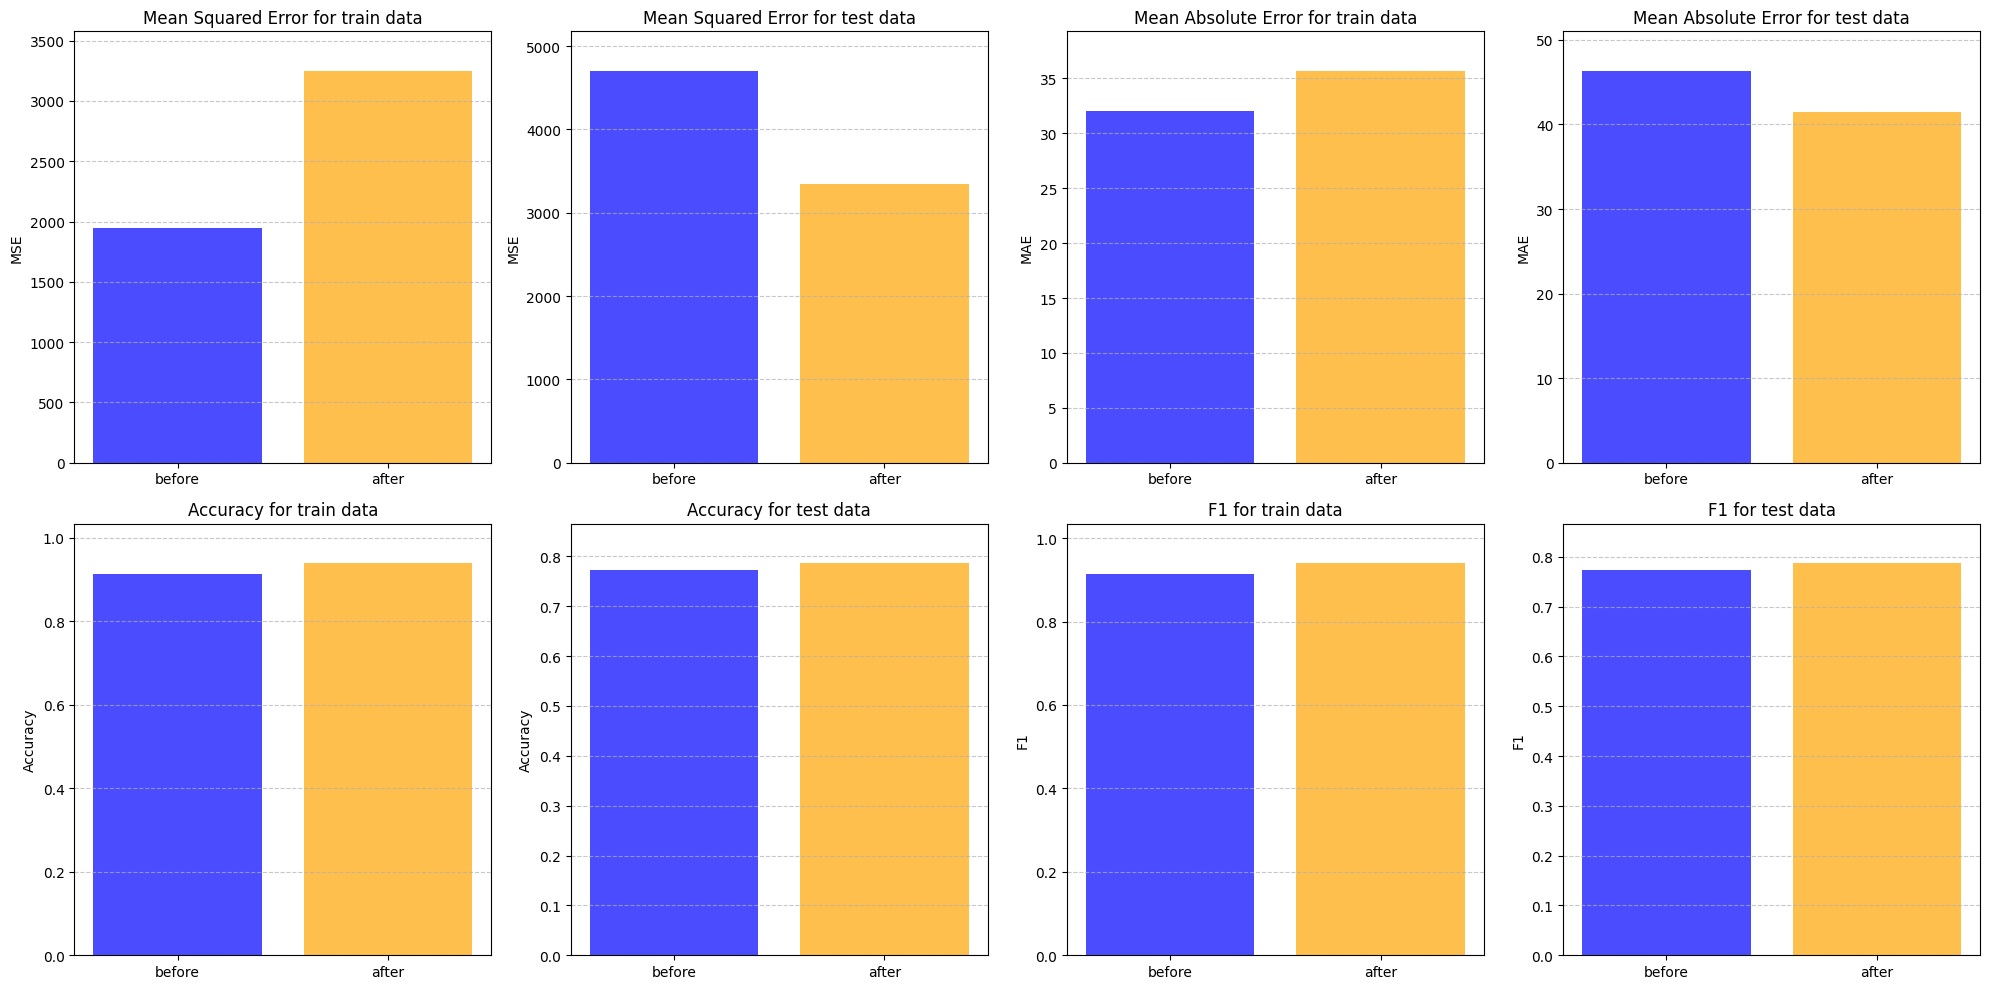

In [ ]:
labels = ['before', 'after']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_gradient, mse_train_gradient_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_gradient, mse_test_gradient_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_gradient, mae_train_gradient_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_gradient, mae_test_gradient_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_gradient, accuracy_train_gradient_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_gradient, accuracy_test_gradient_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_gradient, f1_train_gradient_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_gradient, f1_test_gradient_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что точность предсказаний моделей улучшилась после проведенных работ над данными и параметрами обучения. Для задачи регрессии возникло небольшое ухудшение показателей метрик на обучающей выборке, зато на тестовой выборке наблюдаются значительные улучшения. Проведенное улучшение бейзлайна считаю успешным.

Реализуем **собственные алгоритм машинного обучения для задач классификации и регрессии - градиентый бустинг**.

In [ ]:
class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion="mse"):
        """ Инициализация параметров градиентного бустинга """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.trees = []

    def fit(self, X, y):
        """ Обучение модели градиентного бустинга """
        X = np.array(X)
        y = np.array(y)

        if self.criterion == "mse":
            self.init_prediction = np.mean(y)
        elif self.criterion in ["gini", "entropy"]:
            self.init_prediction = np.bincount(y).argmax()

        predictions = np.full_like(y, self.init_prediction, dtype=float)

        for _ in range(self.n_estimators):
            residuals = self._compute_residuals(y, predictions)

            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                criterion="mse"
            )
            tree.fit(X, residuals)
            self.trees.append(tree)

            predictions += self.learning_rate * tree.predict(X)

    def predict(self, X):
        """ Предсказание для набора данных """
        X = np.array(X)

        predictions = np.full(X.shape[0], self.init_prediction, dtype=float)

        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        if self.criterion in ["gini", "entropy"]:
            return np.round(predictions).astype(int)
        elif self.criterion == "mse":
            return predictions

    def _compute_residuals(self, y, predictions):
        """ Вычисление остаточной ошибки (градиента) """
        if self.criterion == "mse":
            return y - predictions
        elif self.criterion in ["gini", "entropy"]:
            return y - predictions

Создаем объекты написанного класса градиентного бустинга для задач классификации и регрессии. Датасет будем использовать тот, что был **до улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_gradient_c = GradientBoosting(criterion="gini", n_estimators=100, learning_rate=0.4)
my_gradient_r = GradientBoosting(criterion="mse")

Запускаем обучение модели для задачи классификации.

In [ ]:
my_gradient_c.fit(X_train_c, y_train_c)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_my_gradient_c = my_gradient_c.predict(X_test_c)
y_train_pred_my_gradient_c = my_gradient_c.predict(X_train_c)

accuracy_test_my_gradient = accuracy_score(y_test_c, y_test_pred_my_gradient_c)
accuracy_train_my_gradient = accuracy_score(y_train_c, y_train_pred_my_gradient_c)

f1_test_my_gradient = f1_score(y_test_c, y_test_pred_my_gradient_c, average="weighted")
f1_train_my_gradient = f1_score(y_train_c, y_train_pred_my_gradient_c, average="weighted")

print_c(accuracy_test_my_gradient, accuracy_train_my_gradient, f1_test_my_gradient, f1_train_my_gradient)

Accuracy for test data: 0.76000
F1 for test data: 0.76333

Accuracy for train data: 0.96990
F1 for train data: 0.97011


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_gradient_r.fit(X_train_r, y_train_r)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_gradient_r = my_gradient_r.predict(X_test_r)
y_pred_train_my_gradient_r = my_gradient_r.predict(X_train_r)

mse_test_my_gradient = mean_squared_error(y_test_r, y_pred_test_my_gradient_r)
mae_test_my_gradient = mean_absolute_error(y_test_r, y_pred_test_my_gradient_r)

mse_train_my_gradient = mean_squared_error(y_train_r, y_pred_train_my_gradient_r)
mae_train_my_gradient = mean_absolute_error(y_train_r, y_pred_train_my_gradient_r)

print_r(mse_test_my_gradient, mse_train_my_gradient, mae_test_my_gradient, mae_train_my_gradient)

Mean Squared Error for test data: 3544.28986
Mean Absolute Error for test data: 44.10096

Mean Squared Error for train data: 1949.75672
Mean Absolute Error for train data: 31.99625


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **до улучшения бейзлайна**.

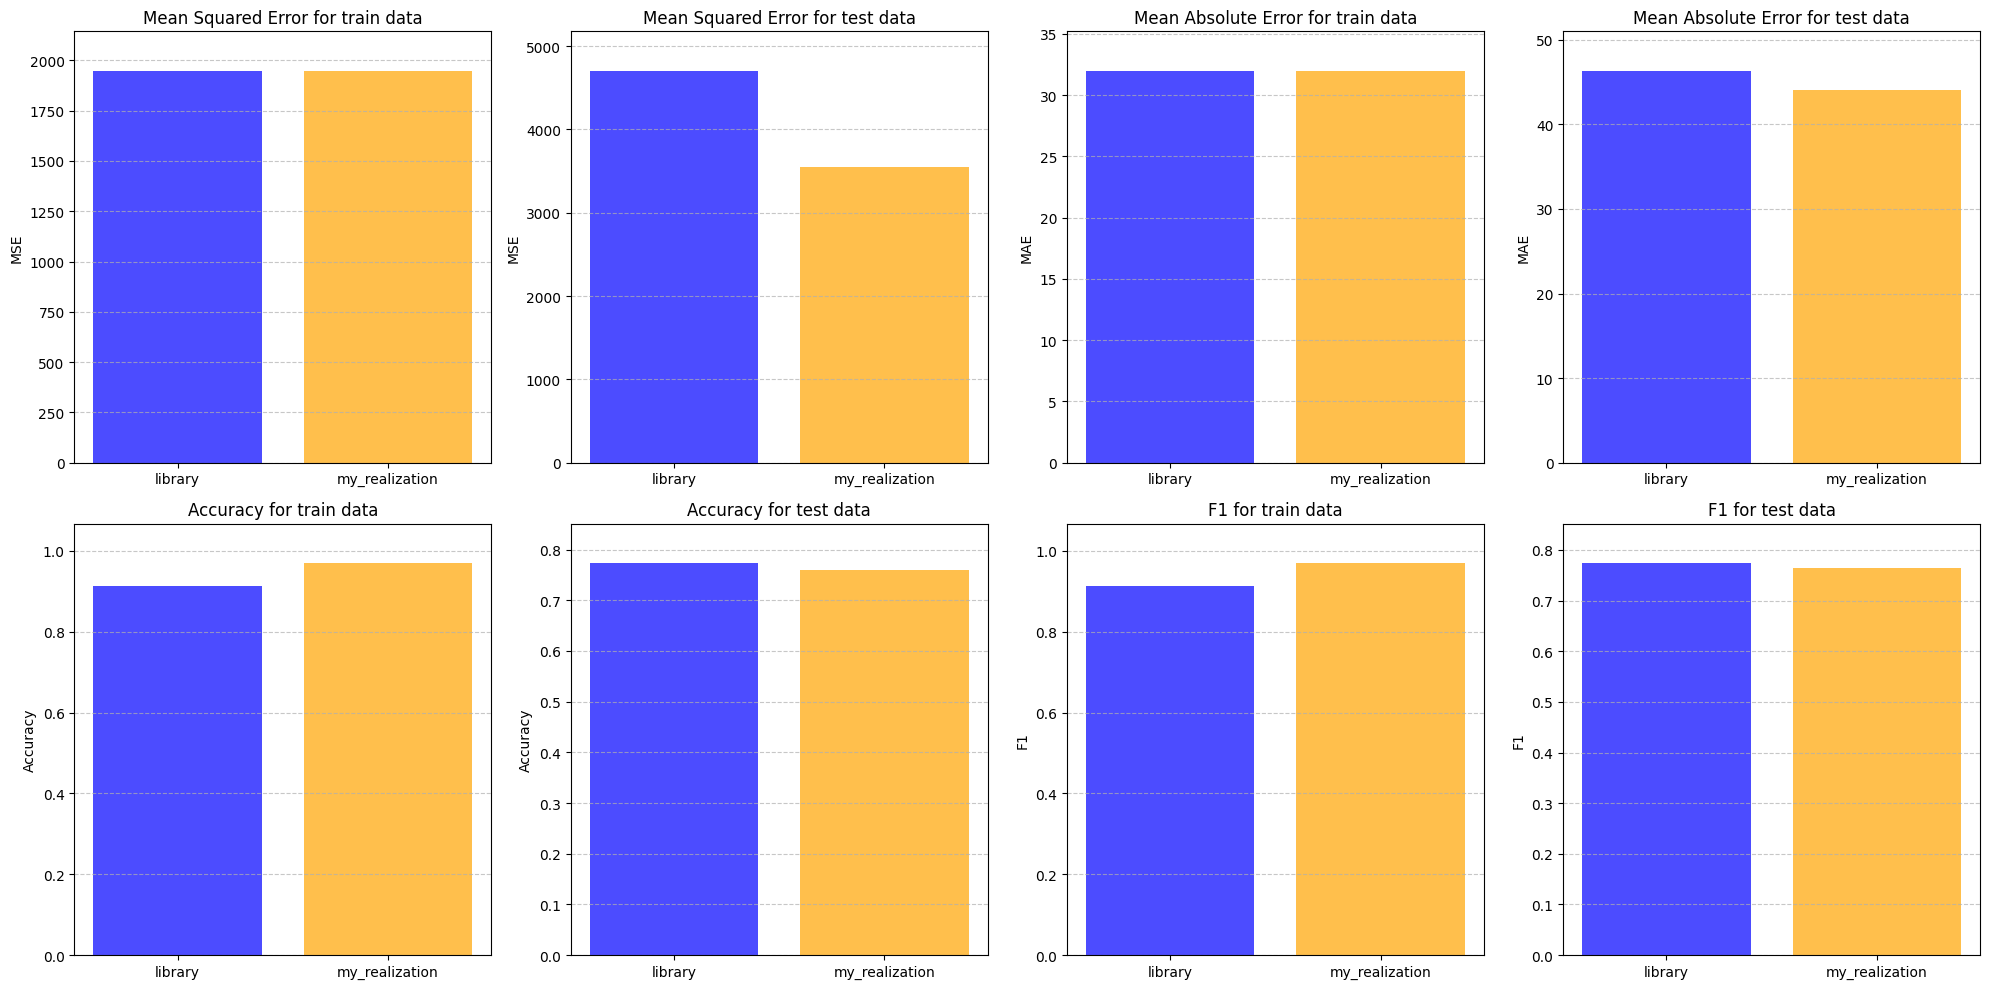

In [ ]:
labels = ['library', 'my_realization']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_gradient, mse_train_my_gradient], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_gradient, mse_test_my_gradient], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_gradient, mae_train_my_gradient], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_gradient, mae_test_my_gradient], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_gradient, accuracy_train_my_gradient], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_gradient, accuracy_test_my_gradient], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_gradient, f1_train_my_gradient], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_gradient, f1_test_my_gradient], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения для задачи классификации имеют аналогичные показатели погрешности, а для задачи регрессии модель самостоятельной реализации дает значительно меньшие значения ошибок на тестовой выборке. Из этого можно сделать вывод об успехе собственной реализации алгоритма градиентного бустинга.

Создаем объекты написанного класса градиентного бустинга для задач классификации и регрессии. Датасет будем использовать тот, что был **после улучшения бейзлайна**. Параметры для обучения выставлены как параметры обучения с лучшими результатами, полученными при проведении экспериментов и анализе.

In [ ]:
my_gradient_c_2 = GradientBoosting(criterion="gini", n_estimators=150, learning_rate=0.5, max_depth=5)
my_gradient_r_2 = GradientBoosting(criterion="mse")

Запускаем обучение модели для задачи классификации.

In [ ]:
my_gradient_c_2.fit(X_train_c_2, y_train_c_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения оценки точности (accuracy) и F1-меру для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_test_pred_my_gradient_c_2 = my_gradient_c_2.predict(X_test_c_2)
y_train_pred_my_gradient_c_2 = my_gradient_c_2.predict(X_train_c_2)

accuracy_test_my_gradient_2 = accuracy_score(y_test_c_2, y_test_pred_my_gradient_c_2)
accuracy_train_my_gradient_2 = accuracy_score(y_train_c_2, y_train_pred_my_gradient_c_2)

f1_test_my_gradient_2 = f1_score(y_test_c_2, y_test_pred_my_gradient_c_2, average="weighted")
f1_train_my_gradient_2 = f1_score(y_train_c_2, y_train_pred_my_gradient_c_2, average="weighted")

print_c(accuracy_test_my_gradient_2, accuracy_train_my_gradient_2, f1_test_my_gradient_2, f1_train_my_gradient_2)

Accuracy for test data: 0.78667
F1 for test data: 0.78440

Accuracy for train data: 0.94314
F1 for train data: 0.94325


Запускаем обучение модели для задачи регрессии.

In [ ]:
my_gradient_r_2.fit(X_train_r_2, y_train_r_2)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [ ]:
y_pred_test_my_gradient_r_2 = my_gradient_r_2.predict(X_test_r_2)
y_pred_train_my_gradient_r_2 = my_gradient_r_2.predict(X_train_r_2)

mse_test_my_gradient_2 = mean_squared_error(y_test_r_2, y_pred_test_my_gradient_r_2)
mae_test_my_gradient_2 = mean_absolute_error(y_test_r_2, y_pred_test_my_gradient_r_2)

mse_train_my_gradient_2 = mean_squared_error(y_train_r_2, y_pred_train_my_gradient_r_2)
mae_train_my_gradient_2 = mean_absolute_error(y_train_r_2, y_pred_train_my_gradient_r_2)

print_r(mse_test_my_gradient_2, mse_train_my_gradient_2, mae_test_my_gradient_2, mae_train_my_gradient_2)

Mean Squared Error for test data: 2657.14214
Mean Absolute Error for test data: 38.87577

Mean Squared Error for train data: 3251.32568
Mean Absolute Error for train data: 35.70892


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **после улучшения бейзлайна**.

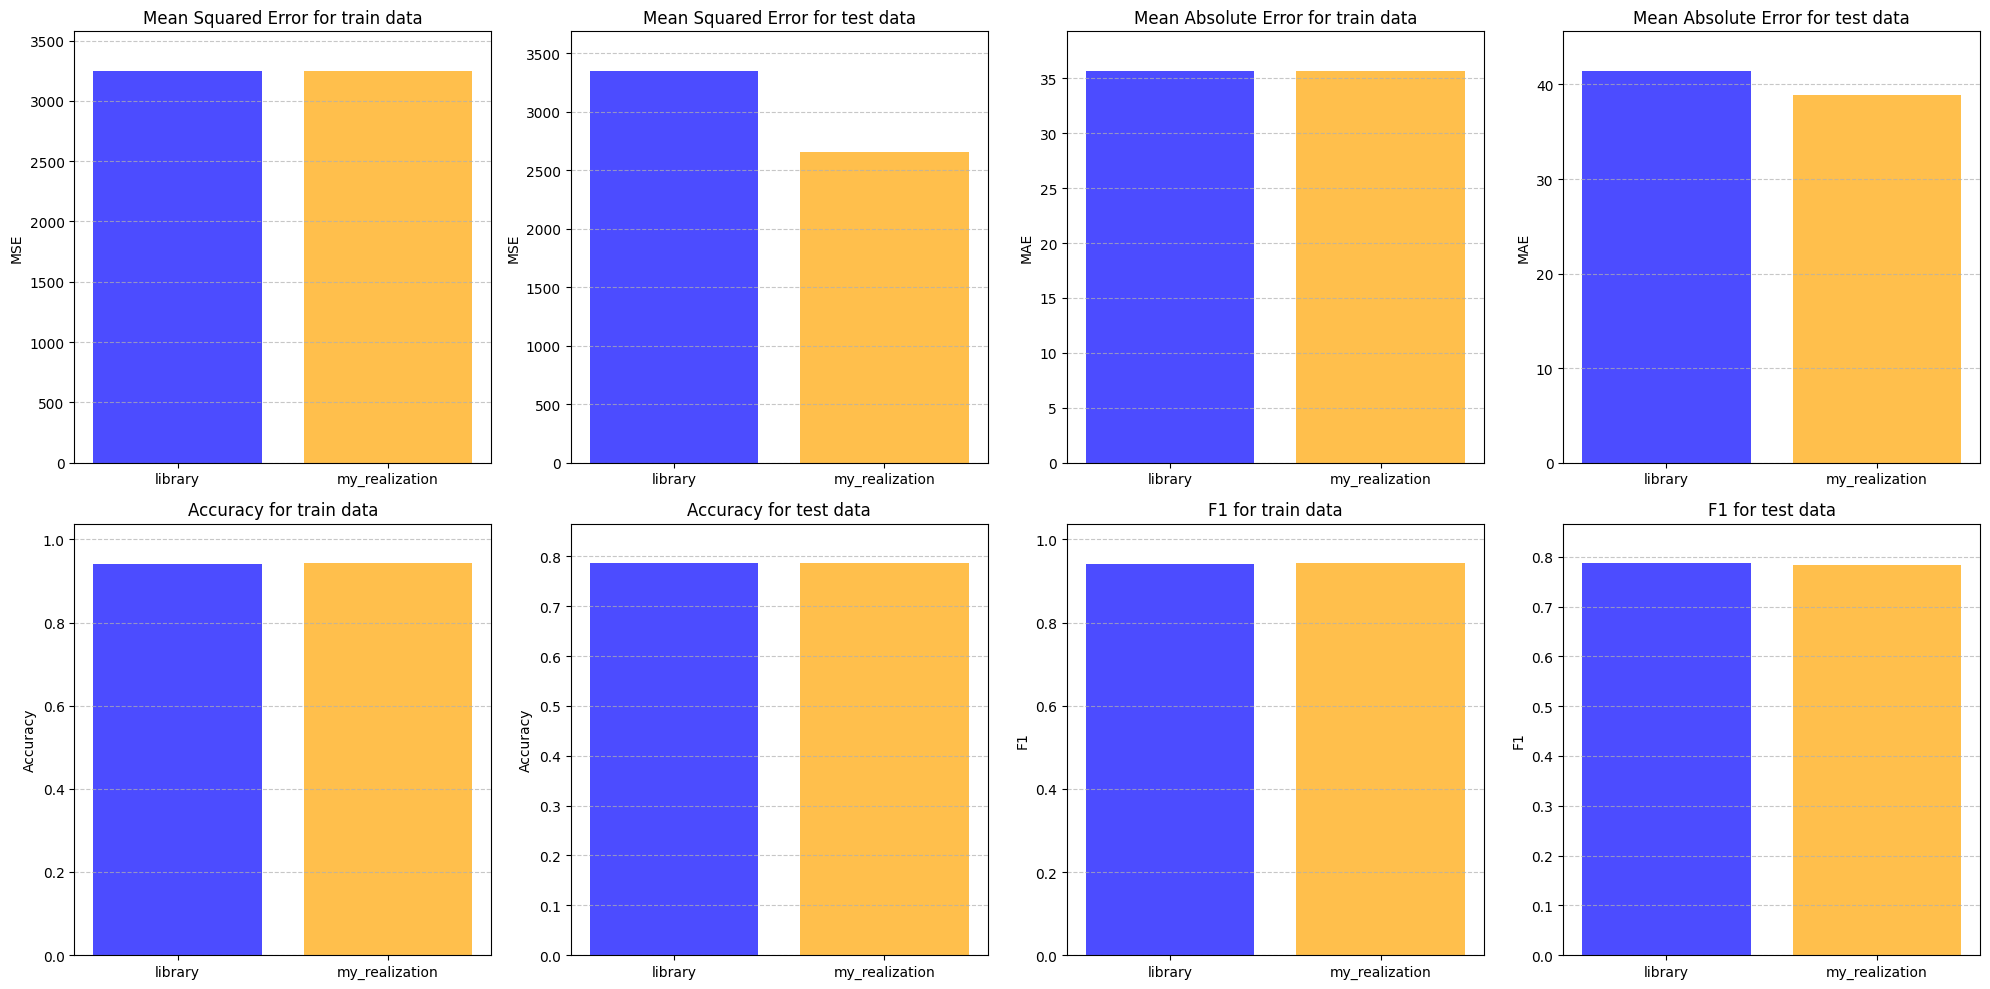

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

visualization(axs[0][0], [mse_train_gradient_2, mse_train_my_gradient_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[0][1], [mse_test_gradient_2, mse_test_my_gradient_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[0][2], [mae_train_gradient_2, mae_train_my_gradient_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[0][3], [mae_test_gradient_2, mae_test_my_gradient_2], 'Mean Absolute Error for test data', 'MAE')

visualization(axs[1][0], [accuracy_train_gradient_2, accuracy_train_my_gradient_2], 'Accuracy for train data', 'Accuracy')
visualization(axs[1][1], [accuracy_test_gradient_2, accuracy_test_my_gradient_2], 'Accuracy for test data', 'Accuracy')
visualization(axs[1][2], [f1_train_gradient_2, f1_train_my_gradient_2], 'F1 for train data', 'F1')
visualization(axs[1][3], [f1_test_gradient_2, f1_test_my_gradient_2], 'F1 for test data', 'F1')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения для задачи классификации имеют аналогичные показатели погрешности, а для задачи регрессии модель самостоятельной реализации дает значительно меньшие значения ошибок на тестовой выборке. Из этого можно сделать вывод об успехе собственной реализации алгоритма градиентного бустинга.

# Выводы

Проанализируем результаты, полученные всеми алгоритмами. Для этого представим все данные в виде таблицы для удобства анализа.

In [ ]:
data = {
    'Алгоритм': ['KNN', 'KNN', 'Линейные модели', 'Линейные модели', 'Решающее дерево', 'Решающее дерево', 'Случайный лес', 'Случайный лес', 'Градиентный бустинг', 'Градиентный бустинг'],
    'Задача': ['классификация', 'регрессия', 'классификация', 'регрессия', 'классификация', 'регрессия', 'классификация', 'регрессия', 'классификация', 'регрессия'],
    'Метрика': ['Accuracy', 'MAE', 'Accuracy', 'MAE', 'Accuracy', 'MAE', 'Accuracy', 'MAE', 'Accuracy', 'MAE'],
    'Бейзлайн': [accuracy_test, mae_test, accuracy_test_l, mae_test_l, accuracy_test_tree, mae_test_tree, accuracy_test_forest, mae_test_forest, accuracy_test_gradient, mae_test_gradient],
    'Улучшенный бейзлайн': [accuracy_test_2, mae_test_2, accuracy_test_l_2, mae_test_l_2, accuracy_test_tree_2, mae_test_tree_2, accuracy_test_forest_2, mae_test_forest_2, accuracy_test_gradient_2, mae_test_gradient_2],
    'Самостоятельная имплементация алгоритма': [accuracy_test_knn_2, mae_test_knn_2, accuracy_test_my_l_2, mae_test_my_l_2, accuracy_test_my_tree_2, mae_test_my_tree_2, accuracy_test_my_forest_2, mae_test_my_forest_2, accuracy_test_my_gradient_2, mae_test_my_gradient_2],
}

table = pd.DataFrame(data)
table


Алгоритм         Задача   Метрика    Бейзлайн  \
0                  KNN  классификация  Accuracy    0.773333   
1                  KNN      регрессия       MAE   52.937778   
2      Линейные модели  классификация  Accuracy    0.600000   
3      Линейные модели      регрессия       MAE  105.287145   
4      Решающее дерево  классификация  Accuracy    0.773333   
5      Решающее дерево      регрессия       MAE   30.973333   
6        Случайный лес  классификация  Accuracy    0.773333   
7        Случайный лес      регрессия       MAE   42.966189   
8  Градиентный бустинг  классификация  Accuracy    0.773333   
9  Градиентный бустинг      регрессия       MAE   46.371230   

   Улучшенный бейзлайн  Самостоятельная имплементация алгоритма  
0             0.813333                                 0.800000  
1            43.217778                                43.111111  
2             0.613330                                 0.608730  
3           101.809537                               100.573000  
4             0.786667                                 0.813333  
5            26.159250                                30.972583  
6             0.813333                                 0.800000  
7            34.536528                                32.957420  
8             0.786667                                 0.786667  
9            41.473958                                38.875769

Выделим алгоритмы, которые лучше показали себя, для каждой из задач по каждому кейсу.


**Классификация:**

*   Бейзлайн: все алгоритмы равны, только линейная модель имеет меньший показатель
*   Улучшенный бейзлайн: KNN, случайный лес
*   Самостоятельная имплементация: решающее дерево

**Регрессия:**

*   Бейзлайн: решающее дерево
*   Улучшенный бейзлайн: решающее дерево
*   Самостоятельная имплементация: решающее дерево


В целом, наименьшие показатели наблюдаются в линейных моделях, а лучшие - в алгоритме решающего дерева. Это может быть связано с тем, что связь между признаками и целевой переменнной нелинейная или сложная, а линейные модели для хорошей обучаемости требуют линейную (или логистическую в случае классификации) связь. Также линейные модели более чувствительны к шуму в данных, а решающее дерево может быть более устойчивым к некоторым типам шума, так как оно разделяет данные только по значимым порогам. Если же рассматривать другие модели, такие как случайный лес или градиентный бустинг, основанные на алгоритме решающего дерева, то они могут показывать результаты хуже одного дерева при небольших размерах датасета из-за их сложности и склонности к переобучению.




